<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTaJWG7PzF3toxaRMB1-JicpqMgJuEXATd0fg&" style="width: 150px;margin-top:30px;" align ="center">

<div style= "font-size: 40px;font-weight:bold; font-family: 'Avenir Next LT Pro', sans-serif;"><center>To Grant or Not to Grant</center></div> <br>

<div style= "font-size: 27px;font-weight:bold;line-height: 1.1; margin-top:40px; font-family: 'Avenir Next LT Pro', sans-serif;"><center>Machine Learning Project 2024/2025</center></div> <br>

   <div style= "font-size: 20px;font-weight:bold; font-family: 'Avenir Next LT Pro', sans-serif;"><center> Group 42:</center></div>
   <div><center> Eden da Silva | 20240740 </center></div>
   <div><center> José Cavaco | 20240513 </center></div>
   <div><center> Luana Rocha | 20240111 </center></div>
   <div><center> Maria Radix | 20240687 </center></div>
   <div><center> Tiago Castilho | 20240489 </center></div>

# Notebook 1: EDA

# Index

* [1.0. Imports](#imp)
* [1.1. Initial Analysis](#initial_analysis)
* [1.2. Individual Feature Analysis](#ifa)
    * [1.2.1. Accident Date](#a_d)
    * [1.2.2. Age At Injury](#ati)
    * [1.2.3. Alternative Dispute Resolution](#adr)
    * [1.2.4. Assembly Date](#ad)
    * [1.2.5. Attorney/Representative](#a/r)
    * [1.2.6. Average Weekly Wage](#aww)
    * [1.2.7. Birth Year](#by)
    * [1.2.8. C-2 Date](#c2)
    * [1.2.9. C-3 Date](#c3)
    * [1.2.10. Carrier Name and Carrier Type](#cnct)
    * [1.2.11. Claim Injury Type (Target)](#cit)
    * [1.2.12. County of Injury](#coi)
    * [1.2.13. COVID-19 Indicator](#covid)
    * [1.2.14. District Name](#dn)
    * [1.2.15. First Hearing Date](#fhd)
    * [1.2.16. Gender](#gender)
    * [1.2.17. IME-4 Count](#ime4)
    * [1.2.18. Industry Code and Description](#icodedes)
    * [1.2.19. Medical Fee Region](#mfr)
    * [1.2.20. OIICS Nature of Injury Description](#oiics)
    * [1.2.21. WCIO Features](#wcio)
      * [1.2.21.1. WCIO Cause of Injury Code and Description](#wcio_c)
      * [1.2.21.2 WCIO Nature of Injury Code and Description](#wcio_n)
      * [1.2.21.3 WCIO Part Of Body Code and Description](#wcio_p)
    * [1.2.22. Zip Code](#zip)
    * [1.2.23. Agreement Reached](#agr)
    * [1.2.24. WCB Decision](#wcb)
    * [1.2.25. Number of Dependents](#ndep)
* [1.3. Multivariate Analysis](#mva)
    * [1.3.1 Examining relationships between date featres](#date_rel)
        * [1.3.1.1 Accident Date to C-2 Date](#acc_c2)
        * [1.3.1.2 Accident Date to Assembly Date](#acc_ass)
        * [1.3.1.3 Assembly Date to First Hearing Date](#ass_fh)
        * [1.3.1.3 C-2 Date to Assembly Date](#c2_ass)
    * [1.3.2 Examining relationships between numerical features](#num_feats)
* [1.4 EDA Conclusion](#conclusion)

<hr>
<div class="alert alert-block alert-info" style="font-size:16px" id="imp">
    
# 1.0. Imports
    
</a>

In [3]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import math

import warnings
warnings.filterwarnings('ignore')

<hr>
<div class="alert alert-block alert-info" style="font-size:16px" id="initial_analysis">
    
# 1.1. Initial Analysis
    
</a>

In [5]:
df = pd.read_csv('train_data.csv',low_memory=False)
df_test = pd.read_csv('test_data.csv',low_memory=False)

In [6]:
df.head()

Accident Date  Age at Injury Alternative Dispute Resolution Assembly Date  \
0    2019-12-30           31.0                              N    2020-01-01   
1    2019-08-30           46.0                              N    2020-01-01   
2    2019-12-06           40.0                              N    2020-01-01   
3           NaN            NaN                            NaN    2020-01-01   
4    2019-12-30           61.0                              N    2020-01-01   

  Attorney/Representative  Average Weekly Wage  Birth Year    C-2 Date  \
0                       N                 0.00      1988.0  2019-12-31   
1                       Y              1745.93      1973.0  2020-01-01   
2                       N              1434.80      1979.0  2020-01-01   
3                     NaN                  NaN         NaN         NaN   
4                       N                  NaN      1958.0  2019-12-31   

     C-3 Date                  Carrier Name  ... WCIO Cause of Injury Code  \
0         NaN    NEW HAMPSHIRE INSURANCE CO  ...                      27.0   
1  2020-01-14  ZURICH AMERICAN INSURANCE CO  ...                      97.0   
2         NaN     INDEMNITY INSURANCE CO OF  ...                      79.0   
3         NaN                           NaN  ...                       NaN   
4         NaN          STATE INSURANCE FUND  ...                      16.0   

   WCIO Cause of Injury Description WCIO Nature of Injury Code  \
0      FROM LIQUID OR GREASE SPILLS                       10.0   
1                 REPETITIVE MOTION                       49.0   
2    OBJECT BEING LIFTED OR HANDLED                        7.0   
3                               NaN                        NaN   
4   HAND TOOL, UTENSIL; NOT POWERED                       43.0   

  WCIO Nature of Injury Description WCIO Part Of Body Code  \
0                         CONTUSION                   62.0   
1                    SPRAIN OR TEAR                   38.0   
2                        CONCUSSION                   10.0   
3                               NaN                    NaN   
4                          PUNCTURE                   36.0   

  WCIO Part Of Body Description Zip Code Agreement Reached      WCB Decision  \
0                      BUTTOCKS    13662               0.0  Not Work Related   
1                   SHOULDER(S)    14569               1.0  Not Work Related   
2          MULTIPLE HEAD INJURY    12589               0.0  Not Work Related   
3                           NaN      NaN               NaN               NaN   
4                     FINGER(S)    12603               0.0  Not Work Related   

   Number of Dependents  
0                   1.0  
1                   4.0  
2                   6.0  
3                   NaN  
4                   1.0  

[5 rows x 33 columns]

In [7]:
df_test.head()

Accident Date  Age at Injury Alternative Dispute Resolution Assembly Date  \
0    2022-12-24             19                              N    2023-01-02   
1    2022-11-20             19                              N    2023-01-02   
2    2022-12-26             59                              N    2023-01-02   
3    2022-12-28             55                              N    2023-01-02   
4    2022-12-20             25                              N    2023-01-02   

  Attorney/Representative  Average Weekly Wage  Birth Year    C-2 Date  \
0                       N                  NaN      2003.0  2023-01-02   
1                       N                  NaN      2003.0  2023-01-02   
2                       N                  0.0      1963.0  2022-12-31   
3                       N                  0.0         0.0  2023-01-02   
4                       N                  0.0      1997.0  2022-12-31   

  C-3 Date                 Carrier Name  ... Medical Fee Region  \
0      NaN    INDEMNITY INSURANCE CO OF  ...                 IV   
1      NaN      A I U INSURANCE COMPANY  ...                 IV   
2      NaN    AMGUARD INSURANCE COMPANY  ...                III   
3      NaN  INDEMNITY INS. OF N AMERICA  ...                 IV   
4      NaN   NEW HAMPSHIRE INSURANCE CO  ...                 IV   

   OIICS Nature of Injury Description WCIO Cause of Injury Code  \
0                                 NaN                      31.0   
1                                 NaN                      75.0   
2                                 NaN                      68.0   
3                                 NaN                      25.0   
4                                 NaN                      79.0   

   WCIO Cause of Injury Description WCIO Nature of Injury Code  \
0           FALL, SLIP OR TRIP, NOC                       10.0   
1          FALLING OR FLYING OBJECT                       10.0   
2                 STATIONARY OBJECT                       49.0   
3  FROM DIFFERENT LEVEL (ELEVATION)                       10.0   
4    OBJECT BEING LIFTED OR HANDLED                       40.0   

  WCIO Nature of Injury Description WCIO Part Of Body Code  \
0                         CONTUSION                   54.0   
1                         CONTUSION                   10.0   
2                    SPRAIN OR TEAR                   62.0   
3                         CONTUSION                   53.0   
4                        LACERATION                   37.0   

   WCIO Part Of Body Description  Zip Code Number of Dependents  
0                      LOWER LEG     10466                    1  
1           MULTIPLE HEAD INJURY     11691                    1  
2                       BUTTOCKS     10604                    0  
3                           KNEE     11411                    6  
4                          THUMB     11212                    5  

[5 rows x 30 columns]

In [8]:
# Checking the number of values of each column and their data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593471 entries, 0 to 593470
Data columns (total 33 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Accident Date                       570337 non-null  object 
 1   Age at Injury                       574026 non-null  float64
 2   Alternative Dispute Resolution      574026 non-null  object 
 3   Assembly Date                       593471 non-null  object 
 4   Attorney/Representative             574026 non-null  object 
 5   Average Weekly Wage                 545375 non-null  float64
 6   Birth Year                          544948 non-null  float64
 7   C-2 Date                            559466 non-null  object 
 8   C-3 Date                            187245 non-null  object 
 9   Carrier Name                        574026 non-null  object 
 10  Carrier Type                        574026 non-null  object 
 11  Claim Identifier          

In [9]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387975 entries, 0 to 387974
Data columns (total 30 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Accident Date                       385531 non-null  object 
 1   Age at Injury                       387975 non-null  int64  
 2   Alternative Dispute Resolution      387975 non-null  object 
 3   Assembly Date                       387975 non-null  object 
 4   Attorney/Representative             387975 non-null  object 
 5   Average Weekly Wage                 368771 non-null  float64
 6   Birth Year                          368505 non-null  float64
 7   C-2 Date                            378841 non-null  object 
 8   C-3 Date                            85216 non-null   object 
 9   Carrier Name                        387975 non-null  object 
 10  Carrier Type                        387975 non-null  object 
 11  Claim Identifier          

In [10]:
df.describe().T

count          mean           std  \
Age at Injury                       574026.0  4.211427e+01  1.425643e+01   
Average Weekly Wage                 545375.0  4.910883e+02  6.092918e+03   
Birth Year                          544948.0  1.886768e+03  4.146444e+02   
Claim Identifier                    593471.0  2.366760e+07  1.079271e+08   
IME-4 Count                         132803.0  3.207337e+00  2.832303e+00   
Industry Code                       564068.0  5.864531e+01  1.964417e+01   
OIICS Nature of Injury Description       0.0           NaN           NaN   
WCIO Cause of Injury Code           558386.0  5.438114e+01  2.587428e+01   
WCIO Nature of Injury Code          558369.0  4.101384e+01  2.220752e+01   
WCIO Part Of Body Code              556944.0  3.973815e+01  2.236594e+01   
Agreement Reached                   574026.0  4.666513e-02  2.109208e-01   
Number of Dependents                574026.0  3.006559e+00  2.000801e+00   

                                          min        25%        50%  \
Age at Injury                             0.0       31.0       42.0   
Average Weekly Wage                       0.0        0.0        0.0   
Birth Year                                0.0     1965.0     1977.0   
Claim Identifier                    5393066.0  5593414.5  5791212.0   
IME-4 Count                               1.0        1.0        2.0   
Industry Code                            11.0       45.0       61.0   
OIICS Nature of Injury Description        NaN        NaN        NaN   
WCIO Cause of Injury Code                 1.0       31.0       56.0   
WCIO Nature of Injury Code                1.0       16.0       49.0   
WCIO Part Of Body Code                   -9.0       33.0       38.0   
Agreement Reached                         0.0        0.0        0.0   
Number of Dependents                      0.0        1.0        3.0   

                                          75%          max  
Age at Injury                            54.0        117.0  
Average Weekly Wage                     841.0    2828079.0  
Birth Year                             1989.0       2018.0  
Claim Identifier                    5991000.5  999891667.0  
IME-4 Count                               4.0         73.0  
Industry Code                            71.0         92.0  
OIICS Nature of Injury Description        NaN          NaN  
WCIO Cause of Injury Code                75.0         99.0  
WCIO Nature of Injury Code               52.0         91.0  
WCIO Part Of Body Code                   53.0         99.0  
Agreement Reached                         0.0          1.0  
Number of Dependents                      5.0          6.0

In [11]:
df_test.describe().T

count          mean            std  \
Age at Injury                       387975.0  4.141494e+01      14.501056   
Average Weekly Wage                 368771.0  1.833438e+02    3542.310214   
Birth Year                          368505.0  1.875383e+03     444.659075   
Claim Identifier                    387975.0  6.359878e+06  112106.234570   
IME-4 Count                          35249.0  2.118131e+00       1.465406   
Industry Code                       380239.0  5.865358e+01      18.710501   
OIICS Nature of Injury Description       0.0           NaN            NaN   
WCIO Cause of Injury Code           377627.0  5.333568e+01      26.176833   
WCIO Nature of Injury Code          377415.0  3.837367e+01      20.966100   
WCIO Part Of Body Code              378426.0  3.151611e+01      23.359950   
Number of Dependents                387975.0  3.000284e+00       1.997982   

                                          min        25%        50%  \
Age at Injury                             0.0       30.0       40.0   
Average Weekly Wage                       0.0        0.0        0.0   
Birth Year                                0.0     1967.0     1980.0   
Claim Identifier                    6165686.0  6262798.5  6359876.0   
IME-4 Count                               1.0        1.0        2.0   
Industry Code                            11.0       45.0       61.0   
OIICS Nature of Injury Description        NaN        NaN        NaN   
WCIO Cause of Injury Code                 1.0       29.0       56.0   
WCIO Nature of Injury Code                1.0       10.0       43.0   
WCIO Part Of Body Code                   -9.0       15.0       36.0   
Number of Dependents                      0.0        1.0        3.0   

                                          75%        max  
Age at Injury                            53.0      114.0  
Average Weekly Wage                       0.0  1950317.0  
Birth Year                             1992.0     2019.0  
Claim Identifier                    6456966.5  6554041.0  
IME-4 Count                               2.0       18.0  
Industry Code                            71.0       92.0  
OIICS Nature of Injury Description        NaN        NaN  
WCIO Cause of Injury Code                74.0       99.0  
WCIO Nature of Injury Code               52.0       91.0  
WCIO Part Of Body Code                   51.0       99.0  
Number of Dependents                      5.0        6.0

In [12]:
duplicates = df['Claim Identifier'][df['Claim Identifier'].duplicated()]
print(duplicates)

526445    292668076
Name: Claim Identifier, dtype: int64


In [13]:
duplicates_test = df_test['Claim Identifier'][df_test['Claim Identifier'].duplicated()]
print(duplicates_test)

Series([], Name: Claim Identifier, dtype: int64)


In [14]:
df = df.drop_duplicates(subset=['Claim Identifier'])

In [15]:
#checking to make sure they are gone
duplicates = df['Claim Identifier'][df['Claim Identifier'].duplicated()]
print(duplicates)

Series([], Name: Claim Identifier, dtype: int64)


In [16]:
# Setting 'Claim Identifier' as our index
df.set_index('Claim Identifier',inplace=True)

#for data_test as well
df_test.set_index('Claim Identifier', inplace = True)

In [17]:
# Creating a copy of the dataframe so we dont lose any information
df_eda = df.copy()
df_test_eda = df_test.copy()

In [18]:
# Check if there are duplicated values in the index column
duplicate_count = df_eda.index.duplicated().sum()
total_count = len(df_eda.index)

duplicate_percentage = (duplicate_count / total_count) * 100
if duplicate_count > 0:
    print(f'Claim Identifier: {duplicate_percentage:.5f}% duplicated values')
else:
    print("Claim Identifier: No duplicated values")

Claim Identifier: No duplicated values


In [19]:
# Check if there are duplicated values in the index column
duplicate_count_test = df_test_eda.index.duplicated().sum()
total_count_test = len(df_test_eda.index)

duplicate_percentage_test = (duplicate_count_test / total_count_test) * 100
if duplicate_count_test > 0:
    print(f'Claim Identifier: {duplicate_percentage_test:.5f}% duplicated values')
else:
    print("Claim Identifier: No duplicated values")

Claim Identifier: No duplicated values


In [20]:
# Check for number of missing values
print('Amount of missing values per column \n',df_eda.isna().sum())
print('\n Percentage of missing values per column \n',(df_eda.isna().sum()/len(df_eda))*100)

Amount of missing values per column 
 Accident Date                          23133
Age at Injury                          19444
Alternative Dispute Resolution         19444
Assembly Date                              0
Attorney/Representative                19444
Average Weekly Wage                    48095
Birth Year                             48522
C-2 Date                               34004
C-3 Date                              406225
Carrier Name                           19444
Carrier Type                           19444
Claim Injury Type                      19444
County of Injury                       19444
COVID-19 Indicator                     19444
District Name                          19444
First Hearing Date                    442672
Gender                                 19444
IME-4 Count                           460667
Industry Code                          29402
Industry Code Description              29402
Medical Fee Region                     19444
OIICS Nature of I

In [21]:
# Check for number of missing values
print('Amount of missing values per column \n',df_test_eda.isna().sum())
print('\n Percentage of missing values per column \n',(df_test_eda.isna().sum()/len(df_test_eda))*100)

Amount of missing values per column 
 Accident Date                           2444
Age at Injury                              0
Alternative Dispute Resolution             0
Assembly Date                              0
Attorney/Representative                    0
Average Weekly Wage                    19204
Birth Year                             19470
C-2 Date                                9134
C-3 Date                              302759
Carrier Name                               0
Carrier Type                               0
County of Injury                           0
COVID-19 Indicator                         0
District Name                              0
First Hearing Date                    344947
Gender                                     0
IME-4 Count                           352726
Industry Code                           7736
Industry Code Description               7736
Medical Fee Region                         0
OIICS Nature of Injury Description    387975
WCIO Cause of Inj

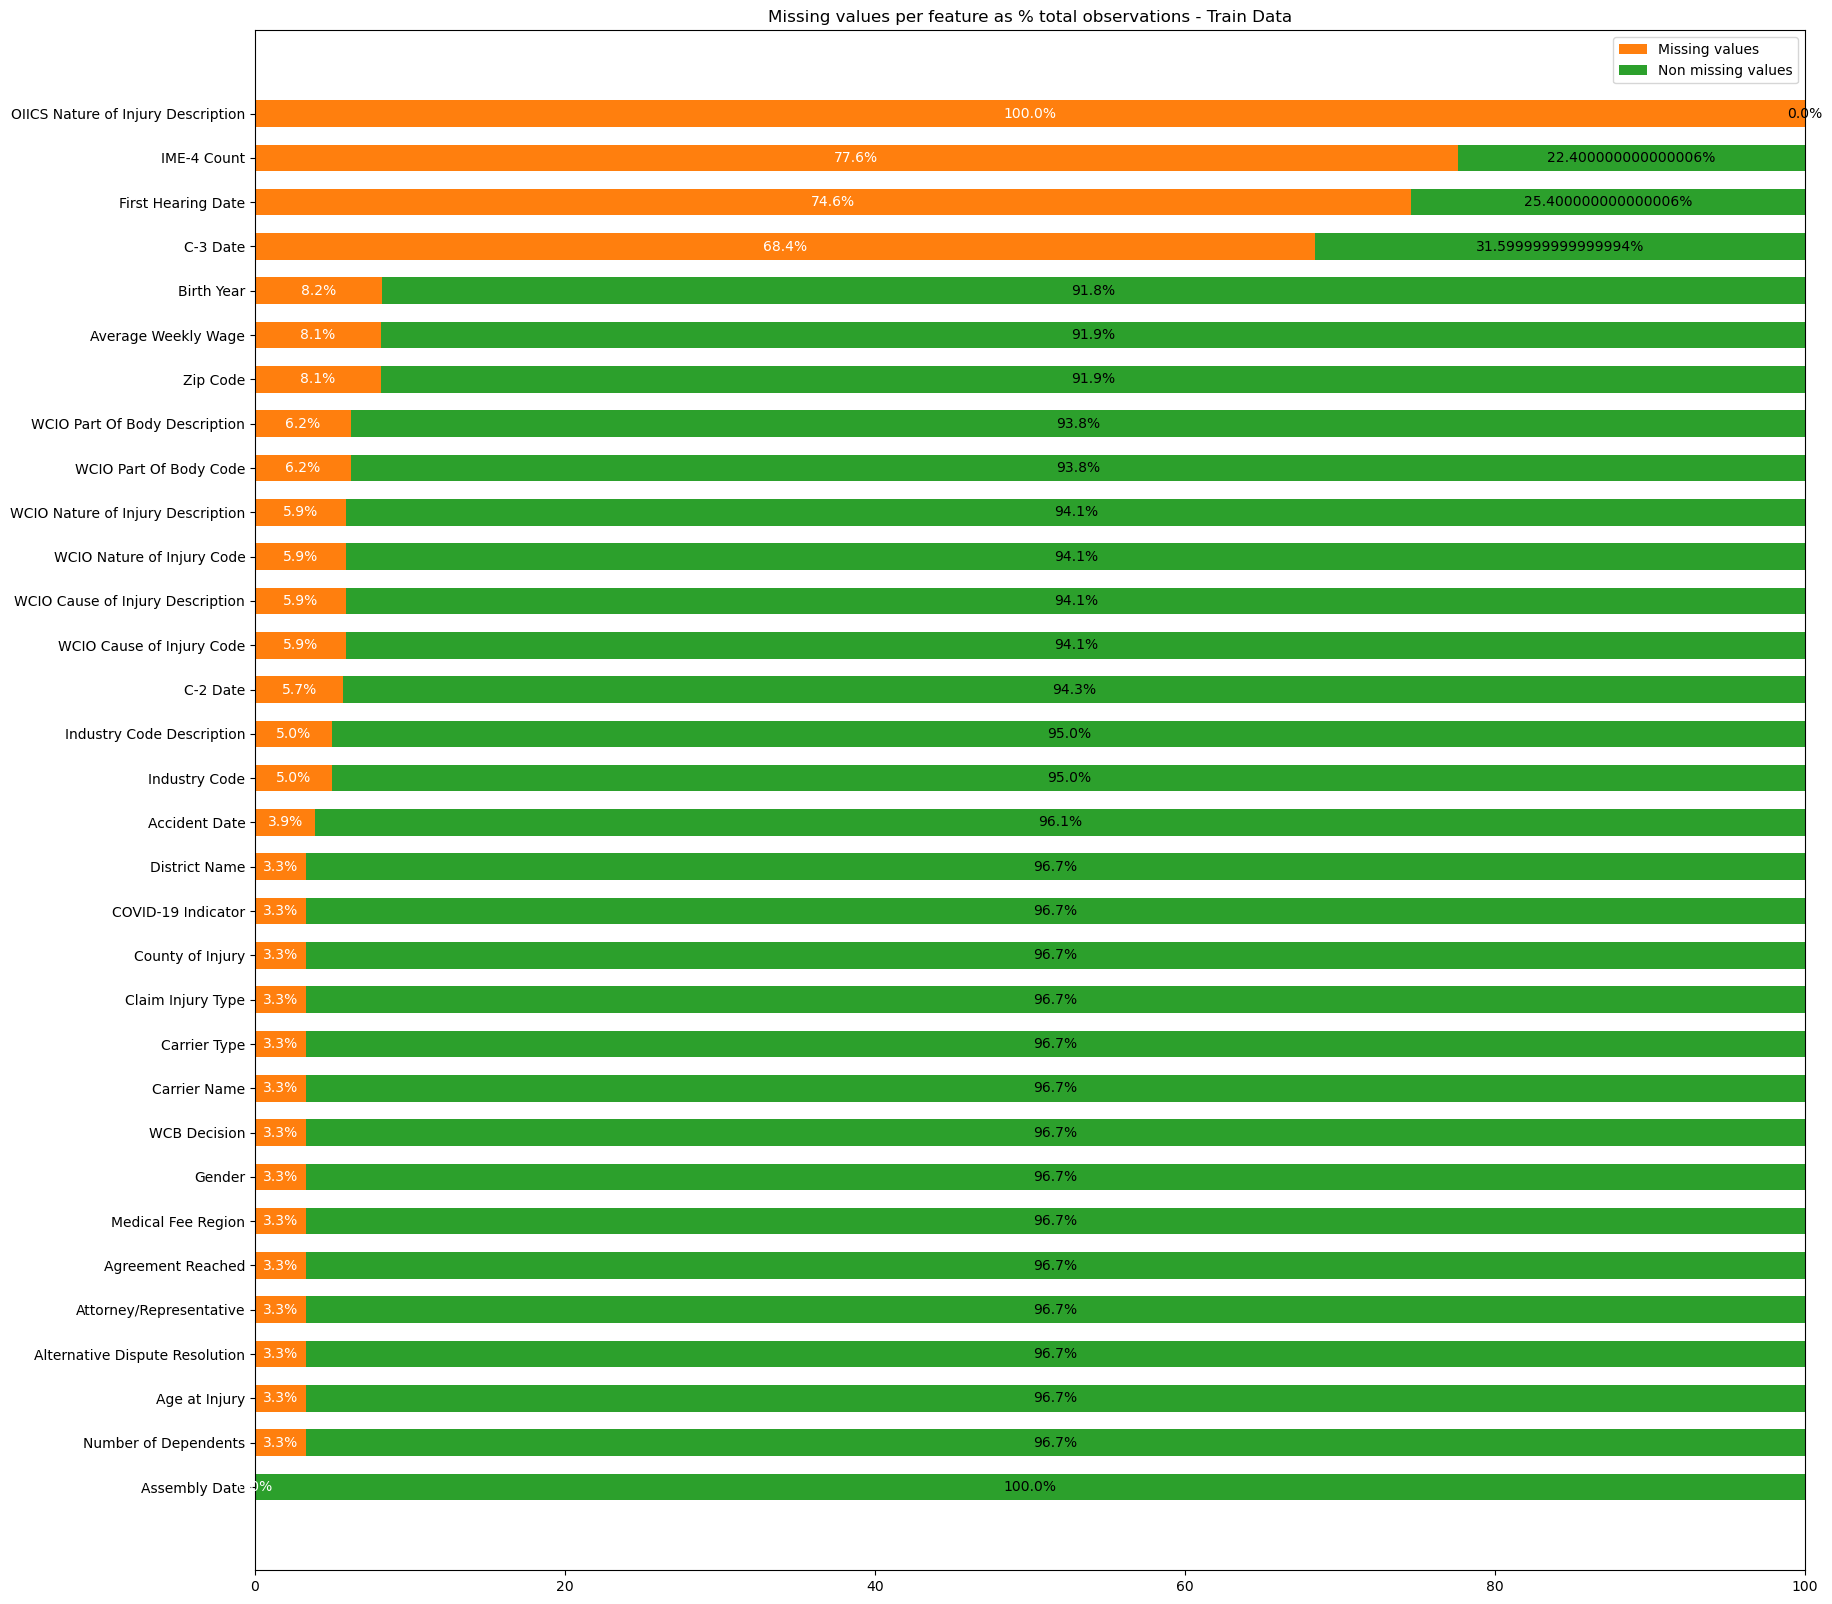

In [22]:
#visualization of missing values
percentage_missing = round((df.isnull().sum() / df.shape[0])*100,1)
percentage_missing.sort_values(ascending=True, inplace= True)

percentage_missing_df = pd.DataFrame({"missing_values_(%)": percentage_missing})
percentage_missing_df["present_values_(%)"] = abs(percentage_missing_df["missing_values_(%)"] - 100)
percentage_present = percentage_missing_df["present_values_(%)"]
column_names = list(percentage_missing.index)

fig,ax = plt.subplots (figsize = (20,20))
p1 = ax.barh(y=column_names, width=percentage_missing, height= 0.6, color="tab:orange", label="Missing values")
p2 = ax.barh(y=column_names, width=percentage_present, height= 0.6, color="tab:green", left=percentage_missing, label= "Non missing values")
ax.bar_label(p1, labels= [str(element) + "%" for element in percentage_missing], color="white", label_type="center")
ax.bar_label(p2, labels= [str(element) + "%" for element in percentage_present], color="black", label_type="center")
ax.legend()
ax.set_title("Missing values per feature as % total observations - Train Data")
plt.show()

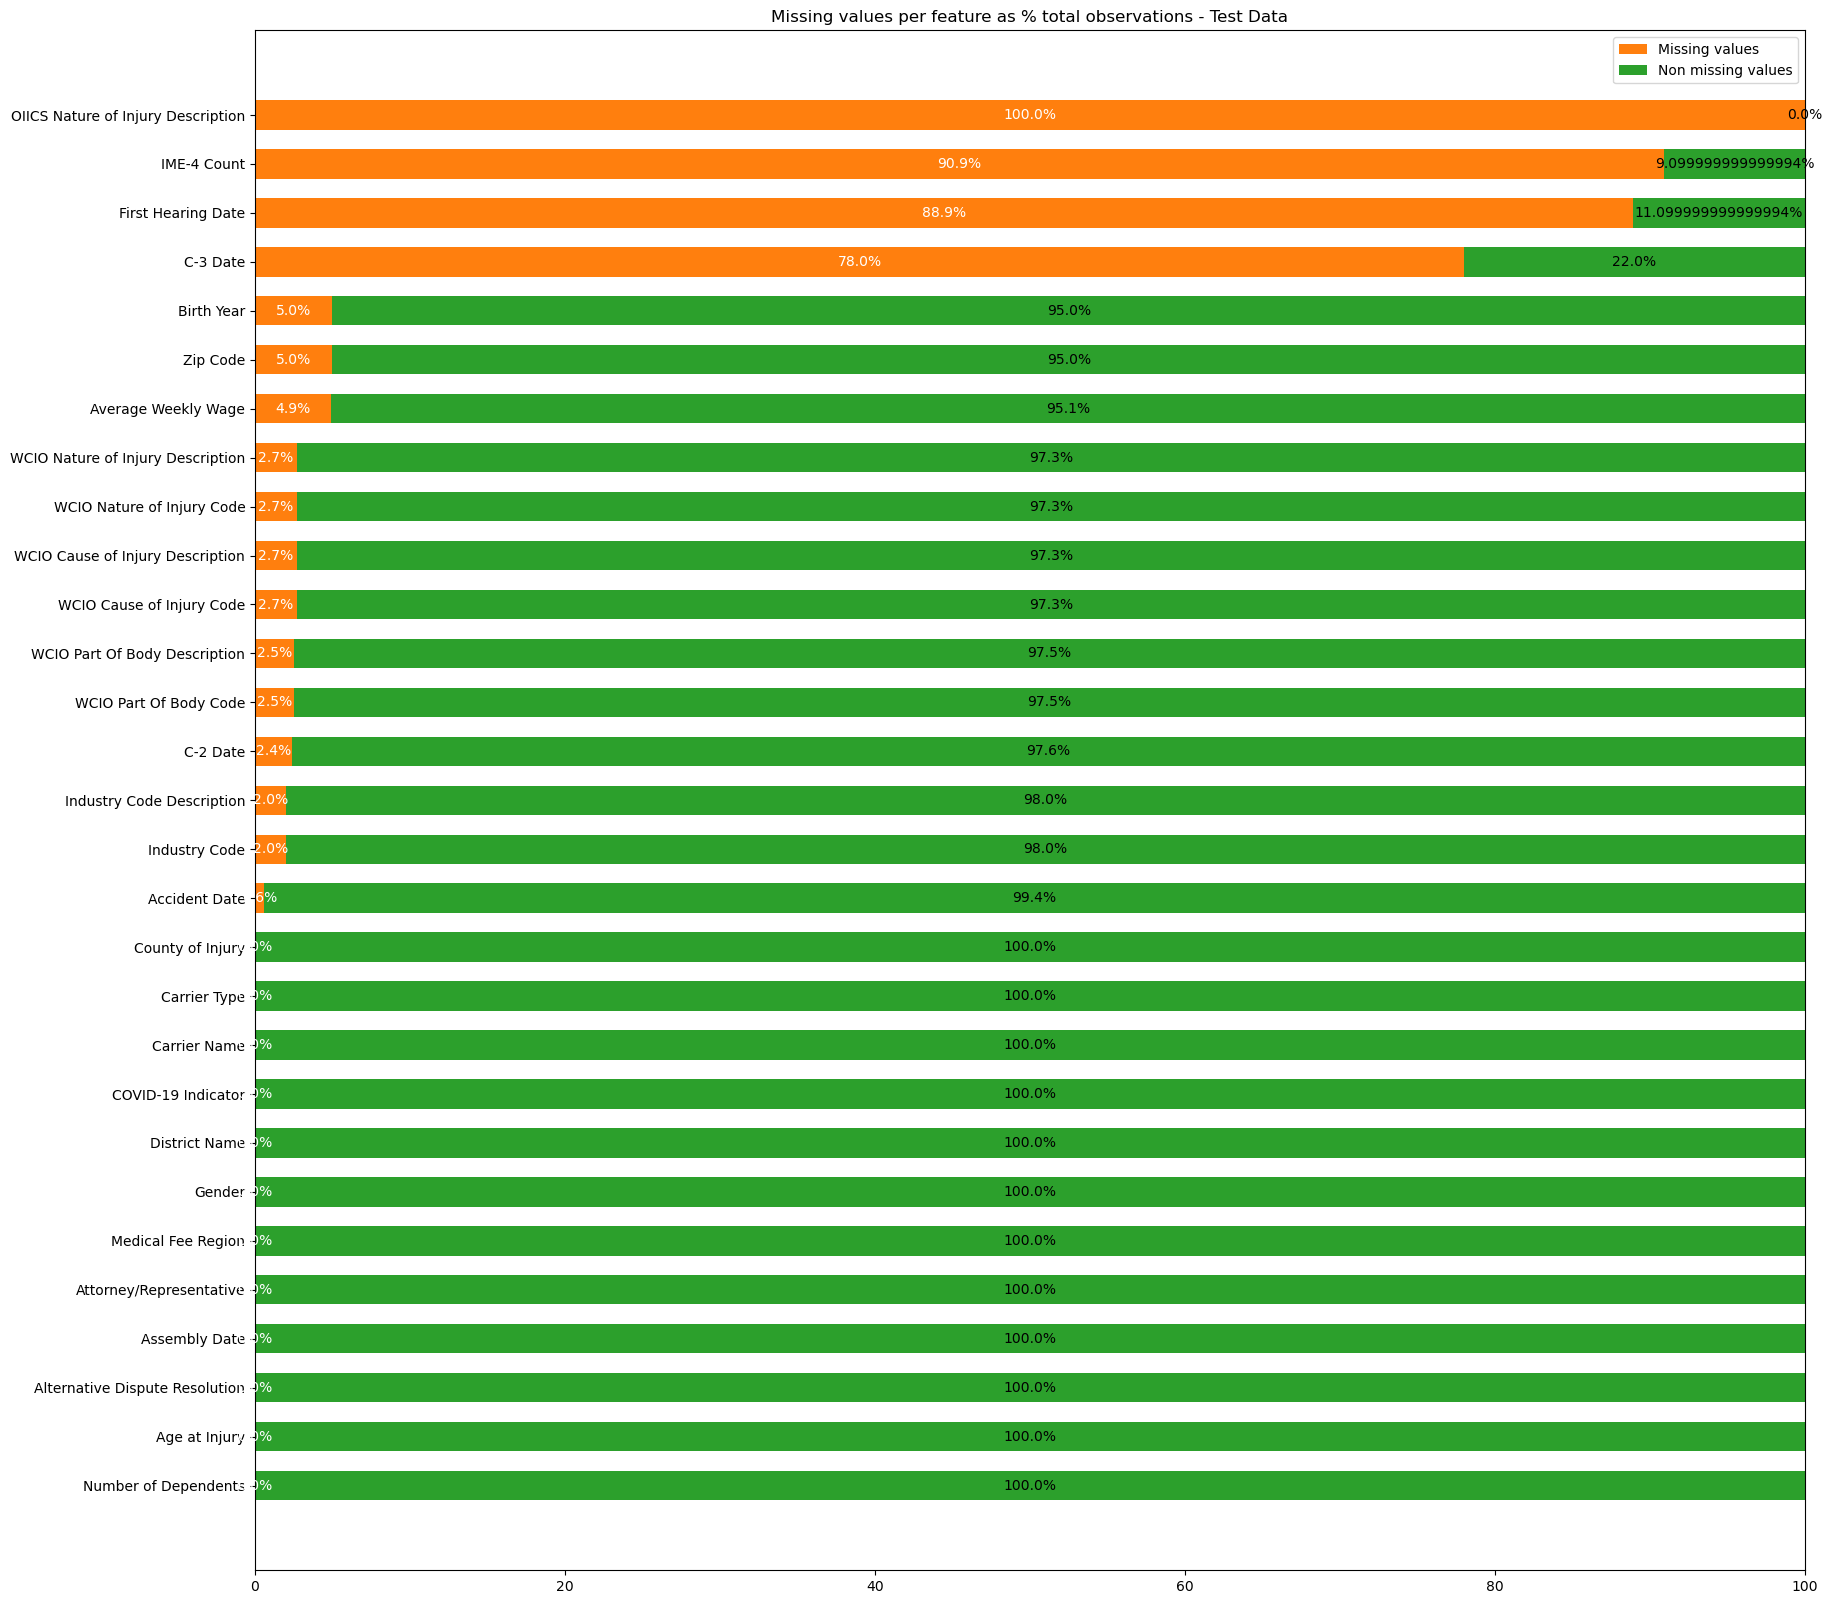

In [23]:
#visualization of missing values
percentage_missing_test = round((df_test.isnull().sum() / df_test.shape[0])*100,1)
percentage_missing_test.sort_values(ascending=True, inplace= True)

percentage_missing_df_test = pd.DataFrame({"missing_values_(%)": percentage_missing_test})
percentage_missing_df_test["present_values_(%)"] = abs(percentage_missing_df_test["missing_values_(%)"] - 100)
percentage_present_test = percentage_missing_df_test["present_values_(%)"]
column_names_test = list(percentage_missing_test.index)

fig,ax = plt.subplots (figsize = (20,20))
p1 = ax.barh(y=column_names_test, width=percentage_missing_test, height= 0.6, color="tab:orange", label="Missing values")
p2 = ax.barh(y=column_names_test, width=percentage_present_test, height= 0.6, color="tab:green", left=percentage_missing_test, label= "Non missing values")
ax.bar_label(p1, labels= [str(element) + "%" for element in percentage_missing_test], color="white", label_type="center")
ax.bar_label(p2, labels= [str(element) + "%" for element in percentage_present_test], color="black", label_type="center")
ax.legend()
ax.set_title("Missing values per feature as % total observations - Test Data")
plt.show()

<hr>
<div class="alert alert-block alert-info" style="font-size:16px" id="ifa">
    
# 1.2. Individual Feature Analysis
- Here we will analyze each feature individually to help us identify outliers, missing or strange values, etc. 
    
</a>

<hr>
<div class="alert alert-block alert-info" style="font-size:14px" id="a_d">
    
# 1.2.1. Accident Date

    
</a>

In [26]:
df_eda['Accident Date'] = pd.to_datetime(df_eda['Accident Date'], errors='coerce')
df_test_eda['Accident Date'] = pd.to_datetime(df_test_eda['Accident Date'], errors='coerce')

In [27]:
df_eda['Accident Date'].describe()

count                           570337
mean     2021-04-28 21:00:27.892982784
min                1961-09-06 00:00:00
25%                2020-09-14 00:00:00
50%                2021-06-27 00:00:00
75%                2022-03-21 00:00:00
max                2023-09-29 00:00:00
Name: Accident Date, dtype: object

In [28]:
df_test_eda['Accident Date'].describe()

count                           385531
mean     2023-07-12 05:52:56.718863104
min                1966-10-28 00:00:00
25%                2023-04-14 00:00:00
50%                2023-08-22 00:00:00
75%                2024-01-06 00:00:00
max                2024-06-04 00:00:00
Name: Accident Date, dtype: object

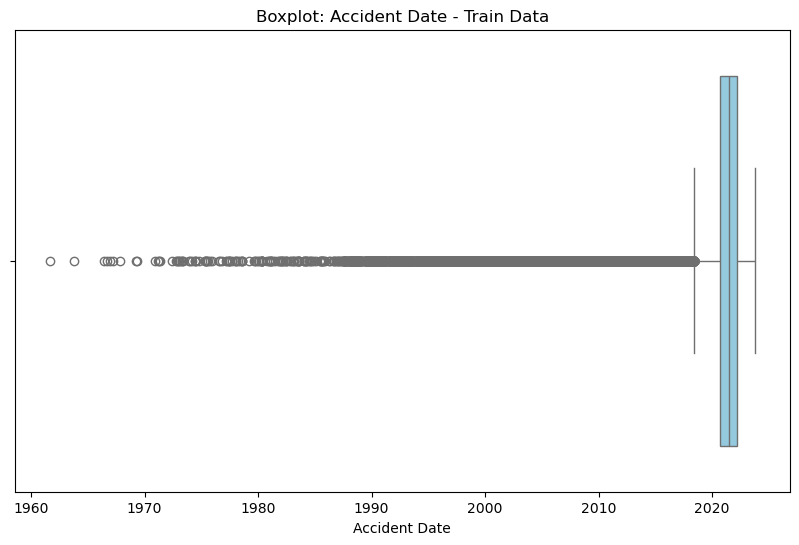

In [29]:
# Boxplot to see outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_eda['Accident Date'], color = 'skyblue')
plt.title('Boxplot: Accident Date - Train Data')
plt.xlabel('Accident Date')
plt.show()

In [30]:
# Here we will convert Accident Date to days since the earliest date, so that we can more easily identify outliers
# As we saw above 1961 is the first occurence of an accident date for train data
accident_date_min = pd.to_datetime("1961-09-06")


df_eda['Accident Date Numeric'] = (df_eda['Accident Date'] - accident_date_min).dt.days / 365.25


Q1_acc = df_eda['Accident Date Numeric'].quantile(0.25)
Q3_acc = df_eda['Accident Date Numeric'].quantile(0.75)
IQR_acc = Q3_acc - Q1_acc

lower_bound_acc = Q1_acc - 1.5 * IQR_acc
upper_bound_acc = Q3_acc + 1.5 * IQR_acc

# Filter the outliers
outliers_acc = df_eda[(df_eda['Accident Date Numeric'] < lower_bound_acc) | 
                           (df_eda['Accident Date Numeric'] > upper_bound_acc)]

print(outliers_acc['Accident Date'])

Claim Identifier
5394319   2016-09-02
5394016   1996-10-01
5393964   2001-09-12
5394353   1984-03-22
5393878   2016-05-31
             ...    
6164484   2000-05-24
6164509   2012-09-16
6163255   2001-09-14
6164238   2007-05-01
6165071   1980-05-17
Name: Accident Date, Length: 5666, dtype: datetime64[ns]


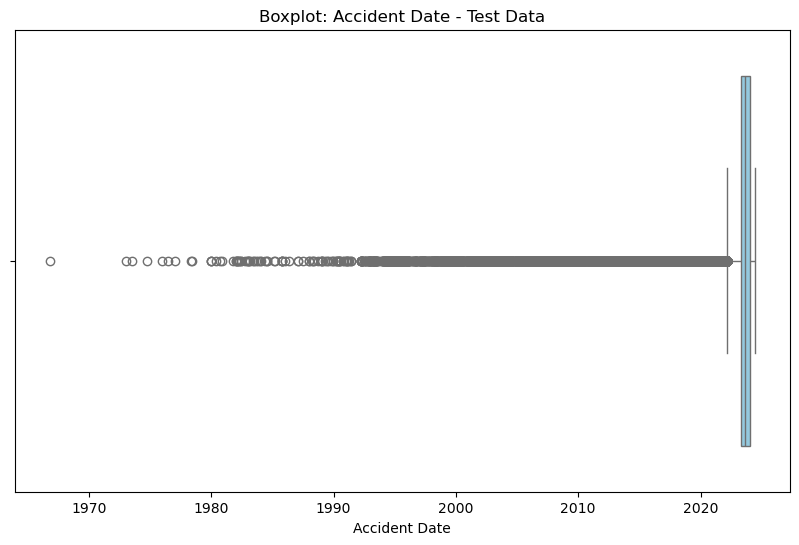

In [31]:
# Boxplot to see outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_test_eda['Accident Date'], color = 'skyblue')
plt.title('Boxplot: Accident Date - Test Data')
plt.xlabel('Accident Date')
plt.show()

In [32]:
# As we saw above 1966 is the first occurence of an accident date for test data
accident_date_min_test = pd.to_datetime("1966-10-28")


df_test_eda['Accident Date Numeric'] = (df_test_eda['Accident Date'] - accident_date_min_test).dt.days / 365.25


Q1_acc_test = df_test_eda['Accident Date Numeric'].quantile(0.25)
Q3_acc_test = df_test_eda['Accident Date Numeric'].quantile(0.75)
IQR_acc_test = Q3_acc_test - Q1_acc_test

lower_bound_acc_test = Q1_acc_test - 1.5 * IQR_acc_test
upper_bound_acc_test = Q3_acc_test + 1.5 * IQR_acc_test

# Filter the outliers
outliers_acc_test = df_test_eda[(df_test_eda['Accident Date Numeric'] < lower_bound_acc_test) | 
                           (df_test_eda['Accident Date Numeric'] > upper_bound_acc_test)]

print(outliers_acc_test['Accident Date'])

Claim Identifier
6166082   2021-08-19
6165886   2020-09-30
6165895   2021-06-15
6166486   2021-10-01
6166308   2021-09-21
             ...    
6553141   1982-05-25
6553592   2012-09-19
6553695   2019-06-26
6553961   2006-07-21
6553137   2012-09-12
Name: Accident Date, Length: 5047, dtype: datetime64[ns]


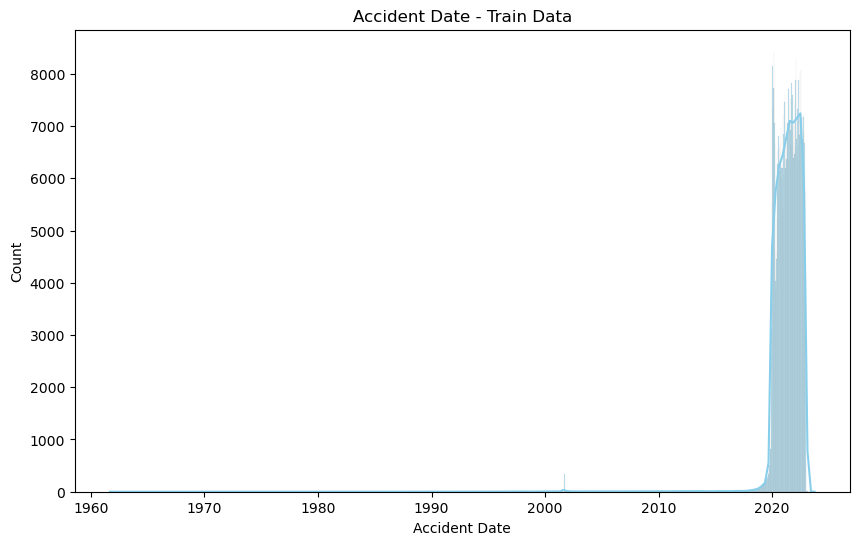

In [33]:
# Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_eda['Accident Date'], kde=True, color = 'skyblue')
plt.title('Accident Date - Train Data')
plt.show()

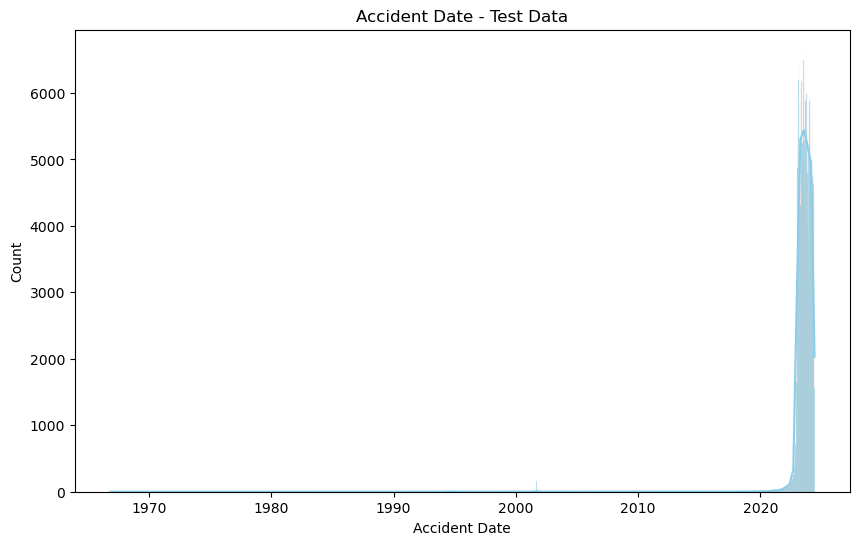

In [34]:
# Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_test_eda['Accident Date'], kde=True, color = 'skyblue')
plt.title('Accident Date - Test Data')
plt.show()

In [35]:
print('There are', df_eda['Accident Date'].isna().sum(), 'outliers in the train data.')
print('This represents %',(df_eda['Accident Date'].isna().sum())/len(df_eda), 'of the data')

There are 23133 outliers in the train data.
This represents % 0.03897922388663285 of the data


In [36]:
print('There are', df_test_eda['Accident Date'].isna().sum(), 'outliers in the test data.')
print('This represents %',(df_test_eda['Accident Date'].isna().sum())/len(df_test_eda), 'of the data')

There are 2444 outliers in the test data.
This represents % 0.006299374959726787 of the data


<hr>
<div class="alert alert-block alert-info" style="font-size:12px">
    
# Key Notes: Accident Date

- Distribution: Heavily skewed to the left on both test and train data
- Outliers: Many negative outliers. 5,666 in our train data, 5,047 in test data. 
- Missing Values: Many missing values in train data (23,133, 0.03%). There are less in the test data (2,444, 0.006%), but they are still present.
- Other notes: There is a small spike shortly after the year 2000. As this dataset is collected in the state of New York, we can assume these claims are related to those affected by the 9/11 attacks in New York City. 
    
</a>

<hr>
<div class="alert alert-block alert-info" style="font-size:14px" id="ati">
    
# 1.2.2. Age At Injury

    
</a>

In [39]:
df_eda['Age at Injury'].describe()

count    574026.000000
mean         42.114270
std          14.256432
min           0.000000
25%          31.000000
50%          42.000000
75%          54.000000
max         117.000000
Name: Age at Injury, dtype: float64

In [40]:
df_test_eda['Age at Injury'].describe()

count    387975.000000
mean         41.414944
std          14.501056
min           0.000000
25%          30.000000
50%          40.000000
75%          53.000000
max         114.000000
Name: Age at Injury, dtype: float64

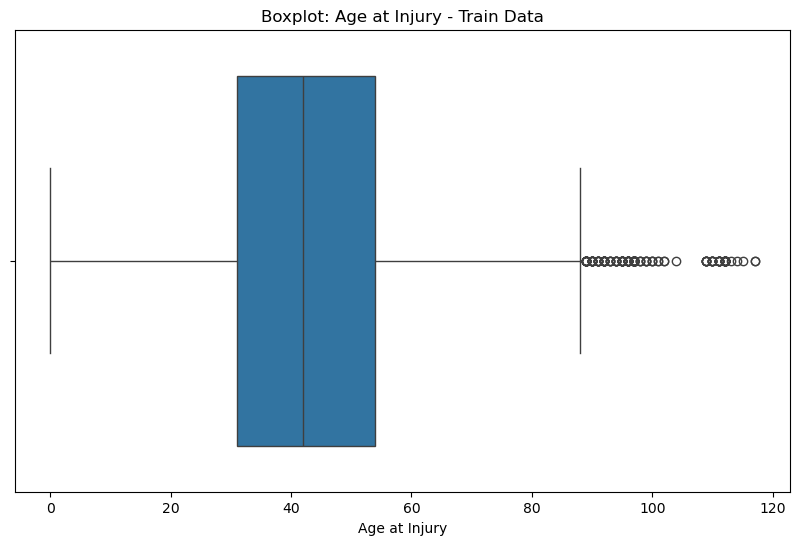

In [41]:
# Boxplot to see outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_eda['Age at Injury'])
plt.title('Boxplot: Age at Injury - Train Data')
plt.xlabel('Age at Injury')
plt.show()

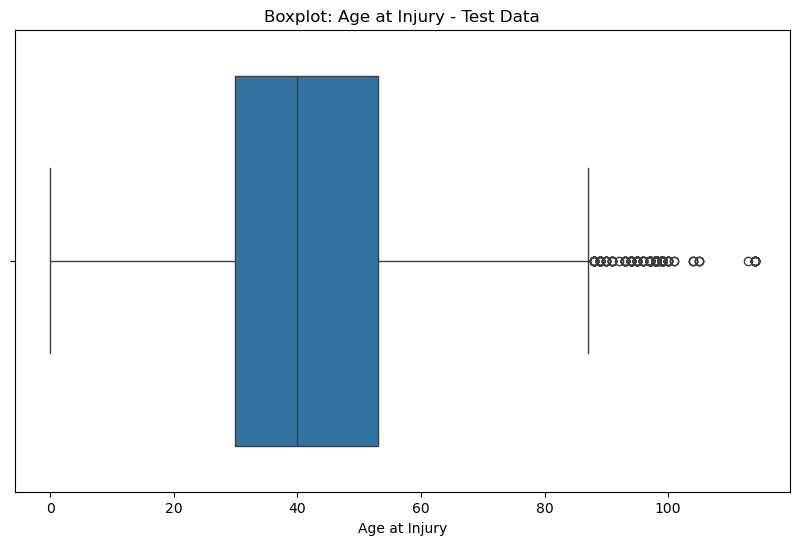

In [42]:
# Boxplot to see outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_test_eda['Age at Injury'])
plt.title('Boxplot: Age at Injury - Test Data')
plt.xlabel('Age at Injury')
plt.show()

In [43]:
extreme_age_outliers = (df_eda['Age at Injury'][df_eda['Age at Injury'] > 88])
print('There are', len(extreme_age_outliers), 'extreme outliers in the train data.')

There are 197 extreme outliers in the train data.


In [44]:
extreme_age_outliers_test = (df_test_eda['Age at Injury'][df_test_eda['Age at Injury'] > 88])
print('There are', len(extreme_age_outliers_test), 'extreme outliers in the test data.')

There are 443 extreme outliers in the test data.


In [45]:
q3_age = df_eda['Age at Injury'].quantile(.75)
q1_age = df_eda['Age at Injury'].quantile(.25)
iqr_age = q3_age - q1_age

outlier_age = q3_age + 1.5 * iqr_age
print(outlier_age)

88.5


Workers who got injured at age 88.5 or older are outliers, we will remove them later

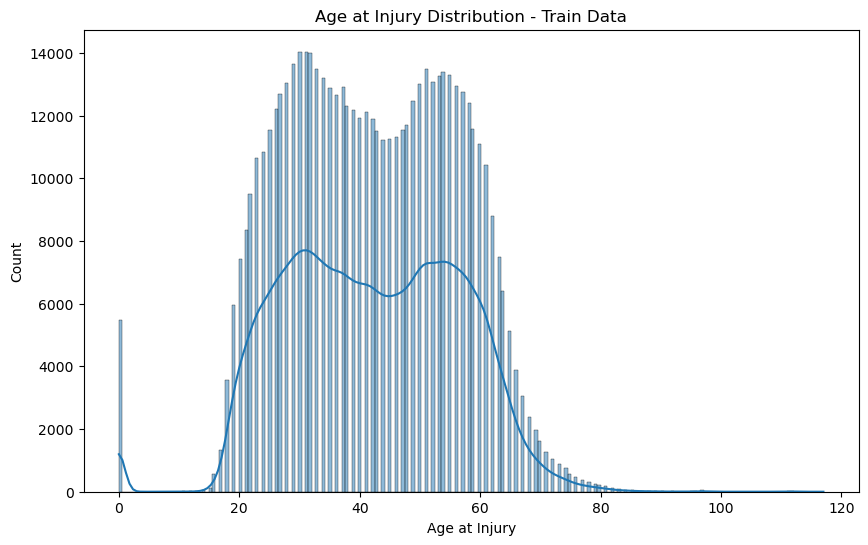

In [47]:
# Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_eda['Age at Injury'], kde=True)
plt.title('Age at Injury Distribution - Train Data')
plt.show()

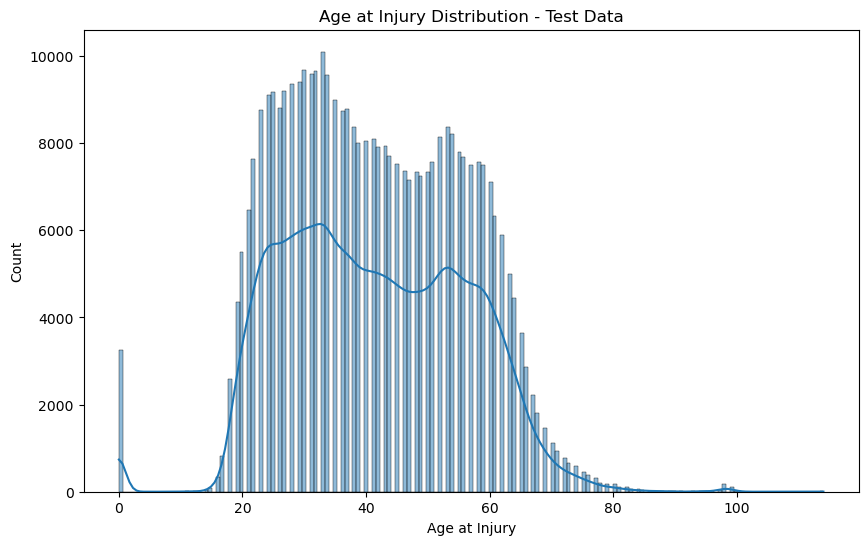

In [48]:
# Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_test_eda['Age at Injury'], kde=True)
plt.title('Age at Injury Distribution - Test Data')
plt.show()

Age appears to have a bimodal distrubution in both test and train data, with the presence of extreme positive outliers.

In [50]:
df_eda['Age at Injury'].isna().sum()

19444

In [51]:
df_test_eda['Age at Injury'].isna().sum()

0

In [52]:
print('There are', len(df_eda[df_eda['Age at Injury'] == 0]), 'rows with age value 0 in the training data.')
print('There are', len(df_test_eda[df_test_eda['Age at Injury'] == 0]), 'rows with age value 0 in the test data.')

There are 5464 rows with age value 0 in the training data.
There are 3248 rows with age value 0 in the test data.


<hr>
<div class="alert alert-block alert-info" style="font-size:12px">
    
# Key Notes: Accident Date

- Distribution: Bimodal, with peaks around 30 and 60 in both test and traind data. 
- Outliers: Presnence of some high outliers in both datasets. Ages extend up to above 100 years in both test and train. These values don't make sense as retirement age in the US is 65 years old, and injuries at work well above this age seem unlikely.
- Missing Values: No conventional missing values. However, there are many values of 0 in both test and train data, which we will interpret as missing.
    
</a>

<hr>
<div class="alert alert-block alert-info" style="font-size:14px" id="adr">
    
# 1.2.3. Alternative Dispute Resolution

    
</a>

In [55]:
df_eda['Alternative Dispute Resolution'].isna().sum()

19444

In [56]:
df_test_eda['Alternative Dispute Resolution'].isna().sum()

0

In [57]:
df_eda['Alternative Dispute Resolution'].value_counts()
#We identified 5 unknown values in train data

Alternative Dispute Resolution
N    571412
Y      2609
U         5
Name: count, dtype: int64

In [58]:
df_test_eda['Alternative Dispute Resolution'].value_counts()
#We identified 1 unknown value in test data

Alternative Dispute Resolution
N    386314
Y      1660
U         1
Name: count, dtype: int64

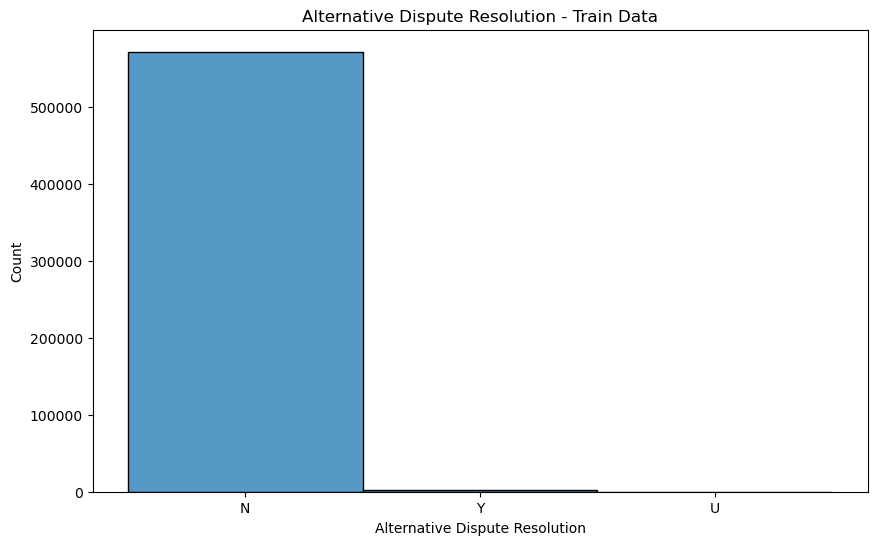

In [59]:
# Alternative Dispute Resolution distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_eda['Alternative Dispute Resolution'], stat = 'count')
plt.title('Alternative Dispute Resolution - Train Data')
plt.show()

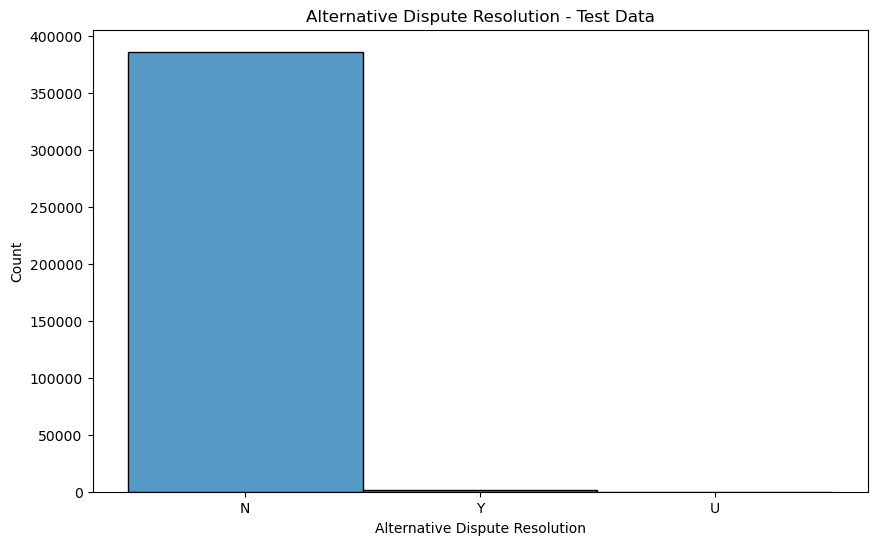

In [60]:
# Alternative Dispute Resolution distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_test_eda['Alternative Dispute Resolution'], stat = 'count')
plt.title('Alternative Dispute Resolution - Test Data')
plt.show()

<hr>
<div class="alert alert-block alert-info" style="font-size:12px">
    
# Key Notes: Alternative Dispute Resolution

- Distribution: Categorical. Very few claims were handled without the interference of the WCB 
- Outliers: 5 'Uknown' values in train data, 1 'Unknown' value in test. We will change these to the mode during preprocessing in order to make this feature binary. 
- Missing Values: No missing values.
    
</a>

<hr>
<div class="alert alert-block alert-info" style="font-size:14px" id="ad">
    
# 1.2.4. Assembly Date

    
</a>

In [63]:
df_eda['Assembly Date'] = pd.to_datetime(df_eda['Assembly Date'], errors='coerce')
df_test_eda['Assembly Date'] = pd.to_datetime(df_test_eda['Assembly Date'], errors='coerce')

In [64]:
df_eda['Assembly Date'].describe()

count                           593470
mean     2021-07-19 03:24:38.155256064
min                2020-01-01 00:00:00
25%                2020-10-26 00:00:00
50%                2021-07-29 00:00:00
75%                2022-04-19 00:00:00
max                2022-12-31 00:00:00
Name: Assembly Date, dtype: object

In [65]:
df_test_eda['Assembly Date'].describe()

count                           387975
mean     2023-09-16 22:54:40.126811904
min                2023-01-02 00:00:00
25%                2023-05-10 00:00:00
50%                2023-09-18 00:00:00
75%                2024-01-26 00:00:00
max                2024-06-05 00:00:00
Name: Assembly Date, dtype: object

In [66]:
df_eda['Assembly Date'].isna().sum()

0

In [67]:
df_test_eda['Assembly Date'].isna().sum()

0

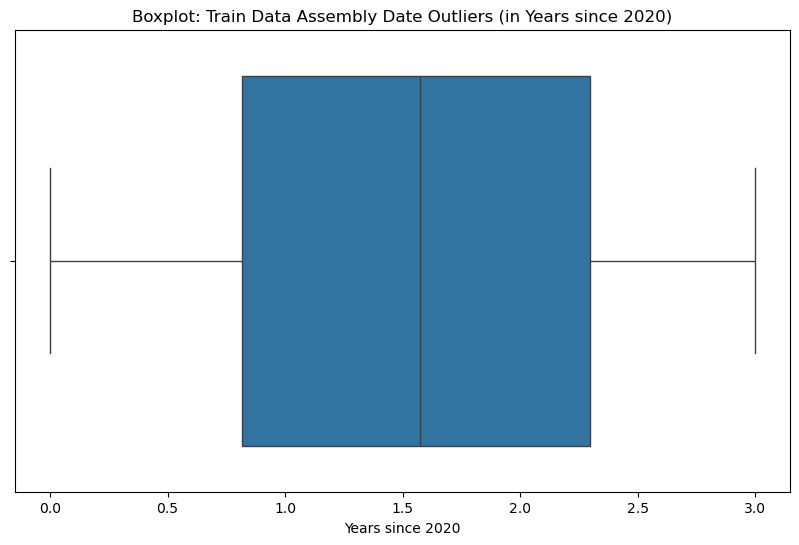

Empty DataFrame
Columns: [Assembly Date, Assembly Date Numeric]
Index: []


In [68]:
# Drop rows with NaT in 'Assembly Date' to avoid calculation errors
df_eda_assembly = df_eda.dropna(subset=['Assembly Date'])

# Set the reference date
assembly_date_min = pd.to_datetime("2020-01-01")

# Calculate the number of years since the reference date
df_eda_assembly['Assembly Date Numeric'] = (df_eda_assembly['Assembly Date'] - assembly_date_min).dt.total_seconds() / (365.25 * 24 * 3600)

# Calculate the IQR to detect outliers
Q1_assem = df_eda_assembly['Assembly Date Numeric'].quantile(0.25)
Q3_assem = df_eda_assembly['Assembly Date Numeric'].quantile(0.75)
IQR_assem = Q3_assem - Q1_assem

# Define the outlier range
lower_bound_assem = Q1_assem - 1.5 * IQR_assem
upper_bound_assem = Q3_assem + 1.5 * IQR_assem

# Filter the outliers
outliers_assem = df_eda_assembly[(df_eda_assembly['Assembly Date Numeric'] < lower_bound_assem) | 
                           (df_eda_assembly['Assembly Date Numeric'] > upper_bound_assem)]

# Boxplot to see outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_eda_assembly['Assembly Date Numeric'])
plt.title('Boxplot: Train Data Assembly Date Outliers (in Years since 2020)')
plt.xlabel('Years since 2020')
plt.show()

# Print the outliers if needed
print(outliers_assem[['Assembly Date', 'Assembly Date Numeric']])


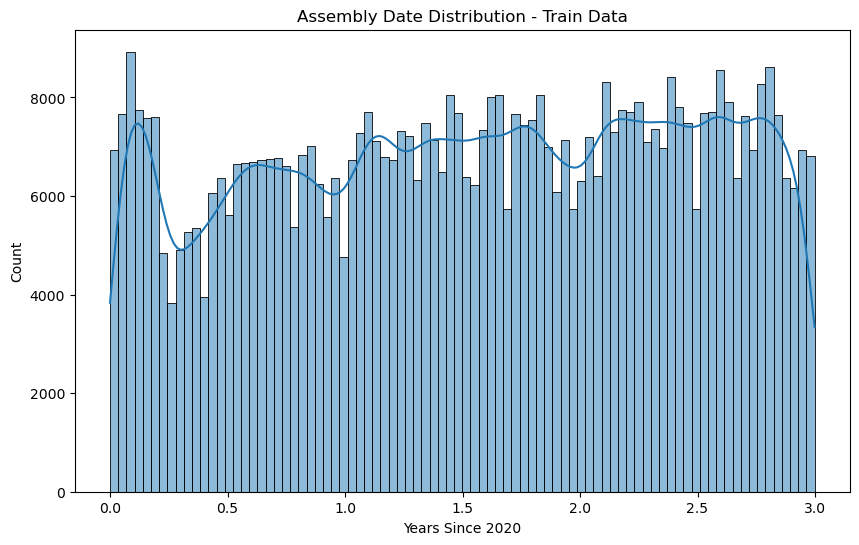

In [69]:
# Assembly Date distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_eda_assembly['Assembly Date Numeric'], kde=True)
plt.title('Assembly Date Distribution - Train Data')
plt.xlabel('Years Since 2020')
plt.show()

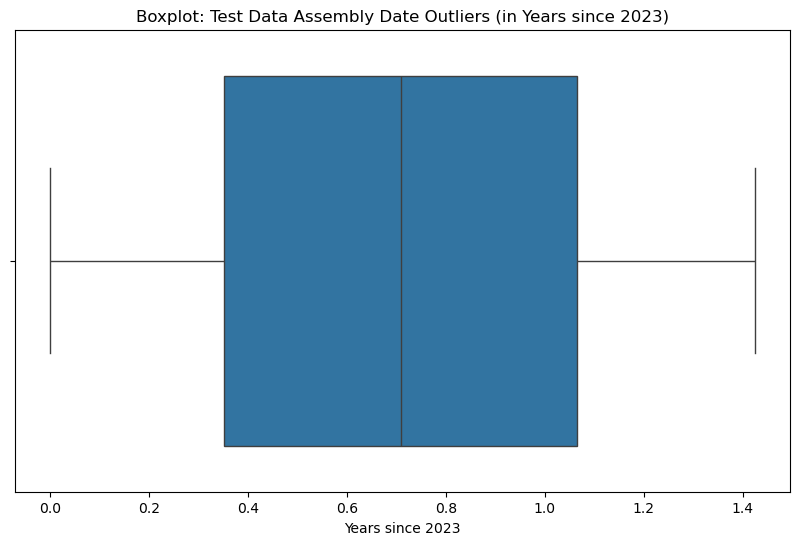

Empty DataFrame
Columns: [Assembly Date, Assembly Date Numeric]
Index: []


In [70]:
# Drop rows with NaT in 'Assembly Date' to avoid calculation errors
df_test_eda_assembly = df_test_eda.dropna(subset=['Assembly Date'])

# Set the reference date
assembly_date_min_test = pd.to_datetime("2023-01-02")

# Calculate the number of years since the reference date
df_test_eda_assembly['Assembly Date Numeric'] = (df_test_eda_assembly['Assembly Date'] - assembly_date_min_test).dt.total_seconds() / (365.25 * 24 * 3600)

# Calculate the IQR to detect outliers
Q1_assem_test = df_test_eda_assembly['Assembly Date Numeric'].quantile(0.25)
Q3_assem_test = df_test_eda_assembly['Assembly Date Numeric'].quantile(0.75)
IQR_assem_test = Q3_assem_test - Q1_assem_test

# Define the outlier range
lower_bound_assem_test = Q1_assem_test - 1.5 * IQR_assem_test
upper_bound_assem_test = Q3_assem_test + 1.5 * IQR_assem_test

# Filter the outliers
outliers_assem_test = df_test_eda_assembly[(df_test_eda_assembly['Assembly Date Numeric'] < lower_bound_assem_test) | 
                           (df_test_eda_assembly['Assembly Date Numeric'] > upper_bound_assem_test)]

# Boxplot to see outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_test_eda_assembly['Assembly Date Numeric'])
plt.title('Boxplot: Test Data Assembly Date Outliers (in Years since 2023)')
plt.xlabel('Years since 2023')
plt.show()

# Print the outliers if needed
print(outliers_assem_test[['Assembly Date', 'Assembly Date Numeric']])


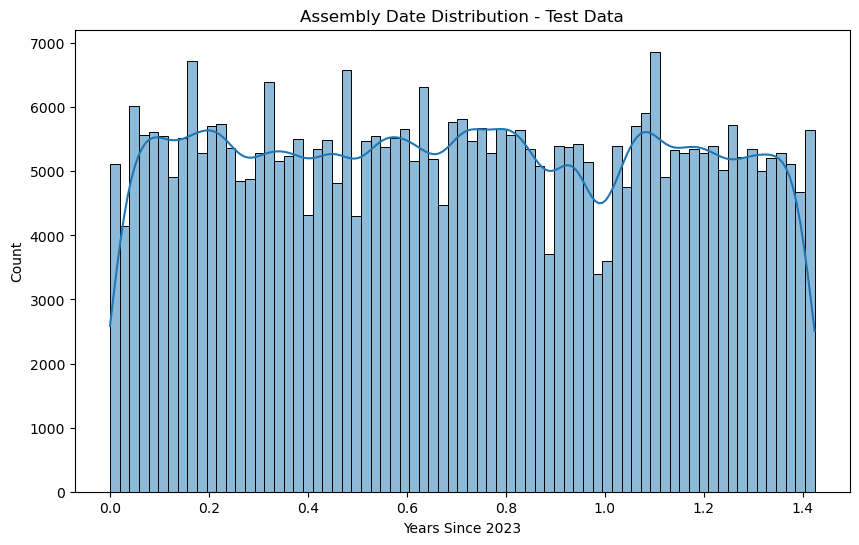

In [71]:
# Assembly Date distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_test_eda_assembly['Assembly Date Numeric'], kde=True)
plt.title('Assembly Date Distribution - Test Data')
plt.xlabel('Years Since 2023')
plt.show()

Here we can see our training data covers a wider timespan than our test data, and the train data is from the years prior to the test data. There are no outliers or strange values in either dataset.

<hr>
<div class="alert alert-block alert-info" style="font-size:12px">
    
# Key Notes: Assembly Date

- Distribution: Both train and test data have a roughly uniform distribution. Training data spans a longer time period than test data. 
- Outliers: No outliers in test or train data. 
- Missing Values: No missing values in test or train data. 
    
</a>

<hr>
<div class="alert alert-block alert-info" style="font-size:14px" id="a/r">
    
# 1.2.5. Attorney/Representative

    
</a>

In [75]:
df_eda['Attorney/Representative'].value_counts()

Attorney/Representative
N    392291
Y    181735
Name: count, dtype: int64

In [76]:
len(df_eda[df_eda['Attorney/Representative'] == 'N']) / (len(df_eda['Attorney/Representative'])) * 100

66.10123510876709

In [77]:
df_eda['Attorney/Representative'].isna().sum()

19444

In [78]:
df_test_eda['Attorney/Representative'].value_counts()

Attorney/Representative
N    306476
Y     81499
Name: count, dtype: int64

In [79]:
len(df_test_eda[df_test_eda['Attorney/Representative'] == 'N']) / (len(df_test_eda['Attorney/Representative'])) * 100

78.99374959726786

In [80]:
df_test_eda['Attorney/Representative'].isna().sum()

0

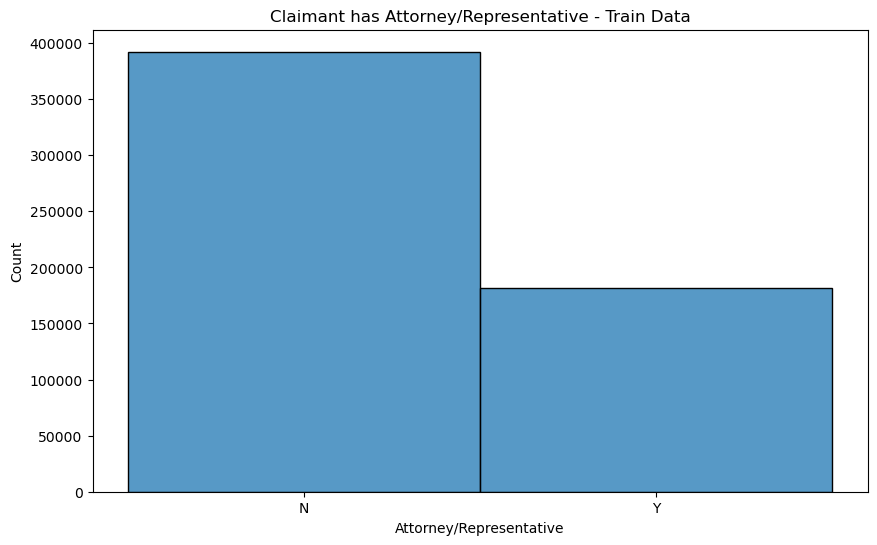

In [81]:
# Attorney/Representative distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_eda['Attorney/Representative'], stat = 'count')
plt.title('Claimant has Attorney/Representative - Train Data')
plt.show()

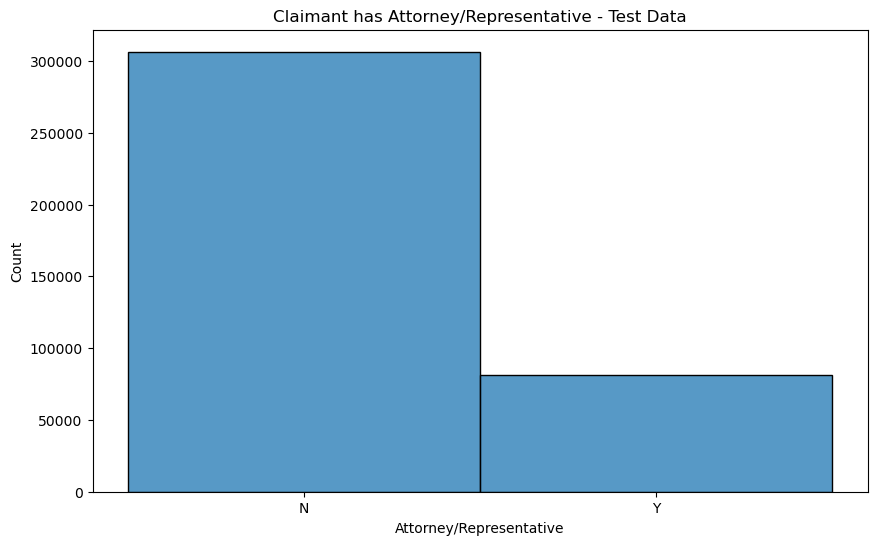

In [82]:
# Attorney/Representative distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_test_eda['Attorney/Representative'], stat = 'count')
plt.title('Claimant has Attorney/Representative - Test Data')
plt.show()

In [83]:
#Transforming the N's and Y's in 0 and 1's
df_eda['Attorney/Representative']
df_eda.replace('N',0,inplace=True)
df_eda.replace('Y',1,inplace=True)

Our training data has almost 20,000 missing values for Attorney/Representative, but no missing values in test data. We can see Approximately 3/4 of claimants did not use an attorney or representative, with a slightly higher proportion using an attorney in the test data.

<hr>
<div class="alert alert-block alert-info" style="font-size:12px">
    
# Key Notes: Attorney/Representative

- Distribution: Binary feature with majority of claims having a value of 'N'. 66.10% 'N' in training data, 78.99% 'N' in test data. During preprocessing, we will transform this feature into 0s and 1s.
- Outliers: No outliers in test or train data. 
- Missing Values: Many missing values in training data (19,445), but none in test data.
    
</a>

<hr>
<div class="alert alert-block alert-info" style="font-size:14px" id="aww">
    
# 1.2.6. Average Weekly Wage

    
</a>

In [87]:
df_eda['Average Weekly Wage'].describe()

count    5.453750e+05
mean     4.910883e+02
std      6.092918e+03
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      8.410000e+02
max      2.828079e+06
Name: Average Weekly Wage, dtype: float64

In [88]:
df_eda['Average Weekly Wage'].isna().sum()

48095

In [89]:
df_test_eda['Average Weekly Wage'].describe()

count    3.687710e+05
mean     1.833438e+02
std      3.542310e+03
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.950317e+06
Name: Average Weekly Wage, dtype: float64

In [90]:
df_test_eda['Average Weekly Wage'].isna().sum()

19204

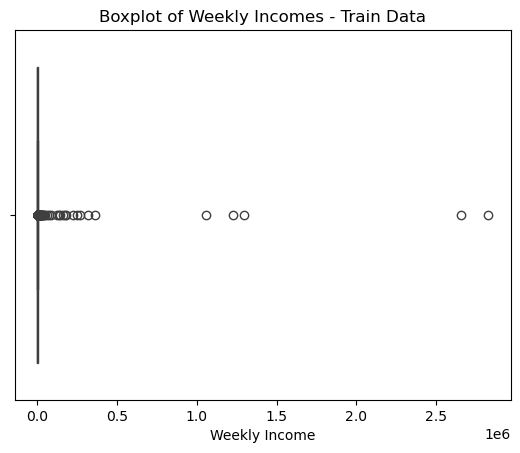

In [91]:
sns.boxplot(x=df_eda['Average Weekly Wage'])
plt.title('Boxplot of Weekly Incomes - Train Data')
plt.xlabel('Weekly Income')
plt.show()

# theres lots of 0 and some extreme outliers

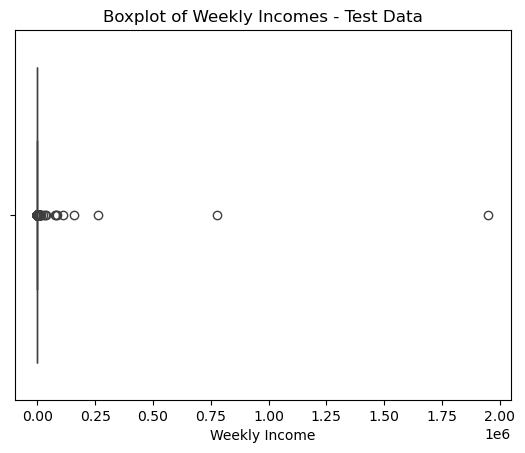

In [92]:
sns.boxplot(x=df_test_eda['Average Weekly Wage'])
plt.title('Boxplot of Weekly Incomes - Test Data')
plt.xlabel('Weekly Income')
plt.show()

# theres lots of 0 and some extreme outliers

In [93]:
# Missing values in 'Average Weekly Wage'
print('Rows where Average Weekly Wage = 0 :',len(df_eda[df_eda['Average Weekly Wage']==0.00]), '(Train)')
print('Rows where Average Weekly Wage = 0 :',len(df_test_eda[df_test_eda['Average Weekly Wage']==0.00]), '(Test)')

Rows where Average Weekly Wage = 0 : 335450 (Train)
Rows where Average Weekly Wage = 0 : 316549 (Test)


In [94]:
# Missing values in 'Average Weekly Wage' in train
print('Percent of rows where Average Weekly Wage = 0 :', len(df_eda[df_eda['Average Weekly Wage']==0.00]) / (len(df_eda['Average Weekly Wage'])) * 100, '(Train)')
# Missing values in 'Average Weekly Wage' in test
print('Percent of rows where Average Weekly Wage = 0 :', len(df_test_eda[df_test_eda['Average Weekly Wage']==0.00]) / (len(df_test_eda['Average Weekly Wage'])) * 100, '(Test)')



Percent of rows where Average Weekly Wage = 0 : 56.523497396667054 (Train)
Percent of rows where Average Weekly Wage = 0 : 81.59005090534184 (Test)


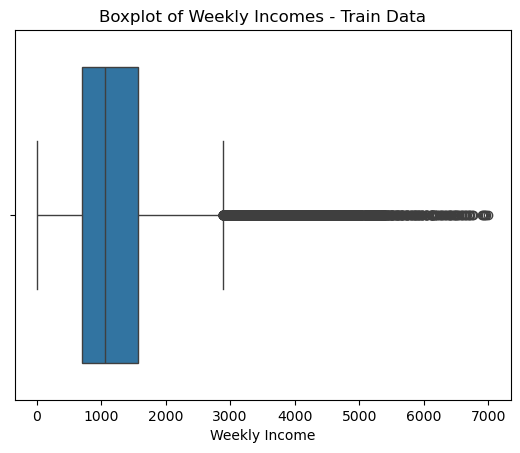

In [95]:
# check the distribution without 0 and outliers
sns.boxplot(x=df_eda[(df_eda['Average Weekly Wage']<=7000.00) & (df_eda['Average Weekly Wage']!=0.00)]['Average Weekly Wage'])
plt.title('Boxplot of Weekly Incomes - Train Data')
plt.xlabel('Weekly Income')
plt.show()

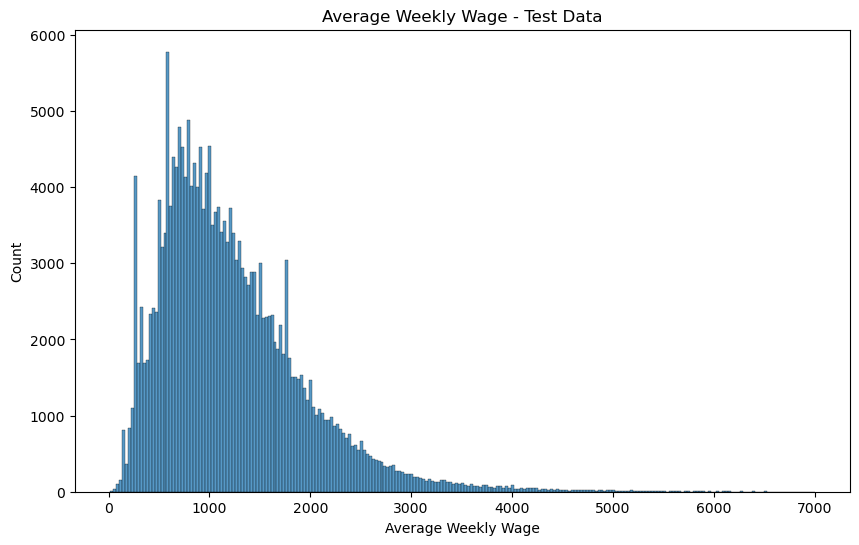

In [96]:
# Average weekly wage distribution - no 0s or high outliers
plt.figure(figsize=(10, 6))
sns.histplot(x=df_eda[(df_eda['Average Weekly Wage']<=7000.00) & (df_eda['Average Weekly Wage']!=0.00)]['Average Weekly Wage'])
plt.title('Average Weekly Wage - Test Data')
plt.xlabel('Average Weekly Wage')
plt.show()

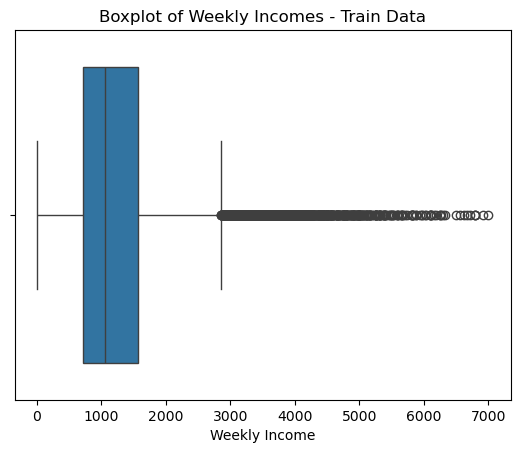

In [97]:
# check the distribution without 0 and outliers
sns.boxplot(x=df_test_eda[(df_test_eda['Average Weekly Wage']<=7000.00) & (df_test_eda['Average Weekly Wage']!=0.00)]['Average Weekly Wage'])
plt.title('Boxplot of Weekly Incomes - Train Data')
plt.xlabel('Weekly Income')
plt.show()

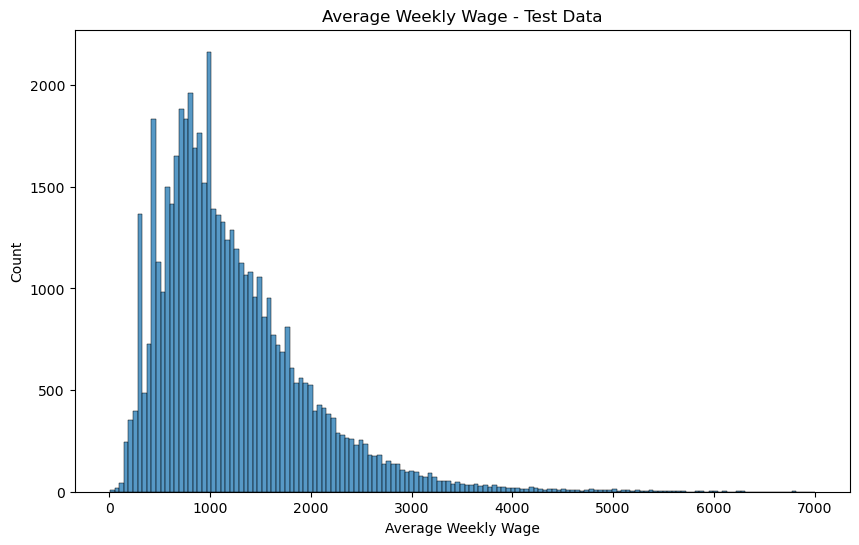

In [98]:
# Average weekly wage distribution - no 0s or high outliers
plt.figure(figsize=(10, 6))
sns.histplot(x=df_test_eda[(df_test_eda['Average Weekly Wage']<=7000.00) & (df_test_eda['Average Weekly Wage']!=0.00)]['Average Weekly Wage'])
plt.title('Average Weekly Wage - Test Data')
plt.xlabel('Average Weekly Wage')
plt.show()

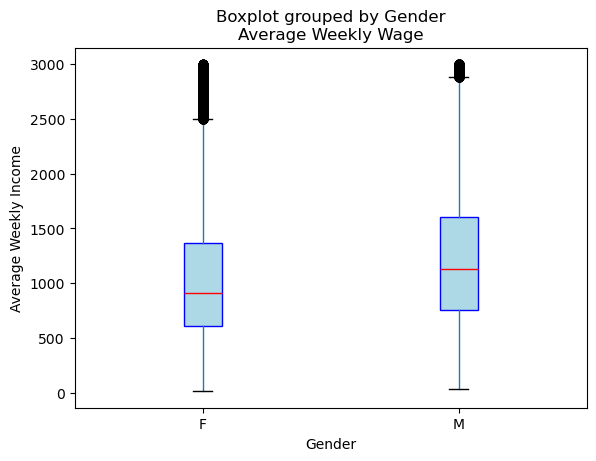

In [99]:
#comparing wage by gender
df_eda[(df_eda['Average Weekly Wage']<=3000.00) & (df_eda['Average Weekly Wage']!=0.00)  # removing outliers and 0s
          & (df_eda['Gender']<'N')].boxplot(column='Average Weekly Wage', by='Gender', grid=False, patch_artist=True,
           boxprops=dict(facecolor='lightblue', color='blue'),
           medianprops=dict(color='red'))
plt.xlabel("Gender")
plt.ylabel("Average Weekly Income")
plt.show()

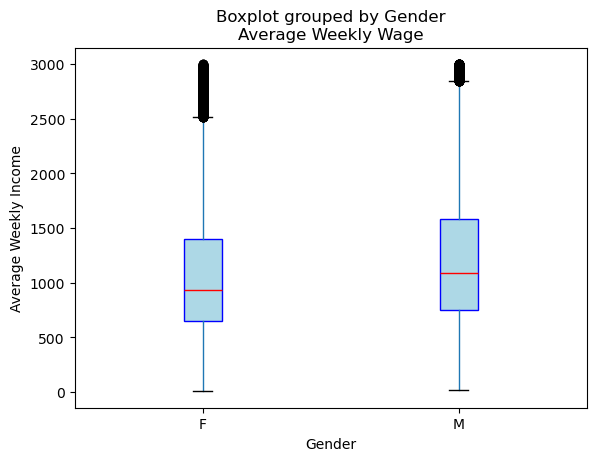

In [100]:
#comparing wage by gender
df_test_eda[(df_test_eda['Average Weekly Wage']<=3000.00) & (df_test_eda['Average Weekly Wage']!=0.00)  # removing outliers and 0s
          & (df_test_eda['Gender']<'N')].boxplot(column='Average Weekly Wage', by='Gender', grid=False, patch_artist=True,
           boxprops=dict(facecolor='lightblue', color='blue'),
           medianprops=dict(color='red'))
plt.xlabel("Gender")
plt.ylabel("Average Weekly Income")
plt.show()

<hr>
<div class="alert alert-block alert-info" style="font-size:12px">
    
# Key Notes: Average Weekly Wage

- Distribution: Continous feature with a highly positively skewed distribution. 
- Outliers: Many extreme high outliers. We can only see an appropriate visualization of the data when dropping these extreme values.
- Missing Values: Conventional missing values in both train (48096 missing values) and test (19204). There are also an incredibly high number of hidden missing values in the form of 0. 0s constitute 56% of training data and 81% of test data. These values will need to be imputed in order to maintain the usefulness of the feature.
- Other notes: Examining interaction between gender and wage: the distribution of men's wages are higher than that of women. (shocking!)
    
</a>

<hr>
<div class="alert alert-block alert-info" style="font-size:14px" id="by">
    
# 1.2.7. Birth Year

    
</a>

In [103]:
df_eda['Birth Year'].describe()

count    544948.000000
mean       1886.767604
std         414.644423
min           0.000000
25%        1965.000000
50%        1977.000000
75%        1989.000000
max        2018.000000
Name: Birth Year, dtype: float64

In [104]:
df_eda['Birth Year'].value_counts()

Birth Year
0.0       25081
1990.0    13180
1989.0    12867
1970.0    12527
1988.0    12463
          ...  
2013.0        1
1907.0        1
1911.0        1
1921.0        1
1909.0        1
Name: count, Length: 107, dtype: int64

In [105]:
df_eda['Birth Year'].isna().sum()

48522

In [106]:
df_test_eda['Birth Year'].describe()

count    368505.000000
mean       1875.383466
std         444.659075
min           0.000000
25%        1967.000000
50%        1980.000000
75%        1992.000000
max        2019.000000
Name: Birth Year, dtype: float64

In [107]:
df_test_eda['Birth Year'].value_counts()

Birth Year
0.0       19596
1990.0     9352
1992.0     8657
1991.0     8620
1993.0     8596
          ...  
1924.0        1
2011.0        1
1928.0        1
1922.0        1
2019.0        1
Name: count, Length: 102, dtype: int64

In [108]:
df_test_eda['Birth Year'].isna().sum()

19470

In [109]:
print(len(df_eda[df_eda['Birth Year'] == 0.0]))

25081


In [110]:
#removing NAs to improve visualization
df_eda['Birth Year'].replace(0,np.nan,inplace=True)
df_test_eda['Birth Year'].replace(0,np.nan,inplace=True)

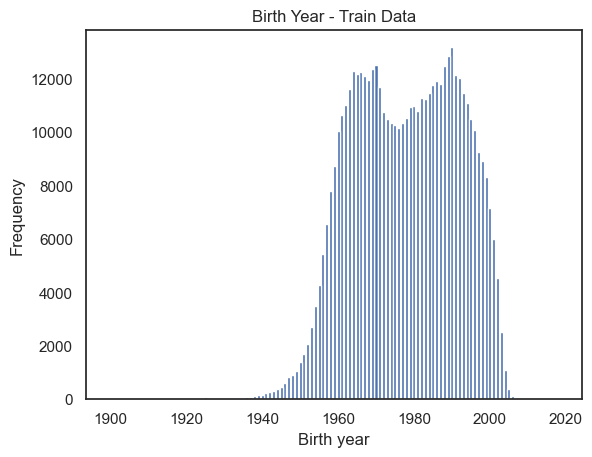

In [111]:
sns.set_theme(style="white")
fig, ax = plt.subplots()
age = df_eda['Birth Year'].dropna().value_counts()
ax.bar(age.index, age.values)
plt.title('Birth Year - Train Data')
plt.xlabel('Birth year')
plt.ylabel('Frequency')
plt.show()

#Its an inverse of ages at time of accident so its correct.

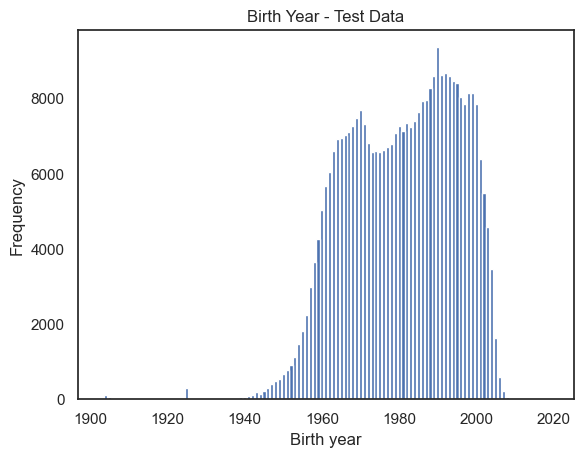

In [112]:
sns.set_theme(style="white")
fig, ax = plt.subplots()
age = df_test_eda['Birth Year'].dropna().value_counts()
ax.bar(age.index, age.values)
plt.title('Birth Year - Test Data')
plt.xlabel('Birth year')
plt.ylabel('Frequency')
plt.show()

#Its an inverse of ages at time of accident so its correct.

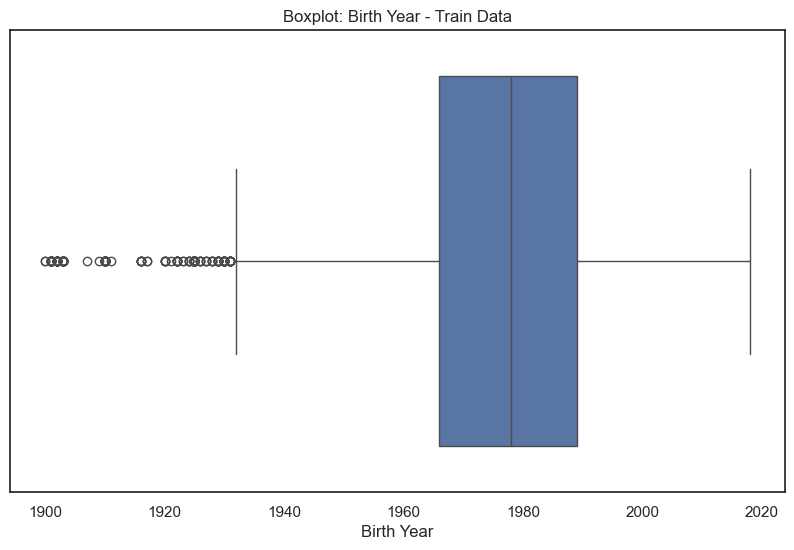

In [113]:
# Boxplot to see outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_eda['Birth Year'])
plt.title('Boxplot: Birth Year - Train Data')
plt.xlabel('Birth Year')
plt.show()

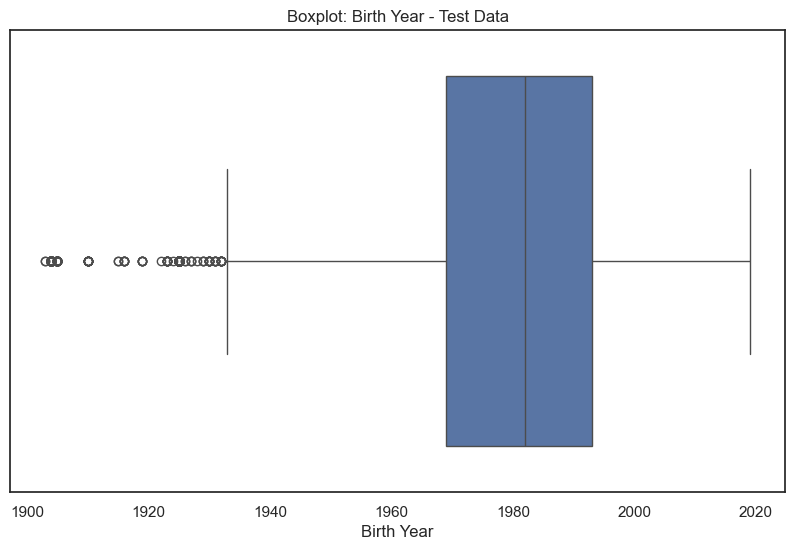

In [114]:
# Boxplot to see outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_test_eda['Birth Year'])
plt.title('Boxplot: Birth Year - Test Data')
plt.xlabel('Birth Year')
plt.show()

Birth Year feature has many potential problems:  
- Both test and train data have entries with a birth year of 0: we consider these missing values, as a birth year of 0 is not possible.
- Both datasets also have a large number of actually missing values: 48,000 for train, 19,000 for test.
- Both datasets are negatively skewed, with many low outliers. From the boxplots, we can see there are birth years near 1900, which does not make sense for a dataset documenting work injuries in the 2020s. We will address these issues later in preprocessing.

<hr>
<div class="alert alert-block alert-info" style="font-size:12px">
    
# Key Notes: Birth Year

- Distribution: Bimodal distribution, with peaks around 1970 and 1990. Similar to Age at Injury, as is expected. Negatively skewed.
- Outliers: Many low outliers. From the boxplots, we can see there are birth years near 1900, which does not make sense for a dataset documenting work injuries in the 2020s. We will address these issues later in preprocessing.
- Missing Values: Conventional missing values in both train (48,522 missing values) and test (19,470 missing values). There are also hidden missing values in the form of 0s.
- Other notes: Examining interaction between gender and wage: the distribution of men's wages are higher than that of women. (who knew!)
    
</a>

<hr>
<div class="alert alert-block alert-info" style="font-size:14px" id="c2">
    
# 1.2.8. C-2 Date

    
</a>

In [118]:
df_eda['C-2 Date'] = pd.to_datetime(df_eda['C-2 Date'], errors='coerce')
df_test_eda['C-2 Date'] = pd.to_datetime(df_test_eda['C-2 Date'], errors='coerce')

In [119]:
df_eda['C-2 Date'].describe()

count                           559466
mean     2021-07-16 20:11:19.865443328
min                1996-01-12 00:00:00
25%                2020-11-06 00:00:00
50%                2021-08-09 00:00:00
75%                2022-04-26 00:00:00
max                2024-06-01 00:00:00
Name: C-2 Date, dtype: object

In [120]:
df_test_eda['C-2 Date'].describe()

count                           378841
mean     2023-09-09 15:34:00.346214144
min                1985-10-22 00:00:00
25%                2023-05-11 00:00:00
50%                2023-09-18 00:00:00
75%                2024-01-26 00:00:00
max                2024-06-04 00:00:00
Name: C-2 Date, dtype: object

In [121]:
df_eda['C-2 Date'].isna().sum()

34004

In [122]:
df_test_eda['C-2 Date'].isna().sum()

9134

In [123]:
df_eda['C-2 Date'].describe()

count                           559466
mean     2021-07-16 20:11:19.865443328
min                1996-01-12 00:00:00
25%                2020-11-06 00:00:00
50%                2021-08-09 00:00:00
75%                2022-04-26 00:00:00
max                2024-06-01 00:00:00
Name: C-2 Date, dtype: object

In [124]:
df_eda['C-2 Date'].isna().sum()

34004

In [125]:
df_test_eda['C-2 Date'].describe()

count                           378841
mean     2023-09-09 15:34:00.346214144
min                1985-10-22 00:00:00
25%                2023-05-11 00:00:00
50%                2023-09-18 00:00:00
75%                2024-01-26 00:00:00
max                2024-06-04 00:00:00
Name: C-2 Date, dtype: object

In [126]:
df_test_eda['C-2 Date'].isna().sum()

9134

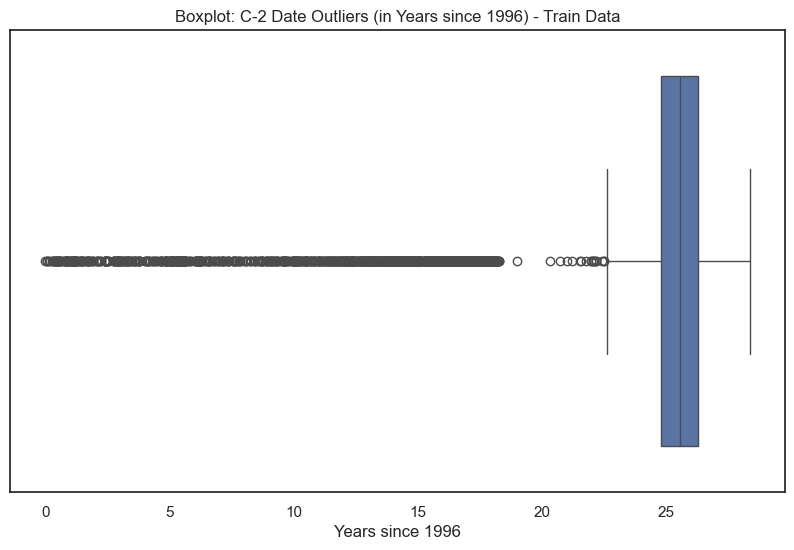

                   C-2 Date  C-2 Date Numeric
Claim Identifier                             
5394775          2012-05-11         16.328542
5394223          2013-06-25         17.451061
5395060          2003-03-21          7.186858
5394659          2009-04-08         13.237509
5396729          2001-03-21          5.188227
...                     ...               ...
6162786          2010-08-27         14.622861
6162841          2013-03-15         17.171800
6162123          2012-01-06         15.983573
6163356          2008-09-11         12.665298
6164509          2012-09-26         16.706366

[1229 rows x 2 columns]


In [127]:
# Drop rows with NaT in 'C-2 Date' to avoid calculation errors
df_eda_c2 = df_eda.dropna(subset=['C-2 Date'])

# Set the reference date
c2_date_min = pd.to_datetime("1996-01-12")

# Calculate the number of years since the reference date
df_eda_c2['C-2 Date Numeric'] = (df_eda_c2['C-2 Date'] - c2_date_min).dt.total_seconds() / (365.25 * 24 * 3600)

# Calculate the IQR to detect outliers
Q1_c2 = df_eda_c2['C-2 Date Numeric'].quantile(0.25)
Q3_c2 = df_eda_c2['C-2 Date Numeric'].quantile(0.75)
IQR_c2 = Q3_c2 - Q1_c2

# Define the outlier range
lower_bound_c2 = Q1_c2 - 1.5 * IQR_c2
upper_bound_c2 = Q3_c2 + 1.5 * IQR_c2

# Filter the outliers
outliers_c2 = df_eda_c2[(df_eda_c2['C-2 Date Numeric'] < lower_bound_c2) | 
                           (df_eda_c2['C-2 Date Numeric'] > upper_bound_c2)]

# Boxplot to see outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_eda_c2['C-2 Date Numeric'])
plt.title('Boxplot: C-2 Date Outliers (in Years since 1996) - Train Data')
plt.xlabel('Years since 1996')
plt.show()

# Print the outliers if needed
print(outliers_c2[['C-2 Date', 'C-2 Date Numeric']])

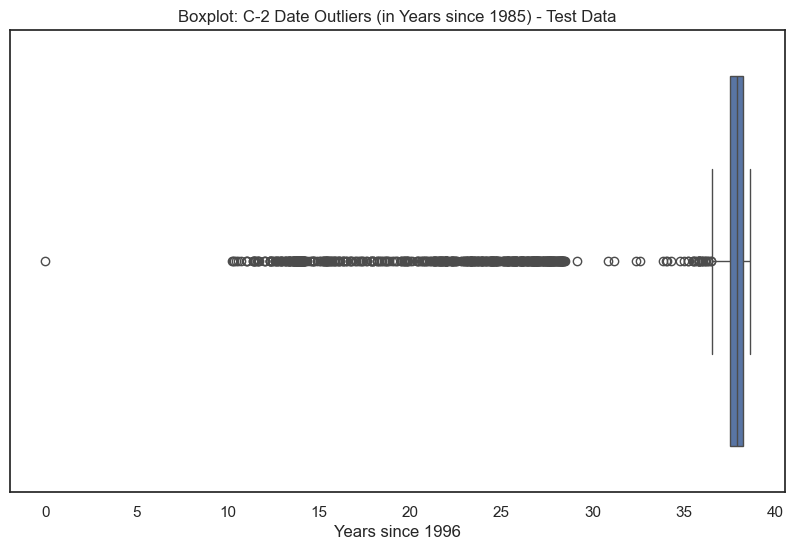

                   C-2 Date  C-2 Date Numeric
Claim Identifier                             
6165926          2014-02-18         28.325804
6169364          2012-09-21         26.915811
6169481          2012-09-11         26.888433
6169755          2009-03-02         23.359343
6169646          2004-02-13         18.310746
...                     ...               ...
6547981          2013-08-01         27.775496
6551347          2007-03-12         21.385352
6550829          1996-10-24         11.006160
6553961          2006-08-10         20.799452
6553137          2012-10-23         27.003422

[541 rows x 2 columns]


In [128]:
# Drop rows with NaT in 'C-2 Date' to avoid calculation errors
df_test_eda_c2 = df_test_eda.dropna(subset=['C-2 Date'])

# Set the reference date
c2_date_min_test = pd.to_datetime("1985-10-22")

# Calculate the number of years since the reference date
df_test_eda_c2['C-2 Date Numeric'] = (df_test_eda_c2['C-2 Date'] - c2_date_min_test).dt.total_seconds() / (365.25 * 24 * 3600)

# Calculate the IQR to detect outliers
Q1_c2_test = df_test_eda_c2['C-2 Date Numeric'].quantile(0.25)
Q3_c2_test = df_test_eda_c2['C-2 Date Numeric'].quantile(0.75)
IQR_c2_test = Q3_c2_test - Q1_c2_test

# Define the outlier range
lower_bound_c2_test = Q1_c2_test - 1.5 * IQR_c2_test
upper_bound_c2_test = Q3_c2_test + 1.5 * IQR_c2_test

# Filter the outliers
outliers_c2_test = df_test_eda_c2[(df_test_eda_c2['C-2 Date Numeric'] < lower_bound_c2_test) | 
                           (df_test_eda_c2['C-2 Date Numeric'] > upper_bound_c2_test)]

# Boxplot to see outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_test_eda_c2['C-2 Date Numeric'])
plt.title('Boxplot: C-2 Date Outliers (in Years since 1985) - Test Data')
plt.xlabel('Years since 1996')
plt.show()

# Print the outliers if needed
print(outliers_c2_test[['C-2 Date', 'C-2 Date Numeric']])

In [129]:
#transform C-2 date into time since the minimum
df_eda['C-2 Date Years'] = (df_eda['C-2 Date'] - c2_date_min).dt.total_seconds() / (365.25 * 24 * 3600)
df_test_eda['C-2 Date Years'] = (df_test_eda['C-2 Date'] - c2_date_min_test).dt.total_seconds() / (365.25 * 24 * 3600)

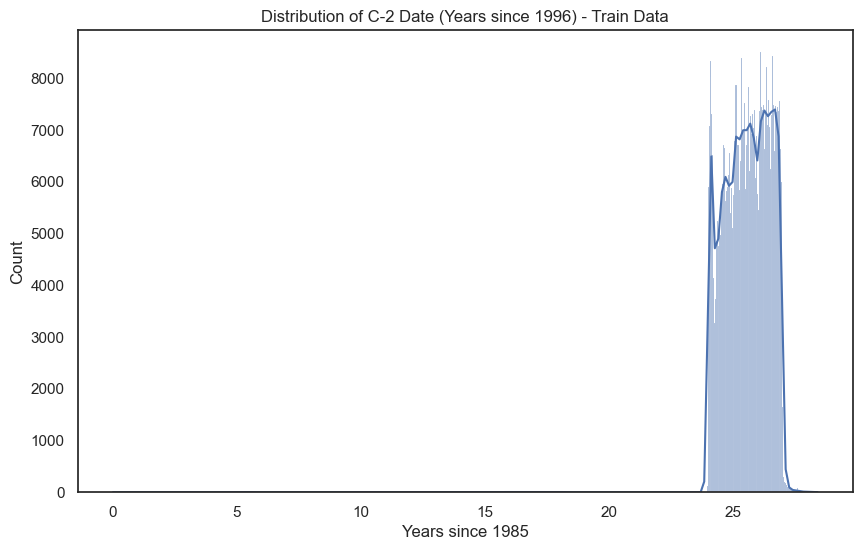

In [130]:
# Plot the train distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_eda['C-2 Date Years'].dropna(), kde=True)
plt.title('Distribution of C-2 Date (Years since 1996) - Train Data')
plt.xlabel('Years since 1985')
plt.show()

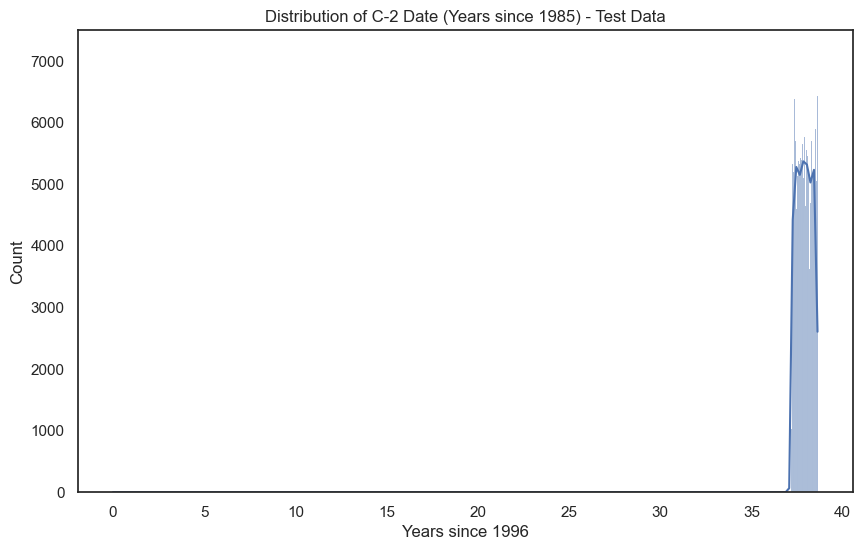

In [131]:
# Plot the test distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_test_eda['C-2 Date Years'].dropna(), kde=True)
plt.title('Distribution of C-2 Date (Years since 1985) - Test Data')
plt.xlabel('Years since 1996')
plt.show()

In [132]:

df_eda['Accident to C-2'] = df_eda['C-2 Date'] - df_eda['Accident Date']

In [133]:
df_eda['Accident to C-2'].describe()

count                         557346
mean      70 days 08:26:12.216899377
std      511 days 15:12:29.067530272
min             -8842 days +00:00:00
25%                  5 days 00:00:00
50%                 10 days 00:00:00
75%                 27 days 00:00:00
max              21503 days 00:00:00
Name: Accident to C-2, dtype: object

<hr>
<div class="alert alert-block alert-info" style="font-size:12px">
    
# Key Notes: C-2 Date

- Distribution: Highly negatively skewed in both test and train data. Examining only the part of the data where the dates are densly population, the distribution appears roughly uniform. 
- Outliers: Many extreme low outliers in both test and train data. Many are low enough that they don't make sense relative to the other dates in the dataset.
- Missing Values: There are many missing values: 34,004 in train data and 9,134 in test data. 
    
</a>

<hr>
<div class="alert alert-block alert-info" style="font-size:14px" id="c3">
    
# 1.2.9. C-3 Date

    
</a>

In [136]:
#changing C-3 Date to datetime datatype
df_eda['C-3 Date'] = pd.to_datetime(df_eda['C-3 Date'], errors='coerce')
df_test_eda['C-3 Date'] = pd.to_datetime(df_test_eda['C-3 Date'], errors='coerce')

In [137]:
df_eda['C-3 Date'].describe()

count                           187245
mean     2021-07-26 21:31:28.449891840
min                1992-11-13 00:00:00
25%                2020-10-27 00:00:00
50%                2021-07-21 00:00:00
75%                2022-04-20 00:00:00
max                2024-05-31 00:00:00
Name: C-3 Date, dtype: object

In [138]:
df_test_eda['C-3 Date'].describe()

count                            85216
mean     2023-09-20 16:12:56.980848640
min                1985-10-28 00:00:00
25%                2023-05-19 00:00:00
50%                2023-09-22 00:00:00
75%                2024-01-29 00:00:00
max                2024-06-03 00:00:00
Name: C-3 Date, dtype: object

In [139]:
df_eda['C-3 Date'].isna().sum()

406225

In [140]:
df_test_eda['C-3 Date'].isna().sum()

302759

In [141]:
df_eda['C-3 Date'].describe()

count                           187245
mean     2021-07-26 21:31:28.449891840
min                1992-11-13 00:00:00
25%                2020-10-27 00:00:00
50%                2021-07-21 00:00:00
75%                2022-04-20 00:00:00
max                2024-05-31 00:00:00
Name: C-3 Date, dtype: object

In [142]:
df_test_eda['C-3 Date'].describe()

count                            85216
mean     2023-09-20 16:12:56.980848640
min                1985-10-28 00:00:00
25%                2023-05-19 00:00:00
50%                2023-09-22 00:00:00
75%                2024-01-29 00:00:00
max                2024-06-03 00:00:00
Name: C-3 Date, dtype: object

In [143]:
#setting a reference date as the minimum C-3 date, so that we can transform C-3 into a numerical value - time since reference date
c3_date_min = pd.to_datetime("1992-11-13")

#transform C-3 date into time since the minimum
df_eda['C-3 Date Years'] = (df_eda['C-3 Date'] - c3_date_min).dt.total_seconds() / (365.25 * 24 * 3600)

In [144]:
#setting a reference date as the minimum C-3 date, so that we can transform C-3 into a numerical value - time since reference date
c3_date_min_test = pd.to_datetime("1985-10-28")

#transform C-3 date into time since the minimum
df_test_eda['C-3 Date Years'] = (df_test_eda['C-3 Date'] - c3_date_min_test).dt.total_seconds() / (365.25 * 24 * 3600)

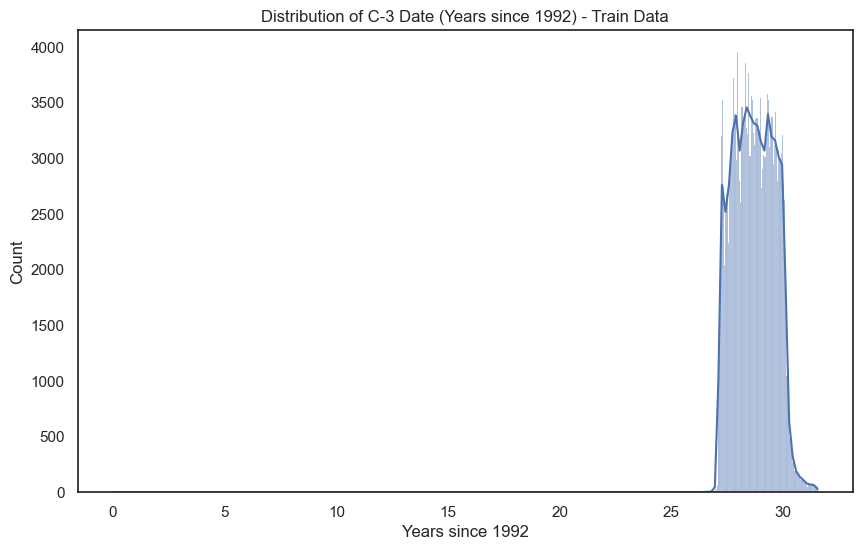

In [145]:
# Plot the distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_eda['C-3 Date Years'].dropna(), kde=True)
plt.title('Distribution of C-3 Date (Years since 1992) - Train Data')
plt.xlabel('Years since 1992')
plt.show()

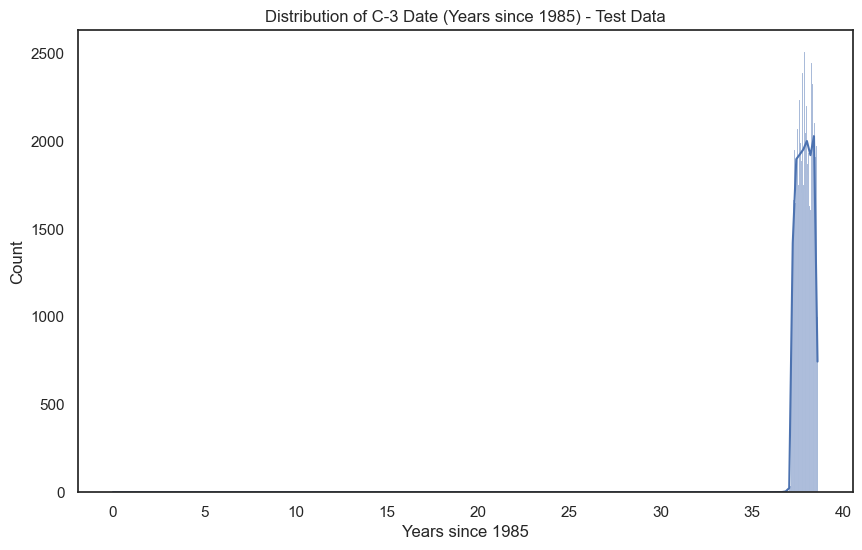

In [146]:
# Plot the distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_test_eda['C-3 Date Years'].dropna(), kde=True)
plt.title('Distribution of C-3 Date (Years since 1985) - Test Data')
plt.xlabel('Years since 1985')
plt.show()

C-3 Date is highly negatively skewed, with many low outliers. There are neary 300,000 missing values in test and train data. As this is nearly half of the dataset, we will assume these missing values indicate no C-3 date was held. We will transorm this feature later in preprocessing.

<hr>
<div class="alert alert-block alert-info" style="font-size:12px">
    
# Key Notes: C-3 Date

- Distribution: Similar distribution as C-2 Date: highly negatively skewed in both test and train data, with a roughly unfirom distribution in the more dense area of data.
- Outliers: Many extreme low outliers in both test and train data, causing our visualizations to be skewed.
- Missing Values: There are an incredibly high number of outliers in both datasets. 406,225 in the training data and 302,759 in the test. This constitutes over half of the rows in both datasets, so we will need to deal with this appropriately during preprocessing. Likely decision will be to transfrom the feature into binary.
    
</a>

<hr>
<div class="alert alert-block alert-info" style="font-size:14px" id="cnct">
    
# 1.2.10. Carrier Name and Carrier Type

    
</a>

In [150]:
df_eda['Carrier Name'].describe()

count                   574026
unique                    2046
top       STATE INSURANCE FUND
freq                    111144
Name: Carrier Name, dtype: object

In [151]:
df_test_eda['Carrier Name'].describe()

count                   387975
unique                    1598
top       STATE INSURANCE FUND
freq                     66189
Name: Carrier Name, dtype: object

In [152]:
df_eda['Carrier Name'].value_counts()

Carrier Name
STATE INSURANCE FUND            111144
POLICE, FIRE, SANITATION         21602
AMERICAN ZURICH INSURANCE CO     17540
CHARTER OAK FIRE INS CO          17176
INDEMNITY INS. OF N AMERICA      14366
                                 ...  
LOWES HOME CENTERS INC               1
WEST BEND MUTUAL INSURANCE           1
LIVINGSTON-STEUBEN-                  1
NEW YORK MUTUAL CASUALTY             1
HERMON-DEKALB CENTRAL                1
Name: count, Length: 2046, dtype: int64

In [153]:
df_test_eda['Carrier Name'].value_counts()

Carrier Name
STATE INSURANCE FUND             66189
AMERICAN ZURICH INSURANCE CO     13485
INDEMNITY INS. OF N AMERICA      12863
CHARTER OAK FIRE INS CO          11861
SAFETY NATIONAL CASUALTY CORP     9249
                                 ...  
E I DU PONT DE NEMOURS & CO.         1
UPSTATE NIAGARA COOPERATIVE          1
VICTOR CENTRAL SCHOOL DIST           1
PENN-YAN CENTRAL SCHOOL DIST         1
VILLAGE OF HOMER                     1
Name: count, Length: 1598, dtype: int64

In [154]:
df_eda['Carrier Name'].isna().sum()

19444

In [155]:
df_test_eda['Carrier Name'].isna().sum()

0

In [156]:
df_eda['Carrier Type'].describe()

count          574026
unique              8
top       1A. PRIVATE
freq           285368
Name: Carrier Type, dtype: object

In [157]:
df_test_eda['Carrier Type'].describe()

count          387975
unique              7
top       1A. PRIVATE
freq           201827
Name: Carrier Type, dtype: object

In [158]:
df_eda['Carrier Type'].value_counts()

Carrier Type
1A. PRIVATE                                    285368
3A. SELF PUBLIC                                121920
2A. SIF                                        111144
4A. SELF PRIVATE                                52788
UNKNOWN                                          1774
5D. SPECIAL FUND - UNKNOWN                       1023
5C. SPECIAL FUND - POI CARRIER WCB MENANDS          5
5A. SPECIAL FUND - CONS. COMM. (SECT. 25-A)         4
Name: count, dtype: int64

In [159]:
df_test_eda['Carrier Type'].value_counts()

Carrier Type
1A. PRIVATE                                    201827
3A. SELF PUBLIC                                 78948
2A. SIF                                         66189
4A. SELF PRIVATE                                38619
UNKNOWN                                          1642
5D. SPECIAL FUND - UNKNOWN                        748
5A. SPECIAL FUND - CONS. COMM. (SECT. 25-A)         2
Name: count, dtype: int64

In [160]:
df_eda['Carrier Type'].isna().sum()

19444

In [161]:
df_test_eda['Carrier Type'].isna().sum()

0

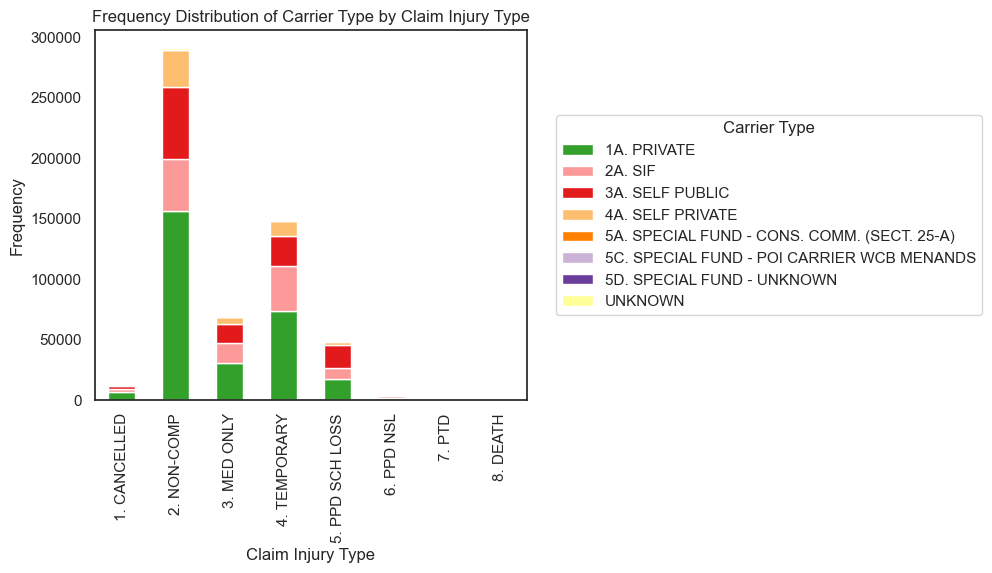

In [162]:
cat1 = 'Claim Injury Type'
cat2 = 'Carrier Type'

catpc_df = df_eda.groupby([cat1, cat2])[cat2].size().unstack()

ax = catpc_df.plot.bar(stacked=True,color=plt.cm.Paired(np.linspace(0.3, 0.9, catpc_df.shape[1])))

plt.title("Frequency Distribution of Carrier Type by Claim Injury Type")
plt.xlabel("Claim Injury Type")
plt.ylabel("Frequency")

# Aajusting the legend
plt.legend(title="Carrier Type", bbox_to_anchor=(1.05, 0.5), loc='center left')

# Ajusting size and layout
plt.subplots_adjust(right=0.8)

plt.show()

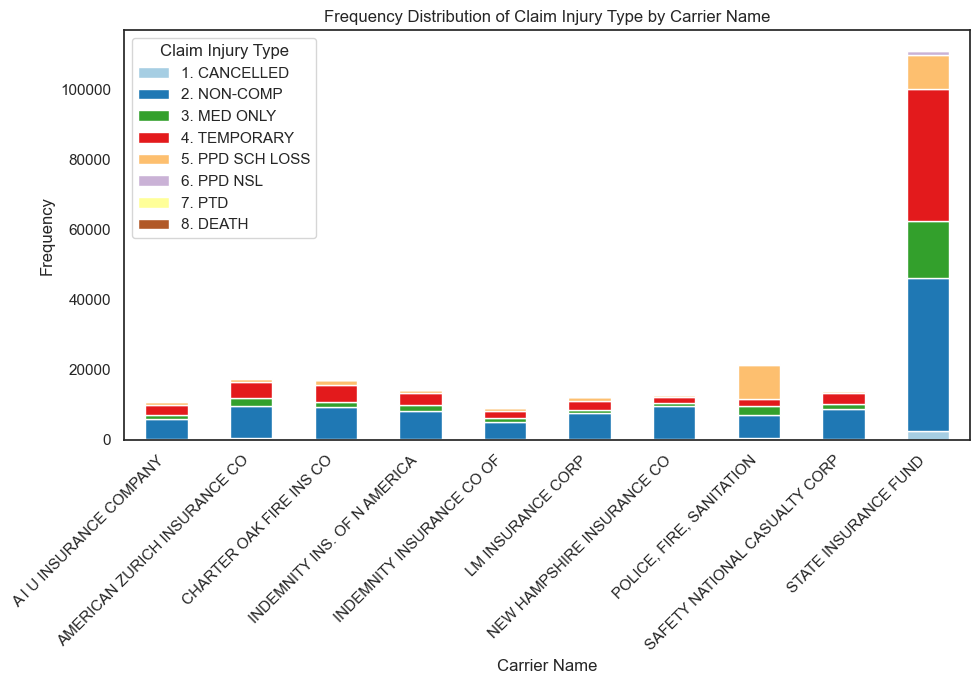

In [163]:
# Filtering the top 10 'Carrier Name'
top_carriers = df_eda['Carrier Name'].value_counts().head(10).index
subset = df_eda[df_eda['Carrier Name'].isin(top_carriers)]

catpc_df = subset.groupby(['Carrier Name', 'Claim Injury Type']).size().unstack()

ax = catpc_df.plot.bar(stacked=True, figsize=(10, 7), color=plt.cm.Paired(np.linspace(0, 1, catpc_df.shape[1])))


plt.title("Frequency Distribution of Claim Injury Type by Carrier Name")
plt.xlabel("Carrier Name")
plt.ylabel("Frequency")
plt.xticks(rotation=45, ha='right') 
plt.legend(title="Claim Injury Type")

plt.tight_layout()
plt.show()

<hr>
<div class="alert alert-block alert-info" style="font-size:12px">
    
# Key Notes: Carrier Type, Carrier Name

- Distribution: Categorical Feature with 2,000+ unique values in training data, 1500+ in test data. 
- Outliers: Many carrier names appear only a few times in the data. 5C. SPECIAL FUND - POI CARRIER WCB MENANDS, and 5A. SPECIAL FUND - CONS. COMM. (SECT. 25-A) appear only a handful of times in Carrier Type test and train data. 
- Missing Values: 19,444 missing values in the training data, none in the test data for both Carrier Name and Carrier Type. We suspect the group of outliers in the training data are part of the large segment of data that is missing and will be dropped entirely. 
- Other notes: Due to the high number of categories in Carrier Name, we will likely drop this feature and proceed with only Carrier Type.
    
</a>

<hr>
<div class="alert alert-block alert-info" style="font-size:14px" id="cit">
    
# 1.2.11. Claim Injury Type (Target)

    
</a>

In [166]:
df_eda['Claim Injury Type'].describe()

count          574026
unique              8
top       2. NON-COMP
freq           291078
Name: Claim Injury Type, dtype: object

In [167]:
df_eda['Claim Injury Type'].value_counts()

Claim Injury Type
2. NON-COMP        291078
4. TEMPORARY       148507
3. MED ONLY         68906
5. PPD SCH LOSS     48280
1. CANCELLED        12477
6. PPD NSL           4211
8. DEATH              470
7. PTD                 97
Name: count, dtype: int64

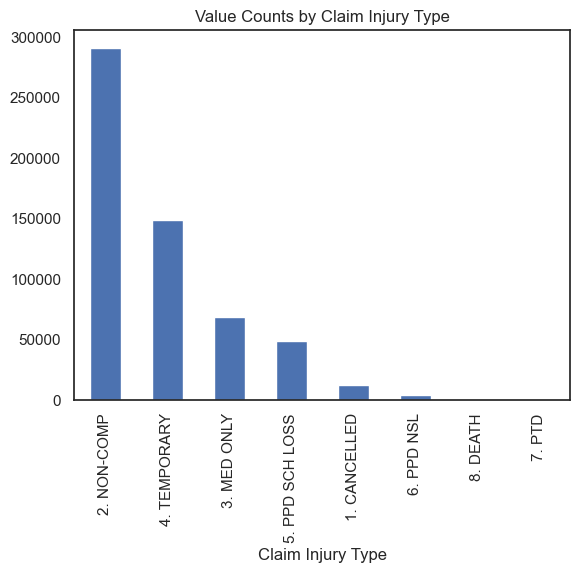

In [168]:
df_eda['Claim Injury Type'].value_counts().plot(kind='bar')
plt.title('Value Counts by Claim Injury Type')
plt.show()

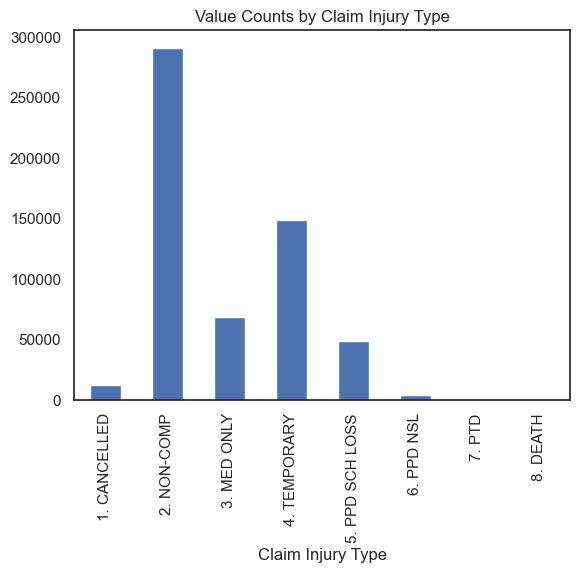

In [169]:
# Get value counts without sorting
counts = df_eda['Claim Injury Type'].value_counts()

# Convert index to strings and sort numerically
sorted_index = sorted(counts.index, key=lambda x: int(str(x).split(".")[0]))

# Reorder the counts using the sorted index
sorted_injury_counts = counts.reindex(sorted_index)

# Plot the sorted bar chart
sorted_injury_counts.plot(kind='bar')
plt.title('Value Counts by Claim Injury Type')
plt.show()


In [170]:
df_eda['Claim Injury Type'].isna().sum()

19444

<hr>
<div class="alert alert-block alert-info" style="font-size:12px">
    
# Key Notes: Claim Injury Type

- Distribution: Categorical Feature with 8 unique values. Most common Claim Injury Types are the moderate values of 2 through 5.
- Outliers: Claim Injury Types of 6, 7 and 8 appear very rarely in our data. This class imbalance may lead to difficulties for our model in predicting these injury types. 
- Missing Values: 19,444 missing values. These are likely part of the large section of missing values and will be dropped.

</a>

<hr>
<div class="alert alert-block alert-info" style="font-size:14px" id="coi">
    
# 1.2.12. County of Injury (Target)

    
</a>

In [173]:
df_eda['County of Injury'].value_counts()

County of Injury
SUFFOLK       60430
QUEENS        58333
KINGS         53207
NASSAU        43580
BRONX         39618
              ...  
WYOMING         760
MONTGOMERY      613
SCHOHARIE       558
YATES           396
HAMILTON        134
Name: count, Length: 63, dtype: int64

In [174]:
df_test_eda['County of Injury'].value_counts()

County of Injury
QUEENS        40358
SUFFOLK       36664
KINGS         35917
BRONX         28048
NASSAU        27606
              ...  
CORTLAND        531
MONTGOMERY      420
SCHOHARIE       420
YATES           254
HAMILTON         97
Name: count, Length: 63, dtype: int64

In [175]:
df_eda['County of Injury'].isna().sum()

19444

In [176]:
df_test_eda['County of Injury'].isna().sum()

0

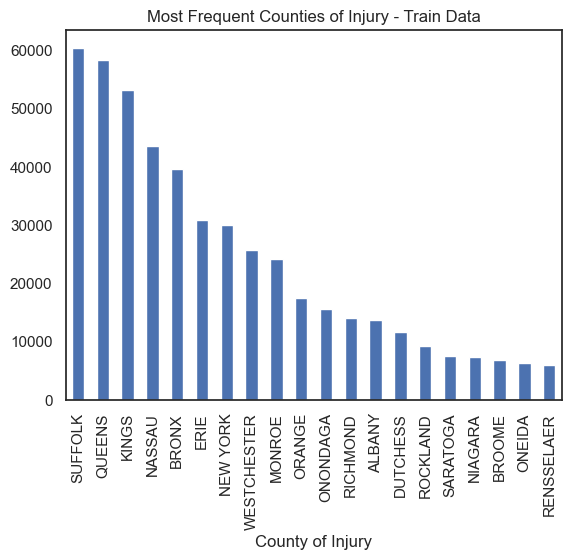

In [177]:
df_eda['County of Injury'].value_counts()[:20].plot(kind='bar')
plt.title('Most Frequent Counties of Injury - Train Data')
plt.show()

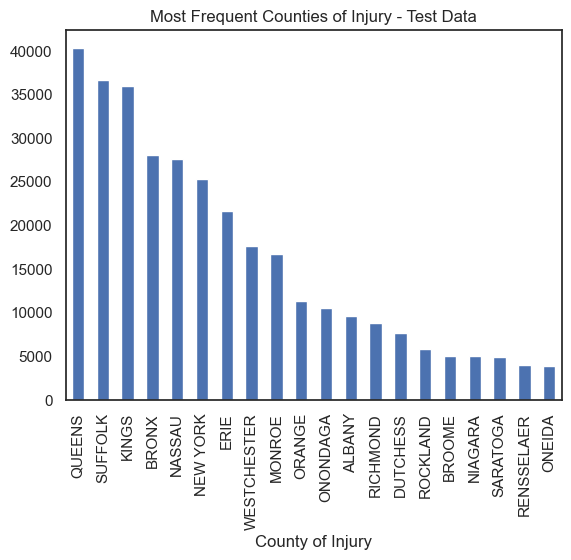

In [178]:
df_test_eda['County of Injury'].value_counts()[:20].plot(kind='bar')
plt.title('Most Frequent Counties of Injury - Test Data')
plt.show()

<hr>
<div class="alert alert-block alert-info" style="font-size:12px">
    
# Key Notes: County of Injury

- Distribution: Categorical Feature with 63 unique values in both test and train data.
- Outliers: Many counties have less than 1,000 values.
- Missing Values: 19,444 missing values in train data, none in test. The missing training values are likely part of the large section of missing values and will be dropped.
- Other Notes: The high number of unique values in this feature may present a challenge moving forward, especially for encoding. We may opt for the use of other regional features in our model, and drop County of Injury.

</a>

<hr>
<div class="alert alert-block alert-info" style="font-size:14px" id="covid">
    
# 1.2.13. COVID-19 Indicator

    
</a>

In [181]:
df_eda['COVID-19 Indicator'].describe()

count    574026.000000
mean          0.047944
std           0.213648
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: COVID-19 Indicator, dtype: float64

In [182]:
df_eda['COVID-19 Indicator'].value_counts()

COVID-19 Indicator
0.0    546505
1.0     27521
Name: count, dtype: int64

In [183]:
df_eda['COVID-19 Indicator'].isna().sum()

19444

In [184]:
df_test_eda['COVID-19 Indicator'].describe()

count     387975
unique         2
top            N
freq      385434
Name: COVID-19 Indicator, dtype: object

In [185]:
df_test_eda['COVID-19 Indicator'].value_counts()

COVID-19 Indicator
N    385434
Y      2541
Name: count, dtype: int64

In [186]:
df_test_eda['COVID-19 Indicator'].isna().sum()

0

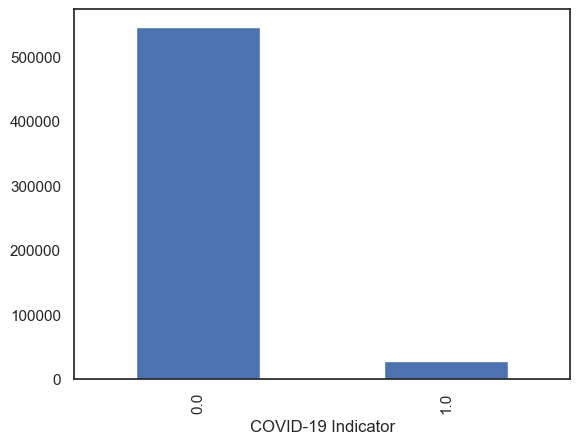

In [187]:
df_eda['COVID-19 Indicator'].value_counts().plot(kind='bar')
plt.show()

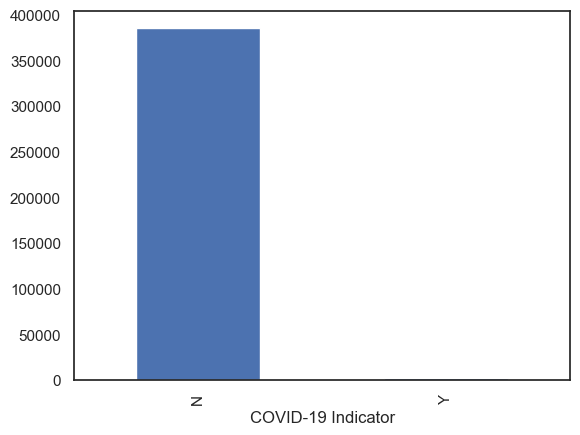

In [188]:
df_test_eda['COVID-19 Indicator'].value_counts().plot(kind='bar')
plt.show()

COVID-19 Indicator is a binary feature. In the train dataset, the feature is encoded with 1s and 0s, but in the test data, it is encoded as Ys and Ns. Although this is effectively the same in terms of interpetation, we will need to make sure the features are the same datatype during preprocessing.  
Significantly more claims were associated with COVID-19 in the train data than in the test data. This makes sense, as the train data was collected in the years around 2020 and 2021 (at the height of the pandemic), and the test data was collected in the years around 2022 and 2023.

<hr>
<div class="alert alert-block alert-info" style="font-size:12px">
    
# Key Notes: COVID-19 Indicator

- Distribution: COVID-19 Indicator is a binary feature. There is a class imbalance between Yes and No, with the vast majority of claims not associated with COVID-19. In the train dataset, the feature is encoded with 1s and 0s, but in the test data, it is encoded as Ys and Ns. Although this is effectively the same in terms of interpetation, we will need to make sure the features are the same datatype during preprocessing.
- Outliers: Not applicable for a binary feature, although most claims are NOT associated with COVID-19.
- Missing Values: 19,444 missing values in train data, none in test. The missing training values are likely part of the large section of missing values and will be dropped.
- Other Notes: Significantly more claims were associated with COVID-19 in the train data than in the test data. This makes sense, as the train data was collected in the years around 2020 and 2021 (at the height of the pandemic), and the test data was collected in the years around 2022 and 2023.

</a>

<hr>
<div class="alert alert-block alert-info" style="font-size:14px" id="dn">
    
# 1.2.14. District Name

    
</a>

In [192]:
df_eda['District Name'].describe()

count     574026
unique         8
top          NYC
freq      270779
Name: District Name, dtype: object

In [193]:
df_eda['District Name'].value_counts()

District Name
NYC           270779
ALBANY         86171
HAUPPAUGE      60536
BUFFALO        45605
SYRACUSE       44646
ROCHESTER      40449
BINGHAMTON     21864
STATEWIDE       3976
Name: count, dtype: int64

In [194]:
df_eda['District Name'].isna().sum()

19444

In [195]:
df_test_eda['District Name'].describe()

count     387975
unique         8
top          NYC
freq      187972
Name: District Name, dtype: object

In [196]:
df_test_eda['District Name'].value_counts()

District Name
NYC           187972
ALBANY         56500
HAUPPAUGE      36656
BUFFALO        31481
SYRACUSE       29537
ROCHESTER      28073
BINGHAMTON     15382
STATEWIDE       2374
Name: count, dtype: int64

In [197]:
df_test_eda['District Name'].isna().sum()

0

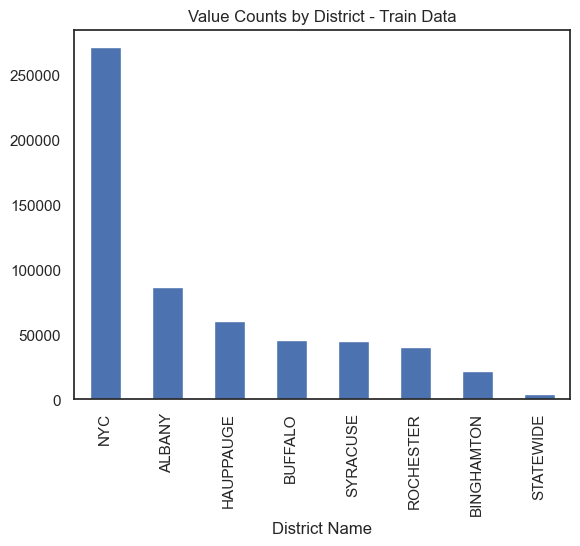

In [198]:
df_eda['District Name'].value_counts().plot(kind='bar')
plt.title('Value Counts by District - Train Data')
plt.show()

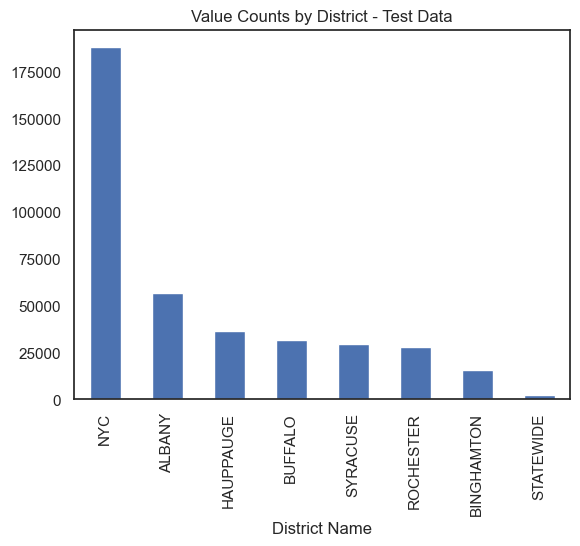

In [199]:
df_test_eda['District Name'].value_counts().plot(kind='bar')
plt.title('Value Counts by District - Test Data')
plt.show()

In [200]:
df_eda.groupby('County of Injury').agg(
    district_count=('District Name', 'nunique')
).sort_values(by='district_count', ascending=False)

district_count
County of Injury                
ALBANY                         8
UNKNOWN                        8
ONONDAGA                       8
KINGS                          8
NASSAU                         8
...                          ...
ORLEANS                        3
HAMILTON                       3
LEWIS                          3
YATES                          3
ESSEX                          1

[63 rows x 1 columns]

<hr>
<div class="alert alert-block alert-info" style="font-size:12px">
    
# Key Notes: District Name

- Distribution: Categorical feature with 9 unique values. One peak in the 'NYC' District.
- Outliers: Very few 'Statewide' claims in both test and train data.
- Missing Values: 19,444 missing values in train data, none in test. The missing training values are likely part of the large section of missing values and will be dropped.
- Other Notes: We find there is no relation between District name and County of Injury, people from all counties have injuries happening on all districts. This does not make much sense as we would imagine counties belong to one specific district.

</a>

<hr>
<div class="alert alert-block alert-info" style="font-size:14px" id="fhd">
    
# 1.2.15. First Hearing Date

    
</a>

In [203]:
df_eda['First Hearing Date'] = pd.to_datetime(df_eda['First Hearing Date'], errors='coerce')
df_test_eda['First Hearing Date'] = pd.to_datetime(df_test_eda['First Hearing Date'], errors='coerce')

In [204]:
df_eda['First Hearing Date'].describe()

count                           150798
mean     2022-03-19 05:07:38.218278400
min                2020-01-30 00:00:00
25%                2021-06-01 00:00:00
50%                2022-03-09 00:00:00
75%                2023-01-11 00:00:00
max                2024-06-07 00:00:00
Name: First Hearing Date, dtype: object

In [205]:
df_eda['First Hearing Date'].value_counts()

First Hearing Date
2022-04-15    440
2022-01-20    418
2022-02-15    402
2020-12-21    382
2021-05-25    381
             ... 
2020-09-17      2
2020-05-20      2
2020-04-15      1
2020-02-04      1
2020-01-31      1
Name: count, Length: 1094, dtype: int64

In [206]:
df_eda['First Hearing Date'].isna().sum()

442672

In [207]:
df_eda['First Hearing Date'].isna().mean()*100

74.59045950090147

In [208]:
df_test_eda['First Hearing Date'].describe()

count                            43028
mean     2023-12-04 21:26:33.343869440
min                2023-02-03 00:00:00
25%                2023-09-07 00:00:00
50%                2023-12-14 00:00:00
75%                2024-03-15 00:00:00
max                2024-06-07 00:00:00
Name: First Hearing Date, dtype: object

In [209]:
df_test_eda['First Hearing Date'].value_counts()

First Hearing Date
2024-02-06    329
2024-01-09    305
2024-03-29    241
2024-06-03    240
2024-05-16    237
             ... 
2023-02-06      3
2023-02-08      1
2023-02-03      1
2023-03-22      1
2023-04-26      1
Name: count, Length: 338, dtype: int64

In [210]:
df_test_eda['First Hearing Date'].isna().sum()

344947

In [211]:
df_test_eda['First Hearing Date'].isna().mean()*100

88.90959469037954

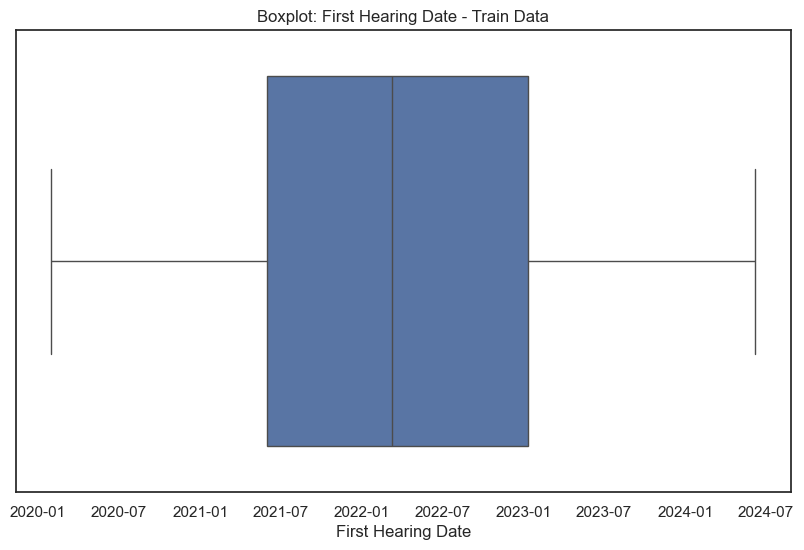

In [212]:
# Boxplot to see outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_eda['First Hearing Date'])
plt.title('Boxplot: First Hearing Date - Train Data')
plt.xlabel('First Hearing Date')
plt.show()

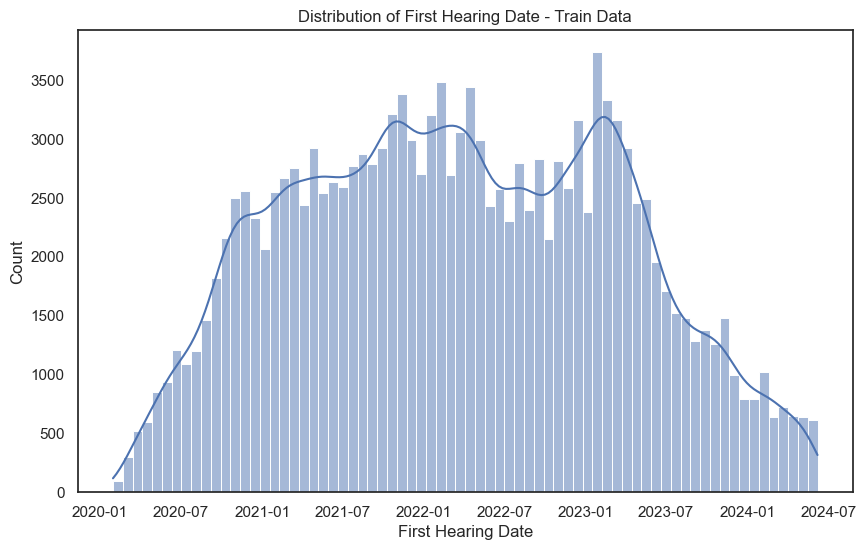

In [213]:
# Plot the distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_eda['First Hearing Date'].dropna(), kde=True)
plt.title('Distribution of First Hearing Date - Train Data')
plt.xlabel('First Hearing Date')
plt.show()

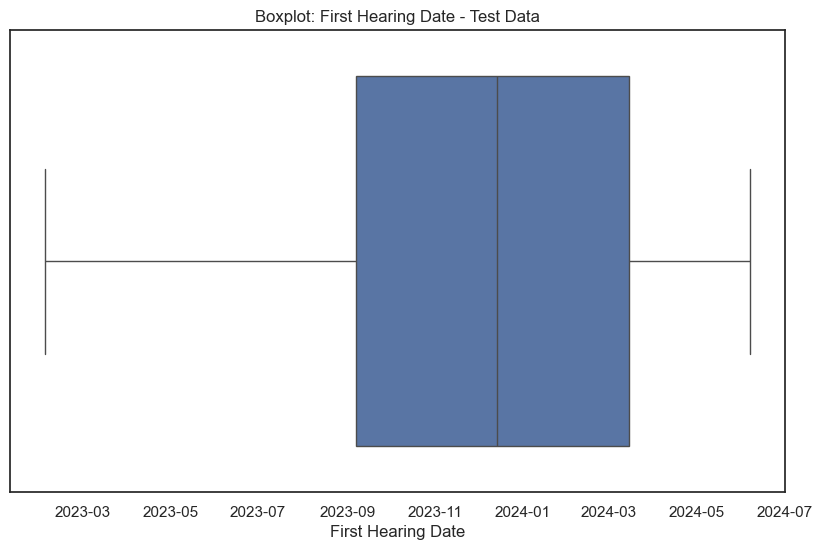

In [214]:
# Boxplot to see outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_test_eda['First Hearing Date'])
plt.title('Boxplot: First Hearing Date - Test Data')
plt.xlabel('First Hearing Date')
plt.show()

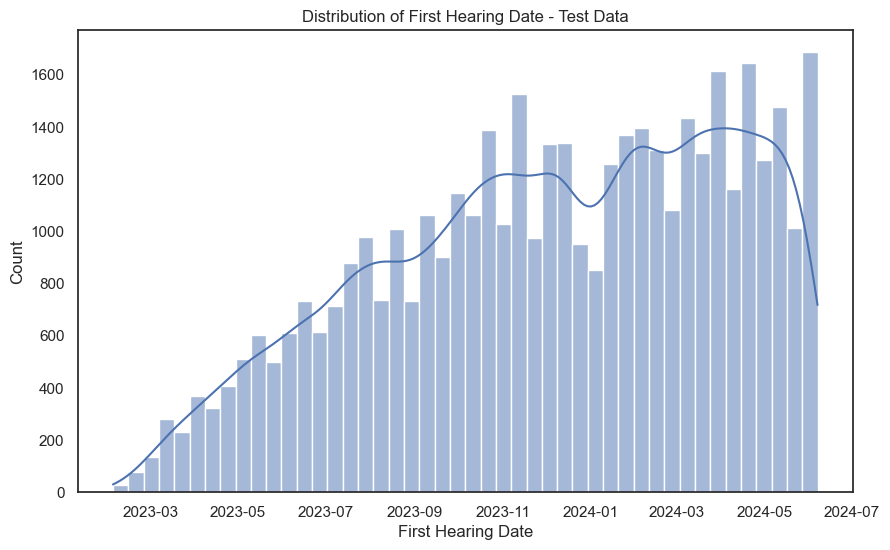

In [215]:
# Plot the distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_test_eda['First Hearing Date'].dropna(), kde=True)
plt.title('Distribution of First Hearing Date - Test Data')
plt.xlabel('First Hearing Date')
plt.show()

In [216]:
df_eda['First Hearing Date'] = pd.to_datetime(df_eda['First Hearing Date'])

df_eda['First Hearing Year'] = df_eda['First Hearing Date'].dt.year

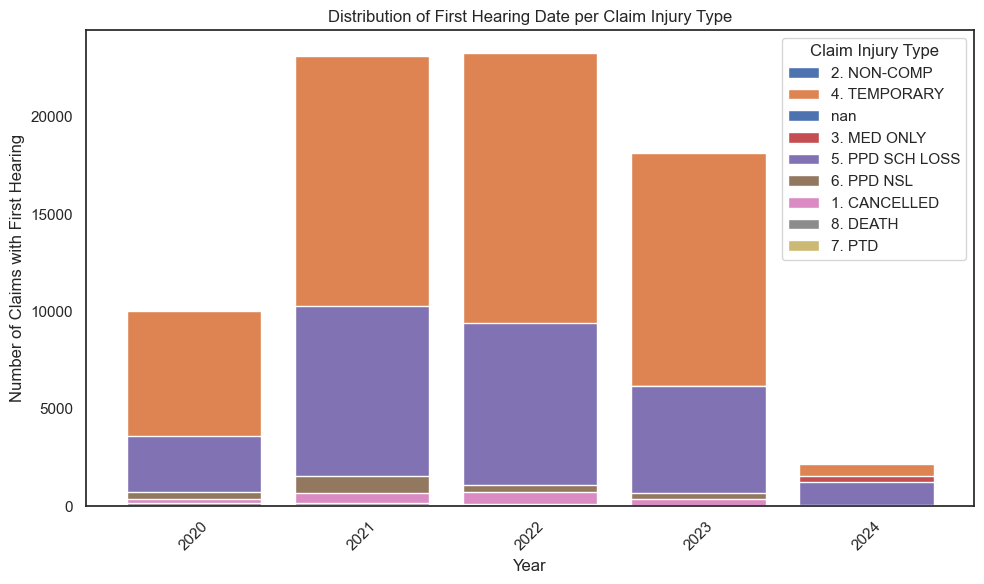

In [217]:
plt.figure(figsize=(10, 6))
for injury_type in df_eda['Claim Injury Type'].unique():
    subset = df_eda[df_eda['Claim Injury Type'] == injury_type]
    counts = subset.groupby('First Hearing Year').size().reset_index(name='count')  # Reset index
    plt.bar(counts['First Hearing Year'], counts['count'], label=f'{injury_type}')  # Use 'Year' as x and 'count' as y

plt.title('Distribution of First Hearing Date per Claim Injury Type')
plt.xlabel('Year')
plt.ylabel('Number of Claims with First Hearing')
plt.legend(title='Claim Injury Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

First Hearing Date is a categorical feature with a very high number of missing values - 73% in train data and 88% in test. We make the assumptions that a blank date means the claim has not yet had a hearing. Meaning from the all the processes in the training data, there are still 74.59% claims without a ahearing held.To deal with this, we will turn this variable into a binary one, when we do the future engeneering.

<hr>
<div class="alert alert-block alert-info" style="font-size:12px">
    
# Key Notes: First Hearing Date

- Distribution: Training data has a relatively normal distribution, with dates ranging from 2020 to 2024. Test data follows a different distrubution, more negatively skewed, peaking around the end of the dataset (2024). 
- Outliers: No outliers in either test or train data. 
- Missing Values: Very high number of missing values - 73% in train data and 88% in test. A blank date means the claim has not yet had a hearing. Because there are so many claims without a First Hearing Date, we will turn this feature into a binary one during preprocessing.

</a>

<hr>
<div class="alert alert-block alert-info" style="font-size:14px" id="gender">
    
# 1.2.16. Gender

    
</a>

In [221]:
df_eda['Gender'].isna().sum()

19444

In [222]:
df_test_eda['Gender'].isna().sum()

0

In [223]:
df_eda['Gender'].value_counts()

Gender
M    335218
F    234051
U      4711
X        46
Name: count, dtype: int64

In [224]:
df_test_eda['Gender'].value_counts()

Gender
M    215343
F    167019
U      5340
X       273
Name: count, dtype: int64

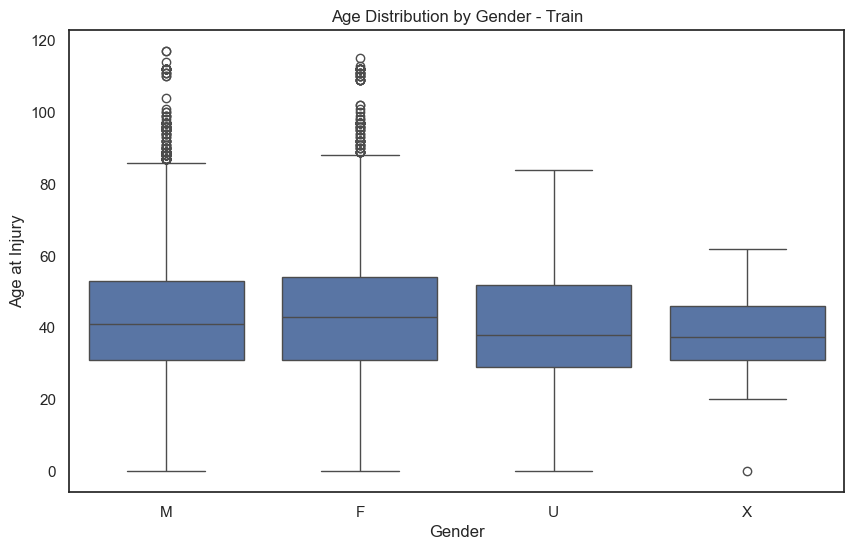

In [225]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_eda, x='Gender', y='Age at Injury')
plt.title('Age Distribution by Gender - Train')
plt.show()

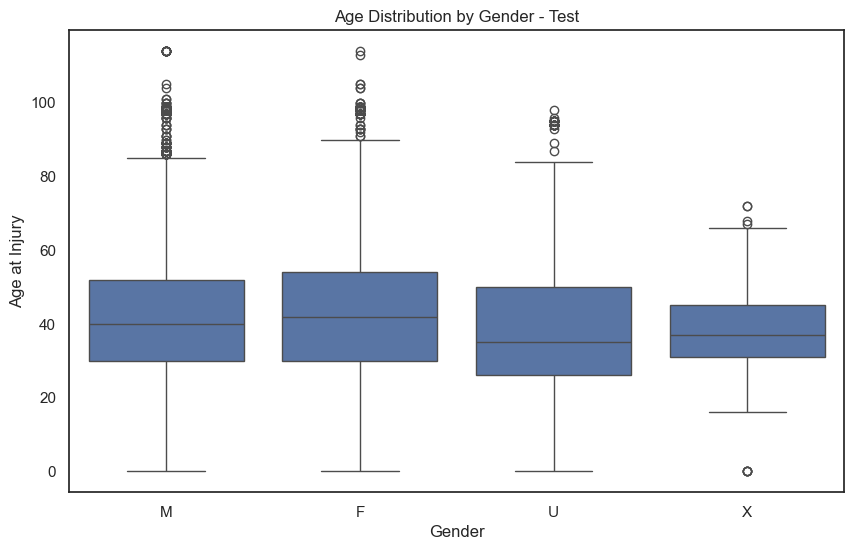

In [226]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_test_eda, x='Gender', y='Age at Injury')
plt.title('Age Distribution by Gender - Test')
plt.show()

Gender is categorical feature with no missing values in either test or train. 

<hr>
<div class="alert alert-block alert-info" style="font-size:12px">
    
# Key Notes: Gender

- Distribution: Categorical feature with four unique values. 
- Outliers: 'Unknown' and 'X' both have very few rows associated in test and train data. 
- Missing Values: No missing values in either test or train data.

</a>

<hr>
<div class="alert alert-block alert-info" style="font-size:14px" id="ime4">
    
# 1.2.17. IME-4 Count

    
</a>

In [230]:
df_eda['IME-4 Count'].describe()

count    132803.000000
mean          3.207337
std           2.832303
min           1.000000
25%           1.000000
50%           2.000000
75%           4.000000
max          73.000000
Name: IME-4 Count, dtype: float64

In [231]:
df_test_eda['IME-4 Count'].describe()

count    35249.000000
mean         2.118131
std          1.465406
min          1.000000
25%          1.000000
50%          2.000000
75%          2.000000
max         18.000000
Name: IME-4 Count, dtype: float64

In [232]:
df_eda['IME-4 Count'].isna().sum()

460667

In [233]:
df_eda['IME-4 Count'].isna().mean()*100

77.62262624901007

In [234]:
df_test_eda['IME-4 Count'].isna().sum()

352726

In [235]:
df_test_eda['IME-4 Count'].isna().mean()*100

90.91462078742187

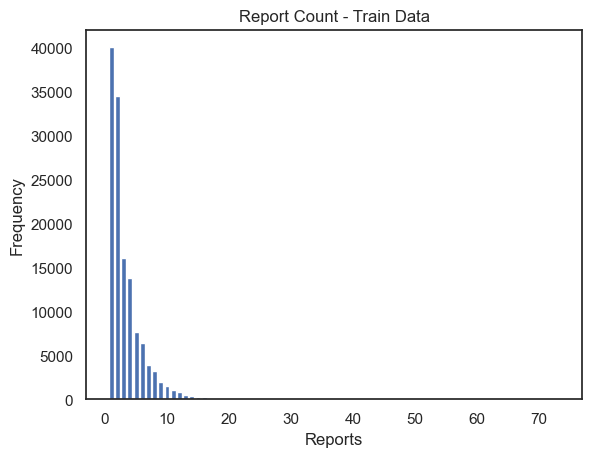

In [236]:
# barplot for IME-4 Count
sns.set_theme(style="white")
fig, ax = plt.subplots()
count = df_eda['IME-4 Count'].dropna().value_counts()
ax.bar(count.index, count.values)
plt.title('Report Count - Train Data')
plt.xlabel('Reports')
plt.ylabel('Frequency')
plt.show()

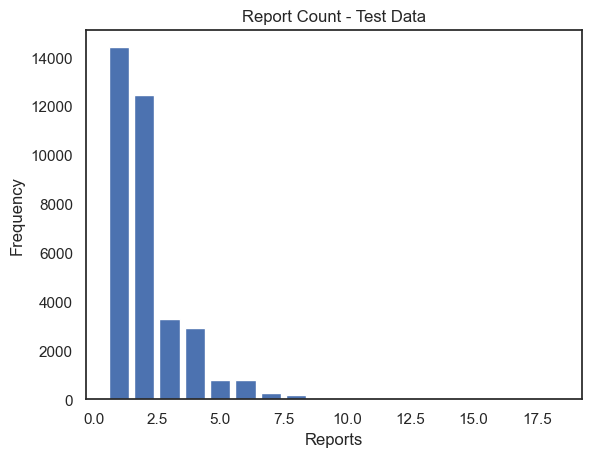

In [237]:
# barplot for IME-4 Count
sns.set_theme(style="white")
fig, ax = plt.subplots()
count = df_test_eda['IME-4 Count'].dropna().value_counts()
ax.bar(count.index, count.values)
plt.title('Report Count - Test Data')
plt.xlabel('Reports')
plt.ylabel('Frequency')
plt.show()

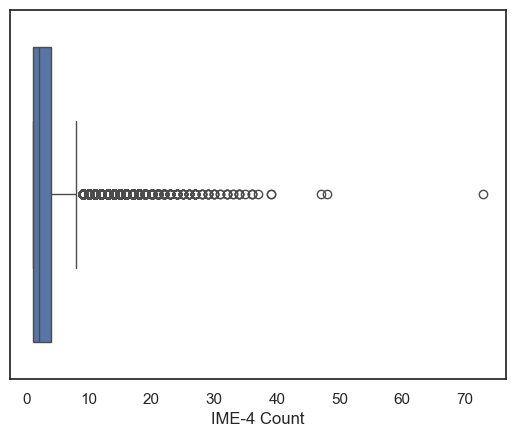

In [238]:
sns.boxplot(x=df_eda['IME-4 Count'].dropna())

plt.show()

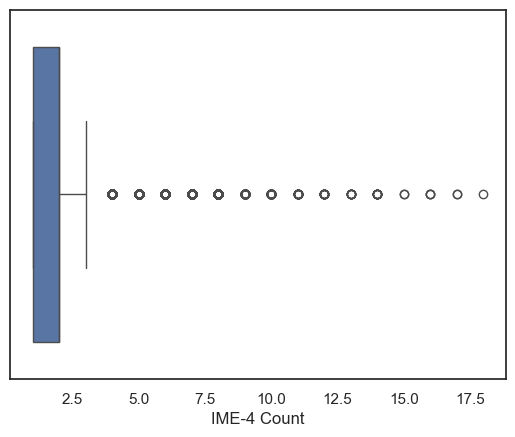

In [239]:
sns.boxplot(x=df_test_eda['IME-4 Count'].dropna())

plt.show()

<hr>
<div class="alert alert-block alert-info" style="font-size:12px">
    
# Key Notes: IME-4 Count

- Distribution: Highly positively skewed in test and train. 
- Outliers: High number of positive outliers, especially in training data. We presume there may a handful of high-profile cases that involved many external reviews.
- Missing Values: Incredibly high presence of missing values - roughly 75% (460,667 values) in train data and 90% (352,726 values) in test. Logically, we can presume that the N/A's are when there are no IME-4 Forms in the claim. This theory is also reinforced because there are no 0's in the dataset.

</a>

<hr>
<div class="alert alert-block alert-info" style="font-size:14px" id="icodedes">
    
# 1.2.18. Industry Code and Description

    
</a>

In [242]:
df_eda['Industry Code'].describe()

count    564068.000000
mean         58.645305
std          19.644175
min          11.000000
25%          45.000000
50%          61.000000
75%          71.000000
max          92.000000
Name: Industry Code, dtype: float64

In [243]:
df_eda['Industry Code Description'].describe()

count                                564068
unique                                   20
top       HEALTH CARE AND SOCIAL ASSISTANCE
freq                                 114339
Name: Industry Code Description, dtype: object

In [244]:
df_test_eda['Industry Code'].describe()

count    380239.000000
mean         58.653581
std          18.710501
min          11.000000
25%          45.000000
50%          61.000000
75%          71.000000
max          92.000000
Name: Industry Code, dtype: float64

In [245]:
df_test_eda['Industry Code Description'].describe()

count                                380239
unique                                   20
top       HEALTH CARE AND SOCIAL ASSISTANCE
freq                                  72207
Name: Industry Code Description, dtype: object

In [246]:
df_eda['Industry Code Description'].value_counts()

Industry Code Description
HEALTH CARE AND SOCIAL ASSISTANCE                               114339
PUBLIC ADMINISTRATION                                            92240
RETAIL TRADE                                                     61638
TRANSPORTATION AND WAREHOUSING                                   54023
EDUCATIONAL SERVICES                                             44393
MANUFACTURING                                                    38150
CONSTRUCTION                                                     30903
ACCOMMODATION AND FOOD SERVICES                                  26456
ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMENT AND REMEDIAT     21027
WHOLESALE TRADE                                                  15236
OTHER SERVICES (EXCEPT PUBLIC ADMINISTRATION)                    13149
ARTS, ENTERTAINMENT, AND RECREATION                               9967
PROFESSIONAL, SCIENTIFIC, AND TECHNICAL SERVICES                  9770
INFORMATION                                        

In [247]:
df_test_eda['Industry Code Description'].value_counts()

Industry Code Description
HEALTH CARE AND SOCIAL ASSISTANCE                               72207
PUBLIC ADMINISTRATION                                           52792
RETAIL TRADE                                                    42128
EDUCATIONAL SERVICES                                            39557
TRANSPORTATION AND WAREHOUSING                                  33078
MANUFACTURING                                                   24996
ACCOMMODATION AND FOOD SERVICES                                 24122
CONSTRUCTION                                                    18115
ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMENT AND REMEDIAT    13729
ARTS, ENTERTAINMENT, AND RECREATION                             10253
WHOLESALE TRADE                                                 10135
OTHER SERVICES (EXCEPT PUBLIC ADMINISTRATION)                    9736
PROFESSIONAL, SCIENTIFIC, AND TECHNICAL SERVICES                 7533
INFORMATION                                                     

In [248]:
df_eda['Industry Code Description'].isna().sum()

29402

In [249]:
df_eda['Industry Code'].isna().sum()

29402

In [250]:
df_test_eda['Industry Code Description'].isna().sum()

7736

In [251]:
df_test_eda['Industry Code'].isna().sum()

7736

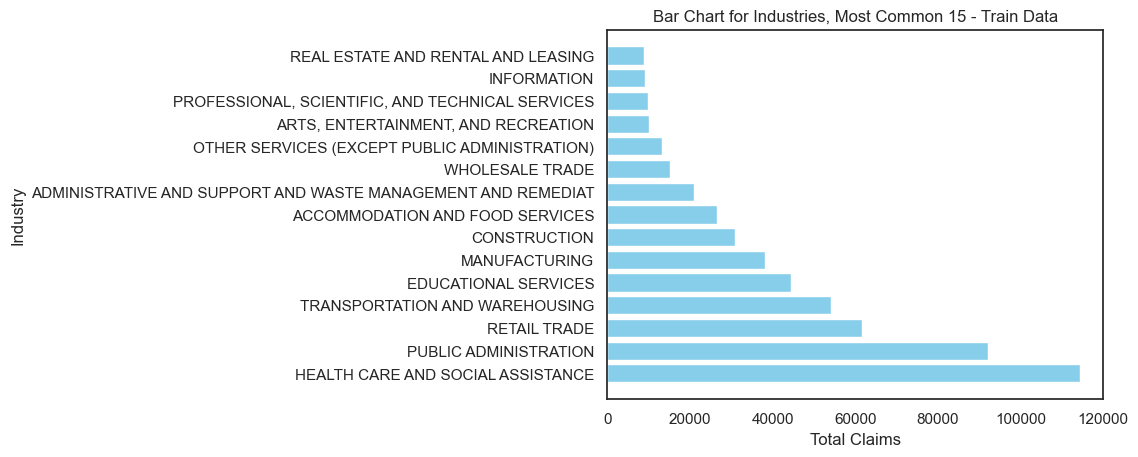

In [252]:
cause_counts = df_eda['Industry Code Description'].value_counts()
top_injury_causes = cause_counts.nlargest(15)

plt.barh(top_injury_causes.index, top_injury_causes.values, color = 'skyblue')

plt.title('Bar Chart for Industries, Most Common 15 - Train Data')
plt.xlabel('Total Claims')
plt.ylabel('Industry')

plt.show()

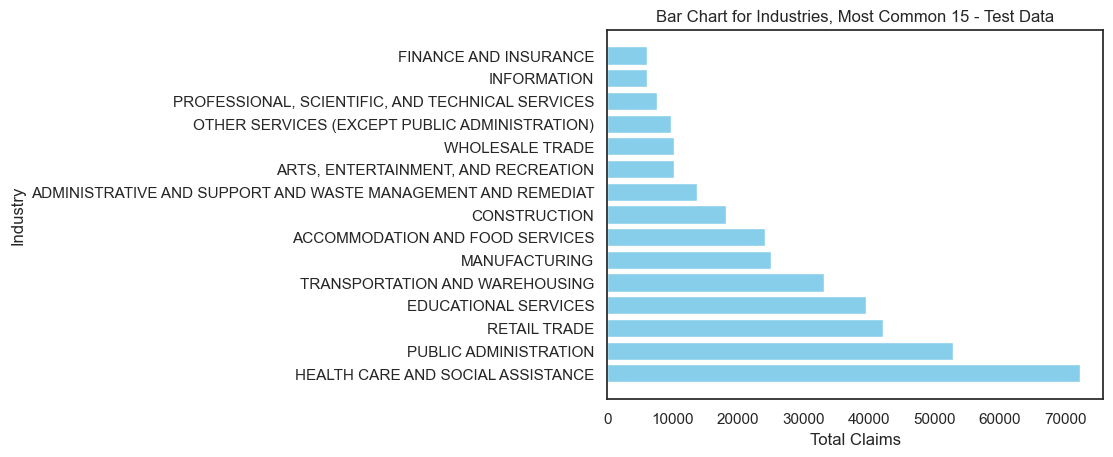

In [253]:
cause_counts_test = df_test_eda['Industry Code Description'].value_counts()
top_injury_causes_test = cause_counts_test.nlargest(15)

plt.barh(top_injury_causes_test.index, top_injury_causes_test.values, color = 'skyblue')

plt.title('Bar Chart for Industries, Most Common 15 - Test Data')
plt.xlabel('Total Claims')
plt.ylabel('Industry')

plt.show()

<hr>
<div class="alert alert-block alert-info" style="font-size:12px">
    
# Key Notes: Industry Code and Industry Description

- Distribution: Categorical features, with one code corresponding to one description. There are 20 unique code-description pairs, with one most common: Health Care and Social Assitance
- Outliers: MINING and MANAGEMENT OF COMPANIES AND ENTERPRISES both have low counts compared to other categories. 
- Missing Values: 29,402 missing values in training data, 7,736 in test. Missing values in Industry Code correspond to missing values in Industry Description.

</a>

<hr>
<div class="alert alert-block alert-info" style="font-size:14px" id="mfr">
    
# 1.2.19. Medical Fee Region

    
</a>

In [256]:
df_eda['Medical Fee Region'].describe()

count     574026
unique         5
top           IV
freq      265981
Name: Medical Fee Region, dtype: object

In [257]:
df_eda['Medical Fee Region'].value_counts()

Medical Fee Region
IV     265981
I      135885
II      85033
III     53654
UK      33473
Name: count, dtype: int64

In [258]:
df_eda['Medical Fee Region'].isna().sum()

19444

In [259]:
df_test_eda['Medical Fee Region'].describe()

count     387975
unique         5
top           IV
freq      182276
Name: Medical Fee Region, dtype: object

In [260]:
df_test_eda['Medical Fee Region'].value_counts()

Medical Fee Region
IV     182276
I       91300
II      58743
III     34679
UK      20977
Name: count, dtype: int64

In [261]:
df_test_eda['Medical Fee Region'].isna().sum()

0

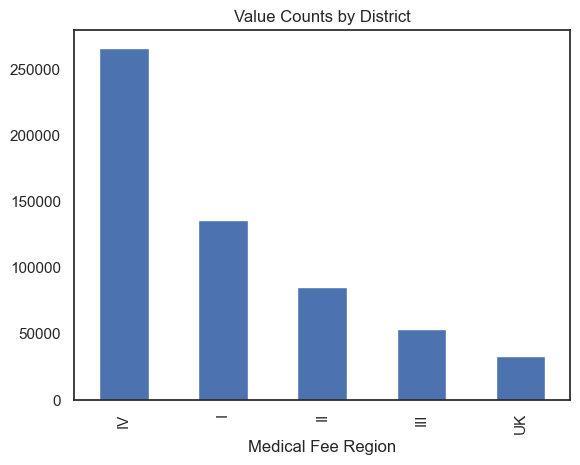

In [262]:
df_eda['Medical Fee Region'].value_counts().plot(kind='bar')
plt.title('Value Counts by District')
plt.show()

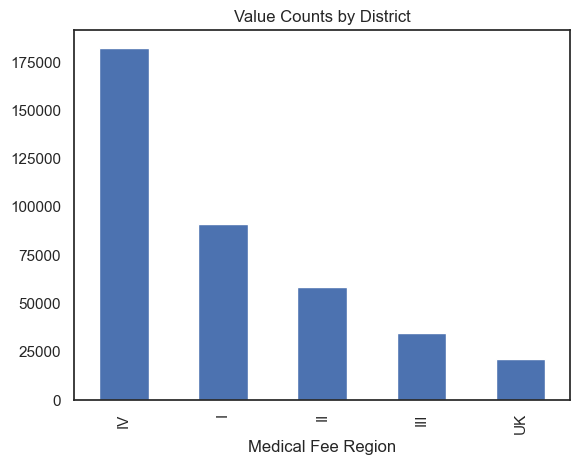

In [263]:
df_test_eda['Medical Fee Region'].value_counts().plot(kind='bar')
plt.title('Value Counts by District')
plt.show()

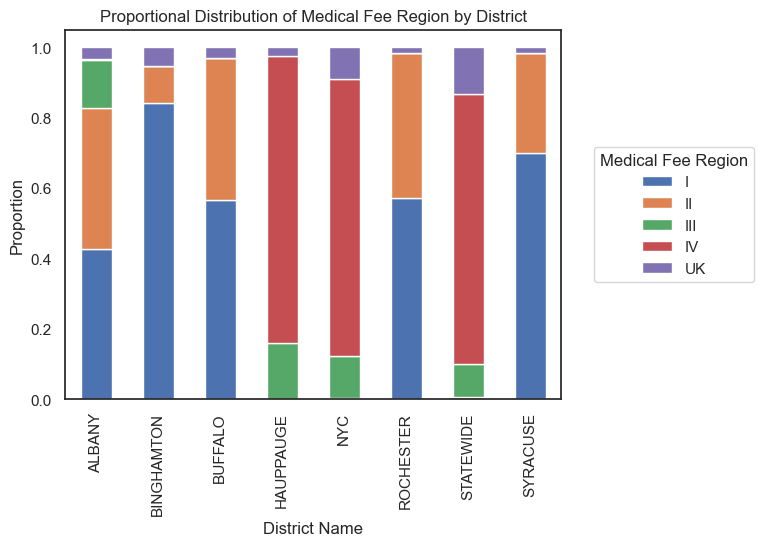

In [264]:
catpc = df_eda.groupby(['District Name', 'Medical Fee Region'])['Medical Fee Region'].size().unstack().apply(lambda x: x / x.sum(), axis=1)
ax = catpc.plot.bar(stacked=True)
plt.title("Proportional Distribution of Medical Fee Region by District")
plt.xlabel("District Name")
plt.ylabel("Proportion")
plt.legend(title="Medical Fee Region", bbox_to_anchor=(1.05, 0.5), loc='center left')
plt.show()

#By analyzing the distribution of Medical fee region by District, we can get an Idea of what is each Region, Geographically

Medical Fee Region is a categorical feature with no missing values in the train or test data. 

<hr>
<div class="alert alert-block alert-info" style="font-size:12px">
    
# Key Notes: Medical Fee Region

- Distribution: Categorical feature with 5 unique values in test and train data. Distribution has a mode of Region IV.
- Outliers: Each category is represented in both datasets.
- Missing Values: 19,444 missing values in train data, none in test. The missing training values are likely part of the large section of missing values and will be dropped. We also have a category called 'UK' which we assumed to be unknown region. 

</a>

<hr>
<div class="alert alert-block alert-info" style="font-size:14px" id="oiics">
    
# 1.2.20. OIICS Nature of Injury Description

    
</a>

In [268]:
df_eda['OIICS Nature of Injury Description'].value_counts()


Series([], Name: count, dtype: int64)

In [269]:
df_test_eda['OIICS Nature of Injury Description'].value_counts()

Series([], Name: count, dtype: int64)

This feature has no value since has all values as NAs. We will drop this feature.

<hr>
<div class="alert alert-block alert-info" style="font-size:12px">
    
# Key Notes: OIICS Nature of Injury Description 

- This feature is entirely composed of NA values. We will drop this feature.

</a>

<hr>
<div class="alert alert-block alert-info" style="font-size:14px" id="wcio">
    
# 1.2.21. WCIO Features

    
</a>

In [273]:
#initial examiination of WCIO features
df_eda[['WCIO Cause of Injury Code',
        'WCIO Cause of Injury Description',
        'WCIO Nature of Injury Code',
        'WCIO Nature of Injury Description', \
        'WCIO Part Of Body Code', 'WCIO Part Of Body Description']].head(10)


WCIO Cause of Injury Code WCIO Cause of Injury Description  \
Claim Identifier                                                               
5393875                                27.0     FROM LIQUID OR GREASE SPILLS   
5393091                                97.0                REPETITIVE MOTION   
5393889                                79.0   OBJECT BEING LIFTED OR HANDLED   
957648180                               NaN                              NaN   
5393887                                16.0  HAND TOOL, UTENSIL; NOT POWERED   
5393863                                31.0          FALL, SLIP OR TRIP, NOC   
5393848                                19.0       CUT, PUNCTURE, SCRAPE, NOC   
5394182                                99.0       OTHER - MISCELLANEOUS, NOC   
5393881                                99.0       OTHER - MISCELLANEOUS, NOC   
5394084                                81.0           STRUCK OR INJURED, NOC   

                  WCIO Nature of Injury Code  \
Claim Identifier                               
5393875                                 10.0   
5393091                                 49.0   
5393889                                  7.0   
957648180                                NaN   
5393887                                 43.0   
5393863                                 10.0   
5393848                                 40.0   
5394182                                 71.0   
5393881                                 59.0   
5394084                                 59.0   

                           WCIO Nature of Injury Description  \
Claim Identifier                                               
5393875                                            CONTUSION   
5393091                                       SPRAIN OR TEAR   
5393889                                           CONCUSSION   
957648180                                                NaN   
5393887                                             PUNCTURE   
5393863                                            CONTUSION   
5393848                                           LACERATION   
5394182           ALL OTHER OCCUPATIONAL DISEASE INJURY, NOC   
5393881                     ALL OTHER SPECIFIC INJURIES, NOC   
5394084                     ALL OTHER SPECIFIC INJURIES, NOC   

                  WCIO Part Of Body Code WCIO Part Of Body Description  
Claim Identifier                                                        
5393875                             62.0                      BUTTOCKS  
5393091                             38.0                   SHOULDER(S)  
5393889                             10.0          MULTIPLE HEAD INJURY  
957648180                            NaN                           NaN  
5393887                             36.0                     FINGER(S)  
5393863                             38.0                   SHOULDER(S)  
5393848                             36.0                     FINGER(S)  
5394182                             38.0                   SHOULDER(S)  
5393881                             60.0                         LUNGS  
5394084                             14.0                        EYE(S)

<hr>
<div class="alert alert-block alert-info" style="font-size:14px" id="wcio_c">
    
# 1.2.21.1. WCIO Cause of Injury Code and Description

    
</a>

In [275]:
#looking first at descriptions because the codes mean nothing to us yet
df_eda['WCIO Cause of Injury Description'].value_counts()

WCIO Cause of Injury Description
LIFTING                                   46610
FELLOW WORKER, PATIENT OR OTHER PERSON    37153
STRAIN OR INJURY BY, NOC                  33192
FALL, SLIP OR TRIP, NOC                   31733
ON SAME LEVEL                             29364
                                          ...  
MOLD                                         55
ABNORMAL AIR PRESSURE                        51
CRASH OF WATER VEHICLE                       45
RADIATION                                    34
CRASH OF AIRPLANE                            12
Name: count, Length: 74, dtype: int64

In [276]:
df_test_eda['WCIO Cause of Injury Description'].value_counts()

WCIO Cause of Injury Description
FELLOW WORKER, PATIENT OR OTHER PERSON    33293
LIFTING                                   28020
STRAIN OR INJURY BY, NOC                  22144
FALL, SLIP OR TRIP, NOC                   22123
OBJECT BEING LIFTED OR HANDLED            20495
                                          ...  
TERRORISM                                    52
ABNORMAL AIR PRESSURE                        47
CRASH OF WATER VEHICLE                       32
RADIATION                                    11
CRASH OF AIRPLANE                             6
Name: count, Length: 74, dtype: int64

In [277]:
print(df_eda['WCIO Cause of Injury Description'].isna().sum())
print(df_eda['WCIO Cause of Injury Code'].isna().sum())
#there are lots of missing values

35084
35084


In [278]:
print(df_test_eda['WCIO Cause of Injury Description'].isna().sum())
print(df_test_eda['WCIO Cause of Injury Code'].isna().sum())

10348
10348


In [279]:
#thinking about assigning missing values to a code 0 with description 'Unknown'
#so checking to make sure there is not already an injury cause with code 0
df_eda['WCIO Cause of Injury Code'].min()

1.0

In [280]:
df_test_eda['WCIO Cause of Injury Code'].min()

1.0

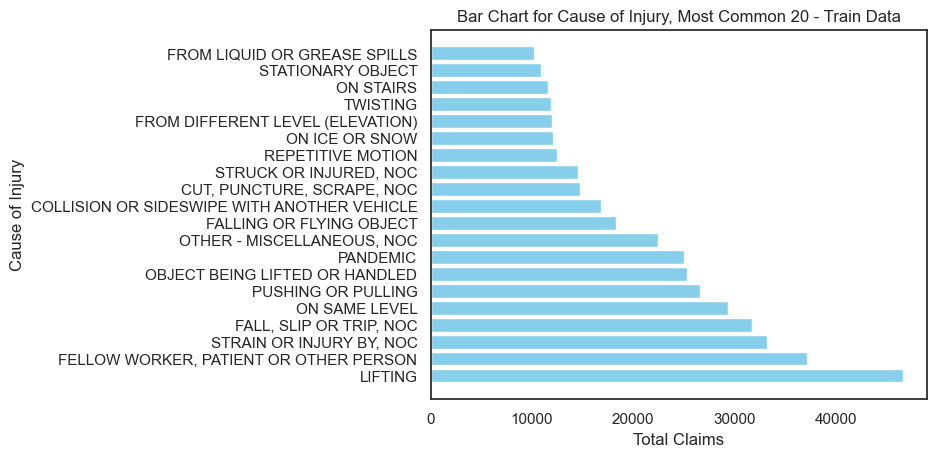

In [281]:
#bar graph for cause of injury data - showing only top 20 causes so its readable
cause_counts = df_eda['WCIO Cause of Injury Description'].value_counts()
top_injury_causes = cause_counts.nlargest(20)

plt.barh(top_injury_causes.index, top_injury_causes.values, color = 'skyblue')

plt.title('Bar Chart for Cause of Injury, Most Common 20 - Train Data')
plt.xlabel('Total Claims')
plt.ylabel('Cause of Injury')

plt.show()

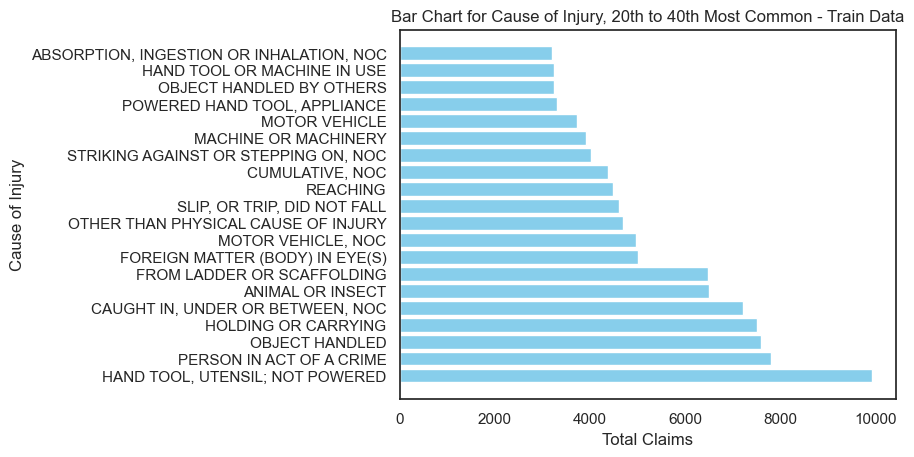

In [282]:
#boxplot for cause of injury data - next most common 20
mid_injury_causes = cause_counts.iloc[20:40]

plt.barh(mid_injury_causes.index, mid_injury_causes.values, color = 'skyblue')

plt.title('Bar Chart for Cause of Injury, 20th to 40th Most Common - Train Data')
plt.xlabel('Total Claims')
plt.ylabel('Cause of Injury')

plt.show()

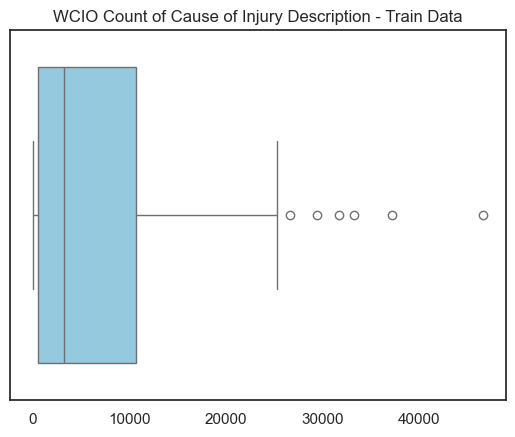

In [283]:
# we can use the value count series created above to look at outliers
# injury description boxplot
sns.boxplot(x=cause_counts.values, color = 'skyblue')

plt.title('WCIO Count of Cause of Injury Description - Train Data')
plt.show()

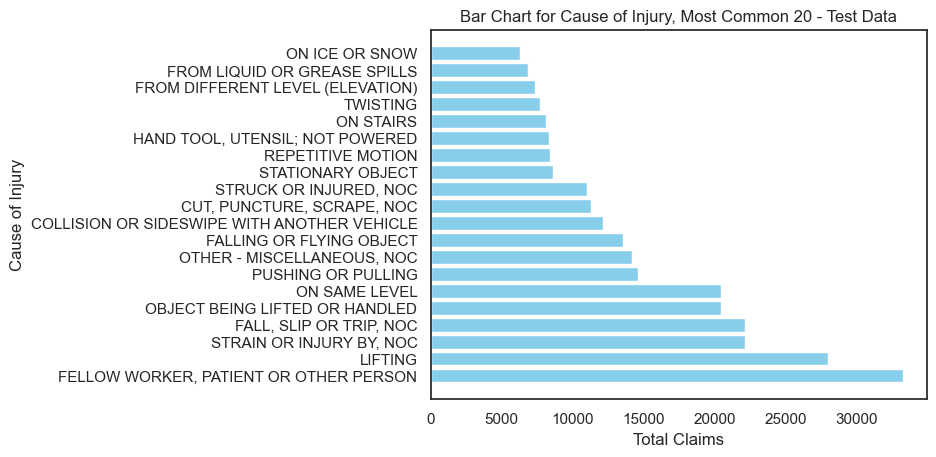

In [284]:
#bar graph for cause of injury data - showing only top 20 causes so its readable
cause_counts_test = df_test_eda['WCIO Cause of Injury Description'].value_counts()
top_injury_causes_test = cause_counts_test.nlargest(20)

plt.barh(top_injury_causes_test.index, top_injury_causes_test.values, color = 'skyblue')

plt.title('Bar Chart for Cause of Injury, Most Common 20 - Test Data')
plt.xlabel('Total Claims')
plt.ylabel('Cause of Injury')

plt.show()

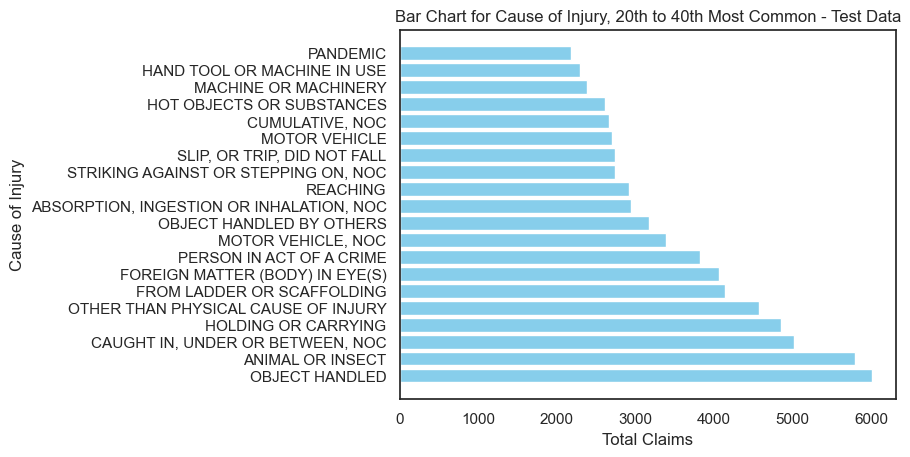

In [285]:
#boxplot for cause of injury data - next most common 20
mid_injury_causes_test = cause_counts_test.iloc[20:40]

plt.barh(mid_injury_causes_test.index, mid_injury_causes_test.values, color = 'skyblue')

plt.title('Bar Chart for Cause of Injury, 20th to 40th Most Common - Test Data')
plt.xlabel('Total Claims')
plt.ylabel('Cause of Injury')

plt.show()

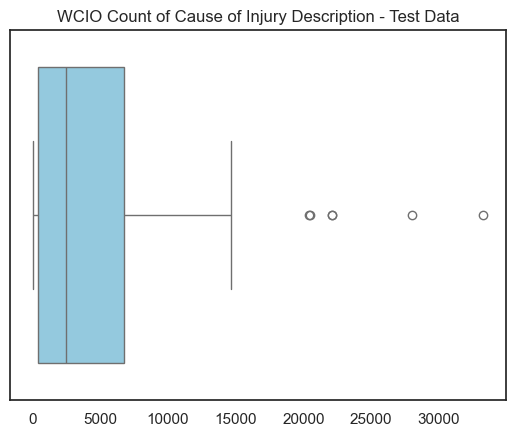

In [286]:
# we can use the value count series created above to look at outliers
# injury description boxplot
sns.boxplot(x=cause_counts_test.values, color = 'skyblue')

plt.title('WCIO Count of Cause of Injury Description - Test Data')
plt.show()

<hr>
<div class="alert alert-block alert-info" style="font-size:12px">
    
# Key Notes: WCIO Cause of Injury Code and Cause of Injury Description

- Distribution: Categorical features with a corresponding value for code and description. There are 74 total catogories for Cause of Injury. Mode for training data is 'Lifting' and 'Fellow Worker, Patient, or Other Person' for test data. 
- Outliers: Each category is represented in both datasets, although many categories have less than 100 claims associated. There are 'outlier' values with very high counts, but we will elect to keep these values as they represent the most common causes of injuries.
- Missing Values: 35,084 missing values in the training data, 10,348 missing in test. Missing values in Cause of Injjury Code correspond to missing values in Cause of Injury Description.

</a>

<hr>
<div class="alert alert-block alert-info" style="font-size:14px" id="wcio_n">
    
# 1.2.21.2 WCIO Nature of Injury Code and Description

    
</a>

In [289]:
df_eda['WCIO Nature of Injury Description'].describe()

count             558369
unique                56
top       STRAIN OR TEAR
freq              153373
Name: WCIO Nature of Injury Description, dtype: object

In [290]:
df_eda['WCIO Nature of Injury Description'].value_counts()

WCIO Nature of Injury Description
STRAIN OR TEAR                                                 153373
CONTUSION                                                      110717
SPRAIN OR TEAR                                                  55789
LACERATION                                                      47157
ALL OTHER SPECIFIC INJURIES, NOC                                36101
COVID-19                                                        25724
FRACTURE                                                        22673
PUNCTURE                                                        17350
MULTIPLE PHYSICAL INJURIES ONLY                                 12734
INFLAMMATION                                                    12491
BURN                                                             7525
FOREIGN BODY                                                     7386
NO PHYSICAL INJURY                                               5961
DISLOCATION                                             

In [291]:
df_test_eda['WCIO Nature of Injury Description'].describe()

count             377415
unique                56
top       STRAIN OR TEAR
freq              108326
Name: WCIO Nature of Injury Description, dtype: object

In [292]:
df_test_eda['WCIO Nature of Injury Description'].value_counts()

WCIO Nature of Injury Description
STRAIN OR TEAR                                                 108326
CONTUSION                                                       82385
LACERATION                                                      37314
SPRAIN OR TEAR                                                  33783
ALL OTHER SPECIFIC INJURIES, NOC                                24898
PUNCTURE                                                        15560
FRACTURE                                                        12004
INFLAMMATION                                                     7696
MULTIPLE PHYSICAL INJURIES ONLY                                  7460
NO PHYSICAL INJURY                                               6435
BURN                                                             6413
FOREIGN BODY                                                     5629
CONCUSSION                                                       4100
CRUSHING                                                

In [293]:
print(df_eda['WCIO Nature of Injury Description'].isna().sum())
print(df_eda['WCIO Nature of Injury Code'].isna().sum())
#there are lots of missing values

35101
35101


In [294]:
print(df_test_eda['WCIO Nature of Injury Description'].isna().sum())
print(df_test_eda['WCIO Nature of Injury Code'].isna().sum())
#there are lots of missing values

10560
10560


In [295]:
df_eda['WCIO Nature of Injury Code'].min()

1.0

In [296]:
df_test_eda['WCIO Nature of Injury Code'].min()

1.0

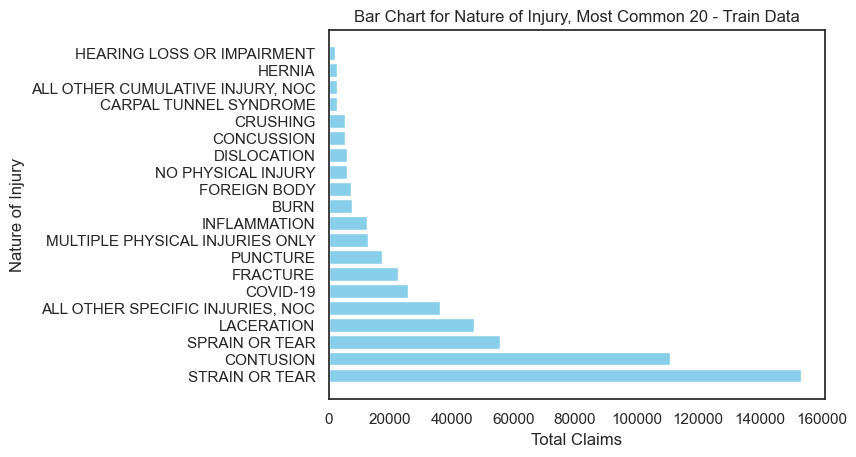

In [297]:
#boxplot for nature of injury data - only top 20 causes so its readable
nature_counts = df_eda['WCIO Nature of Injury Description'].value_counts()
top_injury_natures = nature_counts.nlargest(20)

plt.barh(top_injury_natures.index, top_injury_natures.values, color = 'skyblue')

plt.title('Bar Chart for Nature of Injury, Most Common 20 - Train Data')
plt.xlabel('Total Claims')
plt.ylabel('Nature of Injury')

plt.show()

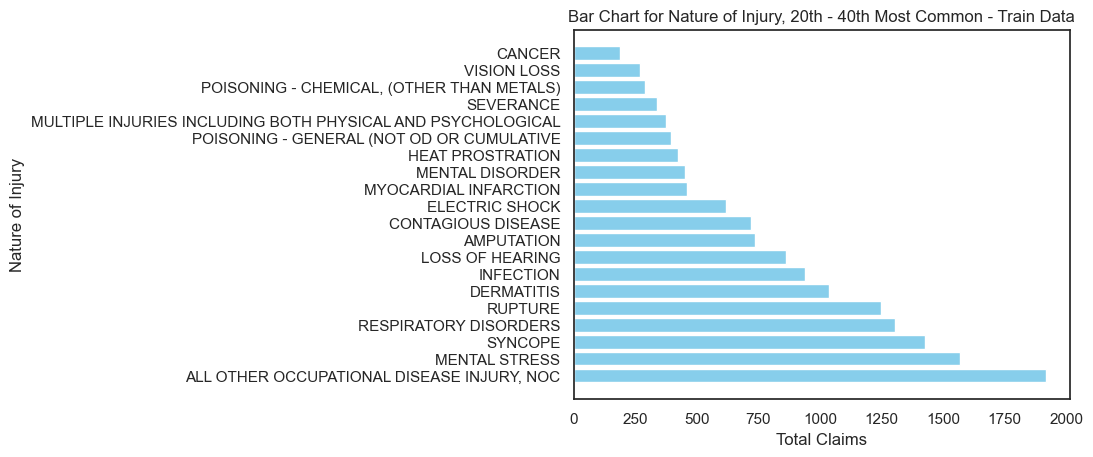

In [298]:
#boxplot for nature of injury data - next most common 20
mid_injury_natures = nature_counts.iloc[20:40]

plt.barh(mid_injury_natures.index, mid_injury_natures.values, color = 'skyblue')

plt.title('Bar Chart for Nature of Injury, 20th - 40th Most Common - Train Data')
plt.xlabel('Total Claims')
plt.ylabel('Nature of Injury')

plt.show()

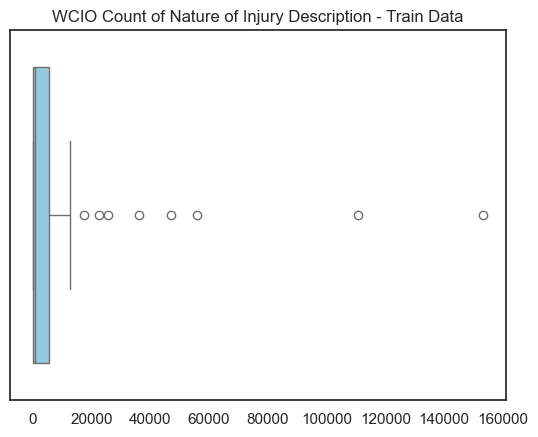

In [299]:
#nature of injury boxplot
sns.boxplot(x=nature_counts.values, color = 'skyblue')

plt.title('WCIO Count of Nature of Injury Description - Train Data')
plt.show()

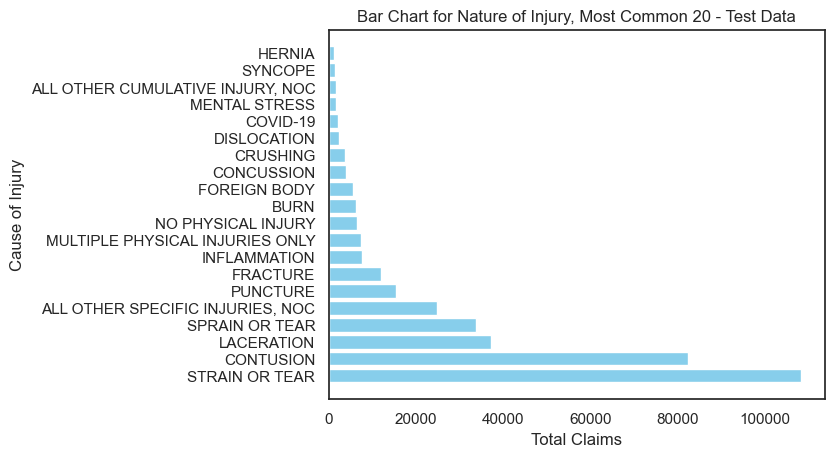

In [300]:
#bar graph for nature of injury data - showing only top 20 causes so its readable
nature_counts_test = df_test_eda['WCIO Nature of Injury Description'].value_counts()
top_injury_natures_test = nature_counts_test.nlargest(20)

plt.barh(top_injury_natures_test.index, top_injury_natures_test.values, color = 'skyblue')

plt.title('Bar Chart for Nature of Injury, Most Common 20 - Test Data')
plt.xlabel('Total Claims')
plt.ylabel('Cause of Injury')

plt.show()

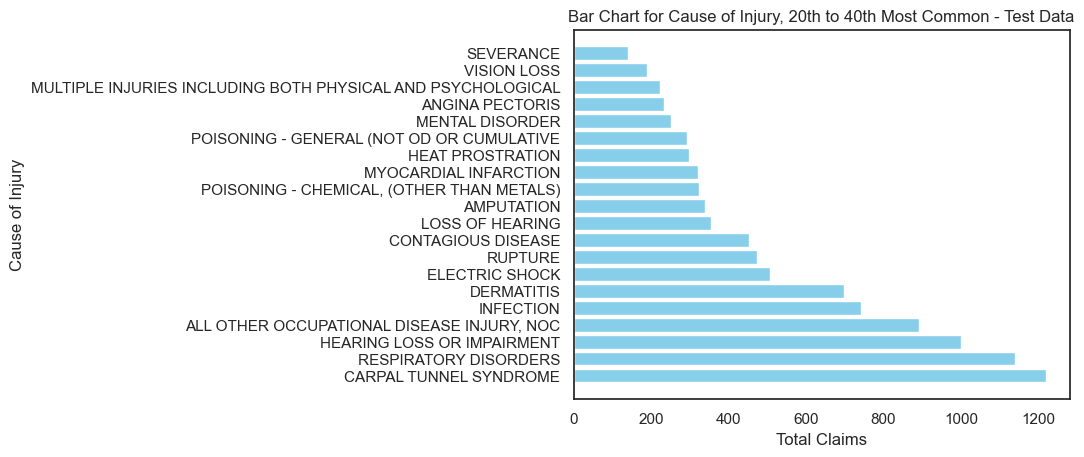

In [301]:
#boxplot for nature of injury data - next most common 20
mid_injury_natures_test = nature_counts_test.iloc[20:40]

plt.barh(mid_injury_natures_test.index, mid_injury_natures_test.values, color = 'skyblue')

plt.title('Bar Chart for Cause of Injury, 20th to 40th Most Common - Test Data')
plt.xlabel('Total Claims')
plt.ylabel('Cause of Injury')

plt.show()

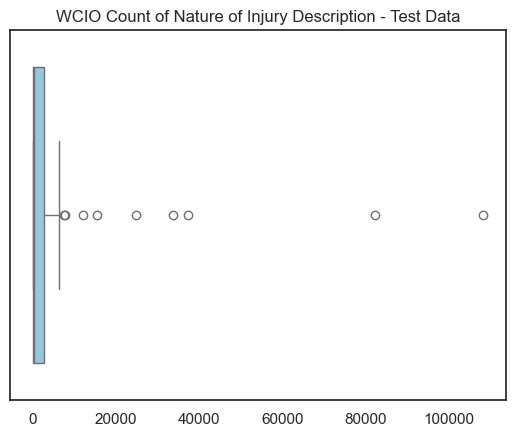

In [302]:
#nature of injury boxplot
sns.boxplot(x=nature_counts_test.values, color = 'skyblue')

plt.title('WCIO Count of Nature of Injury Description - Test Data')
plt.show()

<hr>
<div class="alert alert-block alert-info" style="font-size:12px">
    
# Key Notes: WCIO Nature of Injury Code and Nature of Injury Description

- Distribution: Categorical features with a corresponding value for code and description. There are 56 total catogories for Cause of Injury. Mode for training and test data is 'Strain or Tear.' 
- Outliers: Each category is represented in both datasets, although many categories have less than 100 claims associated; a few have less than 10. There are 'outlier' values with very high counts, but we will elect to keep these values as they represent the most common natures of injuries.
- Missing Values: 35,101 missing values in the training data, 10,560 missing in test. Missing values in Cause of Injjury Code correspond to missing values in Cause of Injury Description.

</a>

<hr>
<div class="alert alert-block alert-info" style="font-size:14px" id="wcio_p">
    
# 1.2.21.3 WCIO Part Of Body Code and Description

    
</a>

In [305]:
df_eda['WCIO Part Of Body Description'].value_counts()

WCIO Part Of Body Description
LOWER BACK AREA                                          51862
KNEE                                                     47903
MULTIPLE                                                 42011
SHOULDER(S)                                              37811
FINGER(S)                                                36093
HAND                                                     31388
ANKLE                                                    24928
MULTIPLE BODY PARTS (INCLUDING BODY                      22608
SOFT TISSUE                                              19703
FOOT                                                     18765
WRIST                                                    18750
LOWER ARM                                                15372
LUNGS                                                    14000
EYE(S)                                                   12975
THUMB                                                    12525
LOWER LEG                

In [306]:
df_eda['WCIO Part Of Body Description'].describe()

count              556944
unique                 54
top       LOWER BACK AREA
freq                51862
Name: WCIO Part Of Body Description, dtype: object

In [307]:
df_test_eda['WCIO Part Of Body Description'].value_counts()

WCIO Part Of Body Description
MULTIPLE                                                 67465
LOWER BACK AREA                                          29901
KNEE                                                     29030
FINGER(S)                                                26940
HAND                                                     23541
SHOULDER(S)                                              22227
ANKLE                                                    16050
FOOT                                                     12834
SOFT TISSUE                                              12804
WRIST                                                    11393
LOWER ARM                                                10675
EYE(S)                                                   10084
THUMB                                                     9868
LOWER LEG                                                 8305
SKULL                                                     6951
UPPER BACK AREA          

In [308]:
df_test_eda['WCIO Part Of Body Description'].describe()

count       378426
unique          51
top       MULTIPLE
freq         67465
Name: WCIO Part Of Body Description, dtype: object

In [309]:
print(df_eda['WCIO Part Of Body Description'].isna().sum())
print(df_eda['WCIO Part Of Body Code'].isna().sum())
#there are lots of missing values

36526
36526


In [310]:
print(df_test_eda['WCIO Part Of Body Description'].isna().sum())
print(df_test_eda['WCIO Part Of Body Code'].isna().sum())
#there are lots of missing values

9549
9549


In [311]:
df_eda['WCIO Part Of Body Code'].min()

-9.0

In [312]:
df_test_eda['WCIO Part Of Body Code'].min()

-9.0

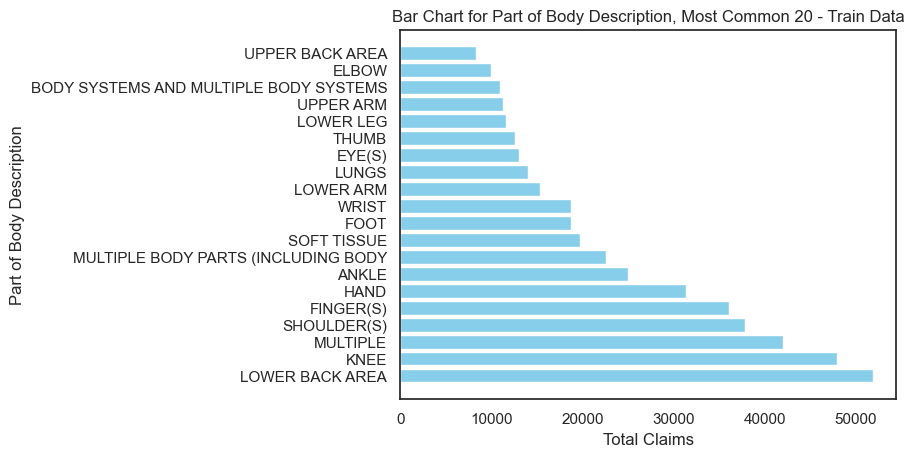

WCIO Part Of Body Description
LOWER BACK AREA                           51862
KNEE                                      47903
MULTIPLE                                  42011
SHOULDER(S)                               37811
FINGER(S)                                 36093
HAND                                      31388
ANKLE                                     24928
MULTIPLE BODY PARTS (INCLUDING BODY       22608
SOFT TISSUE                               19703
FOOT                                      18765
WRIST                                     18750
LOWER ARM                                 15372
LUNGS                                     14000
EYE(S)                                    12975
THUMB                                     12525
LOWER LEG                                 11622
UPPER ARM                                 11236
BODY SYSTEMS AND MULTIPLE BODY SYSTEMS    10950
ELBOW                                      9949
UPPER BACK AREA                            8240
Name: coun

In [313]:
#boxplot for part of body injury data - only top 20 causes so its readable
bodypart_counts = df_eda['WCIO Part Of Body Description'].value_counts()
top_bodyparts = bodypart_counts.nlargest(20)

plt.barh(top_bodyparts.index, top_bodyparts.values, color = 'skyblue')

plt.title('Bar Chart for Part of Body Description, Most Common 20 - Train Data')
plt.xlabel('Total Claims')
plt.ylabel('Part of Body Description')

plt.show()

print(top_bodyparts)

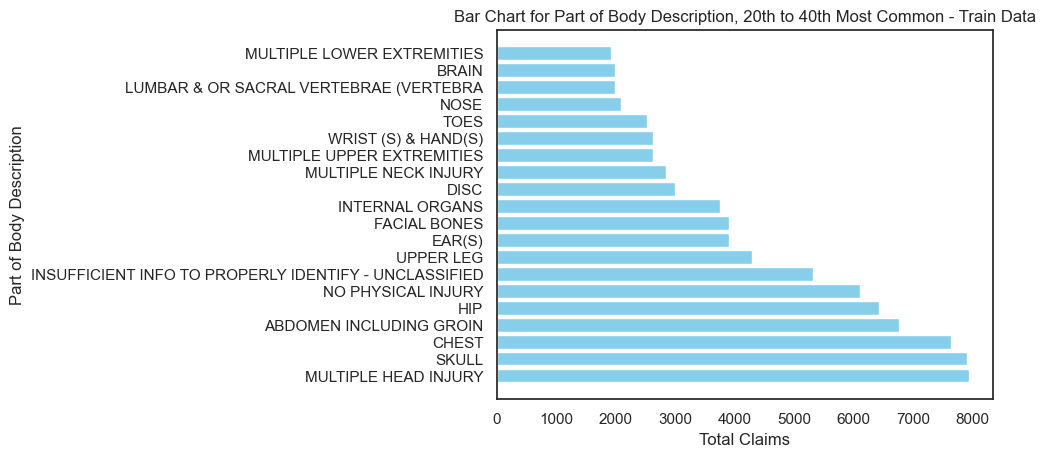

In [314]:
#boxplot for part of body injury data
bodypart_counts = df_eda['WCIO Part Of Body Description'].value_counts()
mid_bodyparts = bodypart_counts.iloc[20:40]

plt.barh(mid_bodyparts.index, mid_bodyparts.values, color = 'skyblue')

plt.title('Bar Chart for Part of Body Description, 20th to 40th Most Common - Train Data')
plt.xlabel('Total Claims')
plt.ylabel('Part of Body Description')

plt.show()

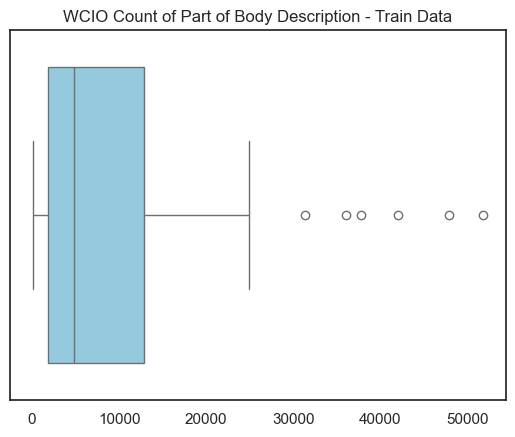

In [315]:
#box plot for values of body part counts
sns.boxplot(x=bodypart_counts.values, color = 'skyblue')

plt.title('WCIO Count of Part of Body Description - Train Data')
plt.show()

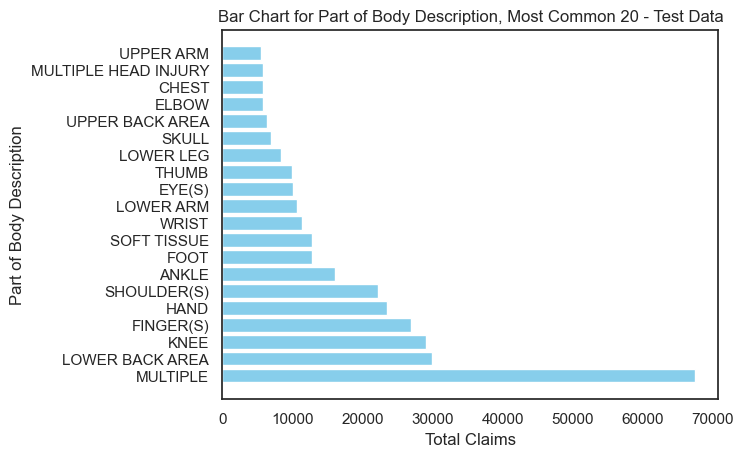

WCIO Part Of Body Description
MULTIPLE                67465
LOWER BACK AREA         29901
KNEE                    29030
FINGER(S)               26940
HAND                    23541
SHOULDER(S)             22227
ANKLE                   16050
FOOT                    12834
SOFT TISSUE             12804
WRIST                   11393
LOWER ARM               10675
EYE(S)                  10084
THUMB                    9868
LOWER LEG                8305
SKULL                    6951
UPPER BACK AREA          6394
ELBOW                    5828
CHEST                    5787
MULTIPLE HEAD INJURY     5739
UPPER ARM                5501
Name: count, dtype: int64


In [316]:
#boxplot for part of body injury data - only top 20 causes so its readable
bodypart_counts_test = df_test_eda['WCIO Part Of Body Description'].value_counts()
top_bodyparts_test = bodypart_counts_test.nlargest(20)

plt.barh(top_bodyparts_test.index, top_bodyparts_test.values, color = 'skyblue')

plt.title('Bar Chart for Part of Body Description, Most Common 20 - Test Data')
plt.xlabel('Total Claims')
plt.ylabel('Part of Body Description')

plt.show()

print(top_bodyparts_test)

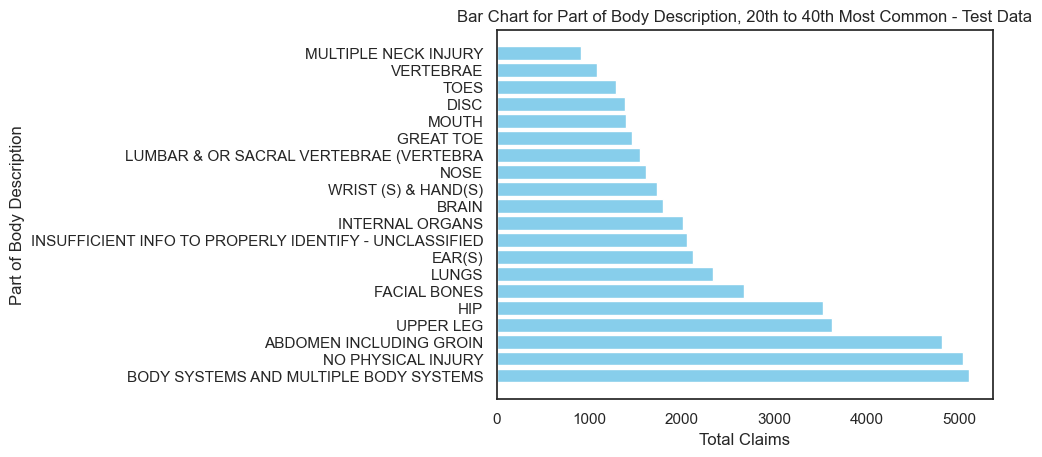

In [317]:
#boxplot for part of body injury data
bodypart_counts_test = df_test_eda['WCIO Part Of Body Description'].value_counts()
mid_bodyparts_test = bodypart_counts_test.iloc[20:40]

plt.barh(mid_bodyparts_test.index, mid_bodyparts_test.values, color = 'skyblue')

plt.title('Bar Chart for Part of Body Description, 20th to 40th Most Common - Test Data')
plt.xlabel('Total Claims')
plt.ylabel('Part of Body Description')

plt.show()

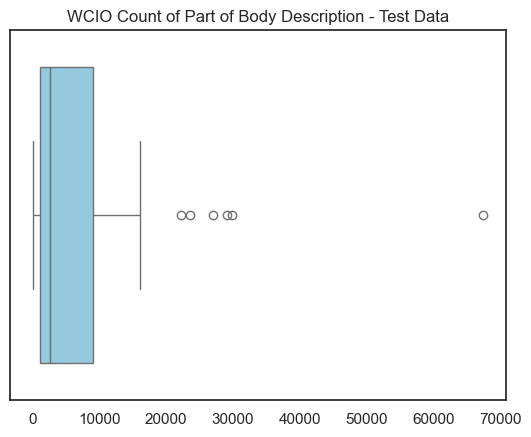

In [318]:
#box plot for values of body part counts
sns.boxplot(x=bodypart_counts_test.values, color = 'skyblue')

plt.title('WCIO Count of Part of Body Description - Test Data')
plt.show()

<hr>
<div class="alert alert-block alert-info" style="font-size:12px">
    
# Key Notes: WCIO Part of Body Code and Nature of Injury Description

- Distribution: Categorical features with a corresponding value for code and description. There are 54 total catogories for Part of Body. Mode for training and is 'Lower Back Area', and 'Multiple' for test data, although 'Lower Back Area' is second most common value in test data, as well. 
- Outliers: Each category is represented in both datasets, although many categories have less than 100 claims associated; 'MULTIPLE UPPER EXTREMITIES' is an outlier in test data with only one count. There are 'outlier' values with very high counts, but we will elect to keep these values as they represent the most common natures of injuries.
- Missing Values: 36,526 missing values in the training data, 9,549 missing in test. Missing values in Cause of Injjury Code correspond to missing values in Cause of Injury Description.


</a>

<hr>
<div class="alert alert-block alert-info" style="font-size:14px" id="zip">
    
# 1.2.22. Zip Code

    
</a>

In [321]:
df_eda['Zip Code'].describe

<bound method NDFrame.describe of Claim Identifier
5393875      13662
5393091      14569
5393889      12589
957648180      NaN
5393887      12603
             ...  
327160035      NaN
6165075      12779
249875936      NaN
120584215      NaN
818961390      NaN
Name: Zip Code, Length: 593470, dtype: object>

In [322]:
df_eda['Zip Code'].value_counts()

Zip Code
11236    3398
10940    3051
11717    2877
11434    2838
11706    2815
         ... 
46204       1
19305       1
11854       1
11029       1
07122       1
Name: count, Length: 8286, dtype: int64

In [323]:
df_test_eda['Zip Code'].value_counts()

Zip Code
11368    2068
11236    2056
11208    1848
11207    1843
10940    1833
         ... 
48021       1
60061       1
47304       1
64119       1
33081       1
Name: count, Length: 6276, dtype: int64

In [324]:
df_eda['Zip Code'].isna().sum()

48081

In [325]:
df_test_eda['Zip Code'].isna().sum()

19342

In [326]:
df_eda.groupby('Zip Code').agg(
    district_count=('District Name', 'nunique'),
    row_count=('Zip Code', 'size')
).reset_index().sort_values(by='district_count', ascending=False)

Zip Code  district_count  row_count
5062    29579               7         52
1721    11355               7       1037
3803    16947               6         23
2110    12065               6       1212
5772    33647               6         12
...       ...             ...        ...
3625    14952               1          1
3624    14931               1          1
3623    14929               1          1
3622    14915               1          1
8285    Z2E1N               1          1

[8286 rows x 3 columns]

In [327]:
df_test_eda.groupby('Zip Code').agg(
    district_count=('District Name', 'nunique'),
    row_count=('Zip Code', 'size')
).reset_index().sort_values(by='district_count', ascending=False)


Zip Code  district_count  row_count
6176    99999               7         77
632     07307               6        103
3523    18337               6        111
1530    11412               6       1043
615     07111               6        130
...       ...             ...        ...
666     07460               1          2
3090    14607               1        308
670     07465               1         10
3087    14604               1         52
6275    X8X8X               1          1

[6276 rows x 3 columns]

<hr>
<div class="alert alert-block alert-info" style="font-size:12px">
    
# Key Notes: Zip Code

- Distribution: Categorical feature with 8,000+ unique zip codes. Plotting this feature did not make sense as it is categoical with more than 8,000 categories.
- Outliers: Many Zip Codes have only 1 value.
- Missing Values: 48,081 missing values in the training data, 19,342 missing in test. 
- Other notes: We found that most zip codes can be found in more than one district. This does not make sense, as zip codes are a geographically smaller unit of measurement and should fall under just one district. We will likely drop this feature, as the values don't make sense and we have other regional features at our disposal.

</a>

<hr>
<div class="alert alert-block alert-info" style="font-size:14px" id="agr">
    
# 1.2.23. Agreement Reached

    
</a>

In [330]:
df_eda['Agreement Reached'].value_counts()

Agreement Reached
0.0    547239
1.0     26787
Name: count, dtype: int64

In [331]:
df_eda['Agreement Reached'].isna().sum()

19444

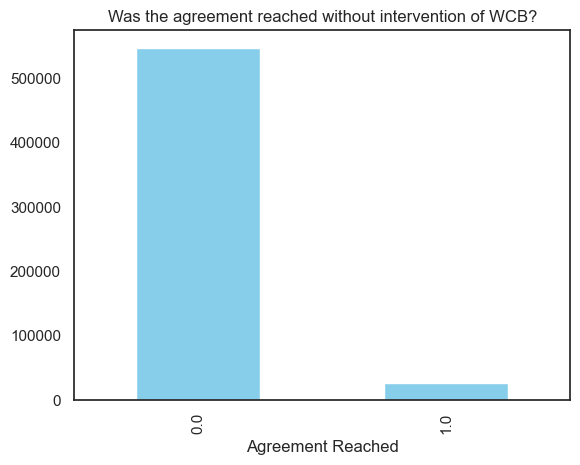

In [332]:
df_eda['Agreement Reached'].value_counts().plot(kind='bar', color = 'skyblue')
plt.title('Was the agreement reached without intervention of WCB?')
plt.show()

Agreement Reached is a binary feature that only exists in the train data, not the test. There are roughly 20,000 missing values. 95% of Agreement Reached values are 0, meaning an agreement was not reached without the intervention of the WBC.

<hr>
<div class="alert alert-block alert-info" style="font-size:12px">
    
# Key Notes: Agreement Reached

- Distribution: Binary feature with heavy class imbalance in favor of 1 (Yes). This feature is only present in training data. 
- Outliers: No outliers because it is a binary feature.
- Missing Values: 19,444 missing values in train data. The missing training values are likely part of the large section of missing values and will be dropped.

</a>

<hr>
<div class="alert alert-block alert-info" style="font-size:14px" id="wcb">
    
# 1.2.24. WCB Decision

    
</a>

In [336]:
df_eda['WCB Decision'].value_counts()


WCB Decision
Not Work Related    574026
Name: count, dtype: int64

In [337]:
df_eda['WCB Decision'].isna().sum()

19444

<hr>
<div class="alert alert-block alert-info" style="font-size:12px">
    
# Key Notes: WCB Decision

- Distribution: Fixed categorical feature: only one value ('Not Work Related') for the entire dataset.  
- Outliers: No outliers because there is only one value for this feature.
- Missing Values: 19,444 missing values in train data. The missing training values are likely part of the large section of missing values and will be dropped.

</a>

<hr>
<div class="alert alert-block alert-info" style="font-size:14px" id="ndep">
    
# 1.2.25. Number of Dependents
    
</a>

This feature was missing from the metadata provided to us, but we will examine it nonetheless.

In [341]:
df_eda['Number of Dependents'].describe()

count    574026.000000
mean          3.006559
std           2.000801
min           0.000000
25%           1.000000
50%           3.000000
75%           5.000000
max           6.000000
Name: Number of Dependents, dtype: float64

In [342]:
df_test_eda['Number of Dependents'].describe()

count    387975.000000
mean          3.000284
std           1.997982
min           0.000000
25%           1.000000
50%           3.000000
75%           5.000000
max           6.000000
Name: Number of Dependents, dtype: float64

In [343]:
df_eda['Number of Dependents'].value_counts()

Number of Dependents
6.0    82653
3.0    82299
5.0    82075
4.0    81904
1.0    81823
0.0    81665
2.0    81607
Name: count, dtype: int64

In [344]:
df_test_eda['Number of Dependents'].value_counts()

Number of Dependents
3    55900
5    55591
4    55427
1    55402
0    55316
2    55191
6    55148
Name: count, dtype: int64

In [345]:
df_eda['Number of Dependents'].isna().sum()

19444

In [346]:
df_test_eda['Number of Dependents'].isna().sum()

0

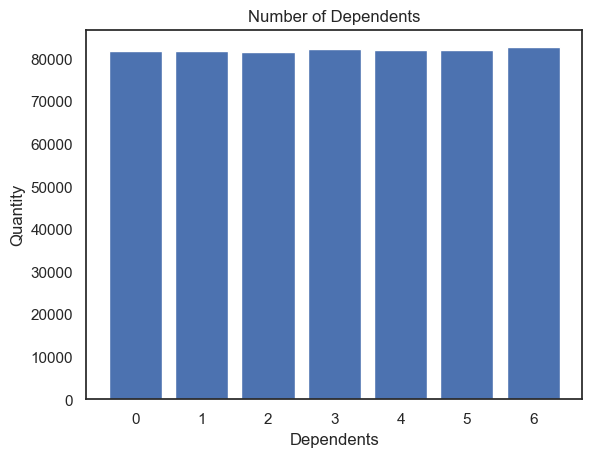

In [347]:
# barplot for Number of Dependents
sns.set_theme(style="white")
fig, ax = plt.subplots()
count = df_eda['Number of Dependents'].dropna().value_counts()
ax.bar(count.index, count.values)
plt.title('Number of Dependents')
plt.xlabel('Dependents')
plt.ylabel('Quantity')
plt.show()


Number of Dependents is a numerical value. From the visualization above, the frequency of number of dependents is almost exacltly even across all numbers of dependents. There are 20,000 missing values in the train data, and no missing values in the test data.

<hr>
<div class="alert alert-block alert-info" style="font-size:12px">
    
# Key Notes: Number of Dependents

- Distribution: Uniformly distributed categorical feature. Values range from 0 to 6, and each value has roughly 8,000 associated claims.  
- Outliers: No outliers in this feature.
- Missing Values: 19,444 missing values in train data. The missing training values are likely part of the large section of missing values and will be dropped.

</a>

<hr>
<div class="alert alert-block alert-info" style="font-size:14px" id="mva">
    
# 1.3. Multivariate Analysis
    
</a>


<hr>
<div class="alert alert-block alert-info" style="font-size:14px" id="date_rel">
    
# 1.3.1 Examining relationships between date featres
    
</a>

Due to the presence of extreme outliers in our date features, we will analyze the relationships between various pairs in an attempt to determine where there may be issues. 

<hr>
<div class="alert alert-block alert-info" style="font-size:14px" id="acc_c2">
    
## 1.3.1.1 Accident Date to C-2 Date
    
</a>

In [354]:
df_eda['Accident to C-2'] = df_eda['C-2 Date'] - df_eda['Accident Date']
df_test_eda['Accident to C-2'] = df_test_eda['C-2 Date'] - df_test_eda['Accident Date']

In [355]:
df_eda['Accident to C-2'].describe()

count                         557346
mean      70 days 08:26:12.216899377
std      511 days 15:12:29.067530272
min             -8842 days +00:00:00
25%                  5 days 00:00:00
50%                 10 days 00:00:00
75%                 27 days 00:00:00
max              21503 days 00:00:00
Name: Accident to C-2, dtype: object

In [356]:
df_test_eda['Accident to C-2'].describe()

count                         377218
mean      55 days 22:54:40.348233649
std      483 days 16:08:11.072661936
min             -9614 days +00:00:00
25%                  4 days 00:00:00
50%                  8 days 00:00:00
75%                 21 days 00:00:00
max              20822 days 00:00:00
Name: Accident to C-2, dtype: object

In [357]:
print(len(df_eda[df_eda['Accident to C-2'] < '0 days 00:00:00']))
print(len(df_test_eda[df_test_eda['Accident to C-2'] < '0 days 00:00:00']))

982
181


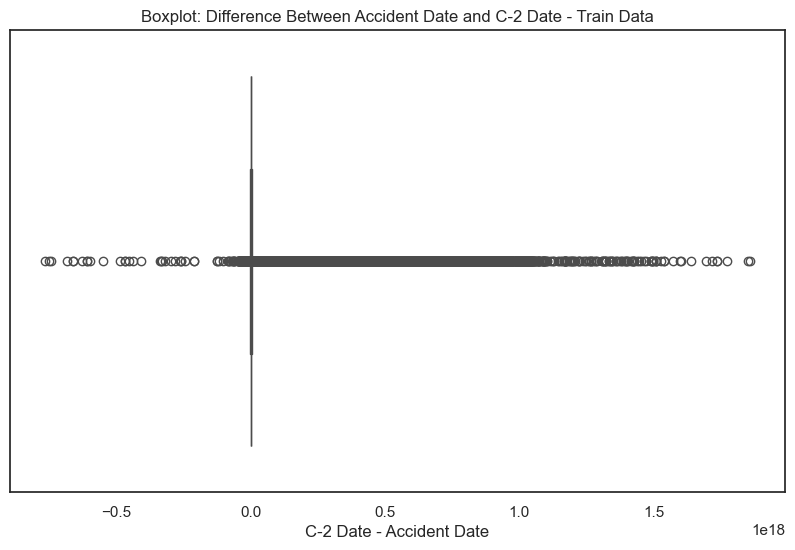

In [358]:
# Boxplot to see outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_eda['Accident to C-2'])
plt.title('Boxplot: Difference Between Accident Date and C-2 Date - Train Data')
plt.xlabel('C-2 Date - Accident Date')
plt.show()

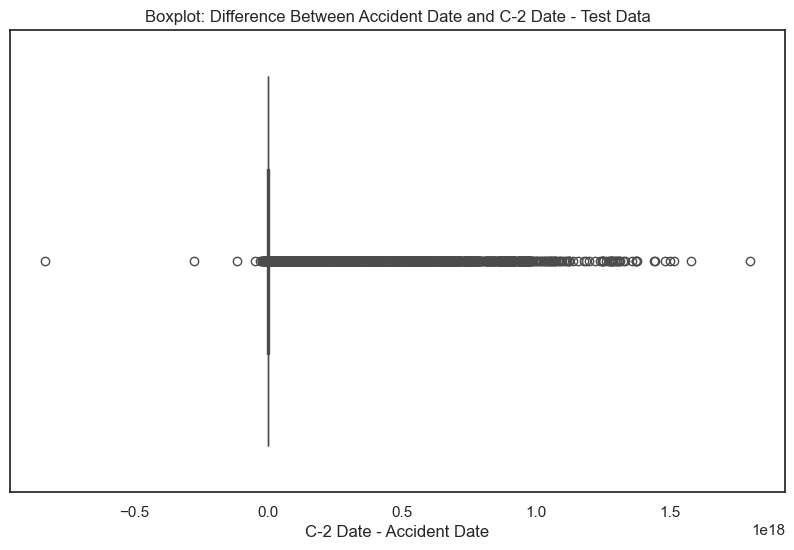

In [359]:
# Boxplot to see outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_test_eda['Accident to C-2'])
plt.title('Boxplot: Difference Between Accident Date and C-2 Date - Test Data')
plt.xlabel('C-2 Date - Accident Date')
plt.show()

<hr>
<div class="alert alert-block alert-info" style="font-size:14px" id="acc_ass">
    
## 1.3.1.2 Accident Date to Assembly Date
    
</a>

In [361]:
df_eda['Accident to Assembly'] = df_eda['Assembly Date'] - df_eda['Accident Date']
df_test_eda['Accident to Assembly'] = df_test_eda['Assembly Date'] - df_test_eda['Accident Date']

In [362]:
df_eda['Accident to Assembly'].describe()

count                         570337
mean      82 days 05:27:34.535476395
std      603 days 23:40:50.047204672
min             -1127 days +00:00:00
25%                  5 days 00:00:00
50%                 10 days 00:00:00
75%                 24 days 00:00:00
max              21503 days 00:00:00
Name: Accident to Assembly, dtype: object

In [363]:
df_test_eda['Accident to Assembly'].describe()

count                         385531
mean      66 days 13:42:28.697770088
std      557 days 23:43:17.647845600
min              -320 days +00:00:00
25%                  4 days 00:00:00
50%                  8 days 00:00:00
75%                 20 days 00:00:00
max              20822 days 00:00:00
Name: Accident to Assembly, dtype: object

In [364]:
print(len(df_eda[df_eda['Accident to Assembly'] < '0 days 00:00:00']))
print(len(df_test_eda[df_test_eda['Accident to Assembly'] < '0 days 00:00:00']))

1407
222


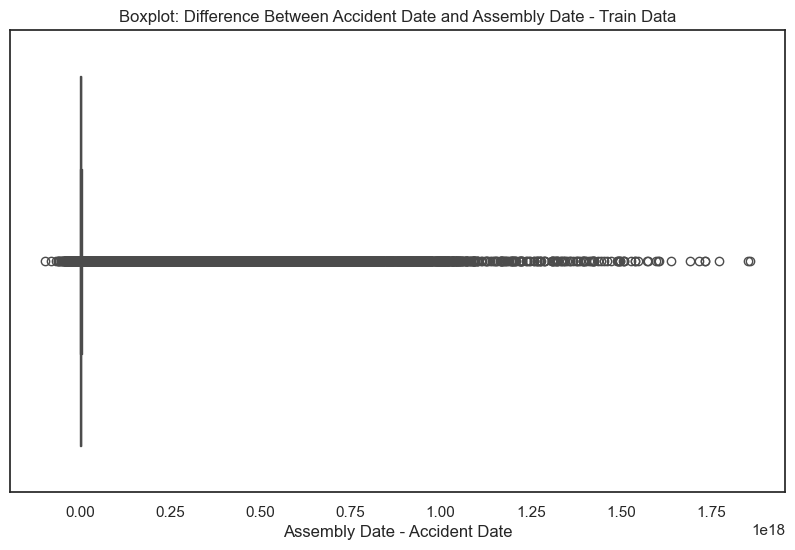

In [365]:
# Boxplot to see outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_eda['Accident to Assembly'])
plt.title('Boxplot: Difference Between Accident Date and Assembly Date - Train Data')
plt.xlabel('Assembly Date - Accident Date')
plt.show()

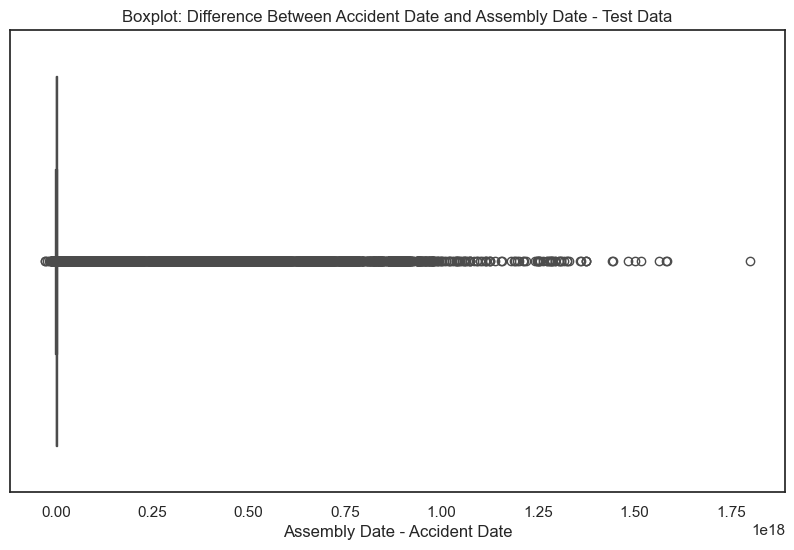

In [366]:
# Boxplot to see outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_test_eda['Accident to Assembly'])
plt.title('Boxplot: Difference Between Accident Date and Assembly Date - Test Data')
plt.xlabel('Assembly Date - Accident Date')
plt.show()

<hr>
<div class="alert alert-block alert-info" style="font-size:14px" id="ass_fh">
    
## 1.3.1.3 Assembly Date to First Hearing Date
    
</a>

In [368]:
df_eda['Assembly to First Hearing'] = df_eda['First Hearing Date'] - df_eda['Assembly Date']
df_test_eda['Assembly to First Hearing'] = df_test_eda['First Hearing Date'] - df_test_eda['Assembly Date']

In [369]:
df_eda['Assembly to First Hearing'].describe()

count                         150798
mean     272 days 01:49:20.872160108
std      221 days 11:56:17.733554036
min                  2 days 00:00:00
25%                115 days 00:00:00
50%                200 days 00:00:00
75%                364 days 00:00:00
max               1587 days 00:00:00
Name: Assembly to First Hearing, dtype: object

In [370]:
df_test_eda['Assembly to First Hearing'].describe()

count                          43028
mean     150 days 06:19:28.652970158
std       92 days 07:45:46.429063366
min                  3 days 00:00:00
25%                 77 days 00:00:00
50%                129 days 00:00:00
75%                200 days 00:00:00
max                521 days 00:00:00
Name: Assembly to First Hearing, dtype: object

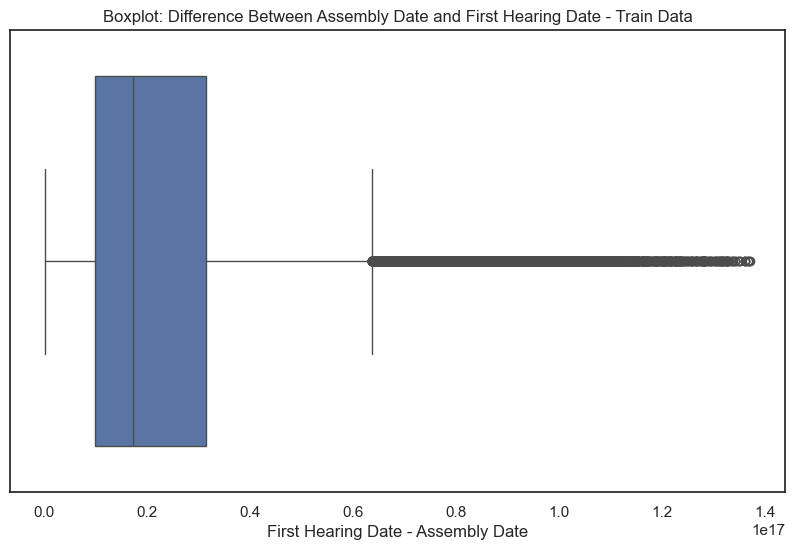

In [371]:
# Boxplot to see outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_eda['Assembly to First Hearing'])
plt.title('Boxplot: Difference Between Assembly Date and First Hearing Date - Train Data')
plt.xlabel('First Hearing Date - Assembly Date')
plt.show()

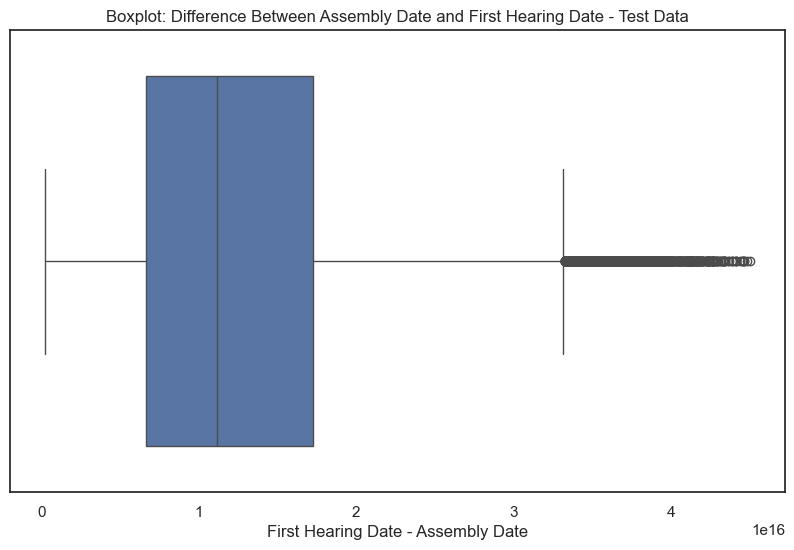

In [372]:
# Boxplot to see outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_test_eda['Assembly to First Hearing'])
plt.title('Boxplot: Difference Between Assembly Date and First Hearing Date - Test Data')
plt.xlabel('First Hearing Date - Assembly Date')
plt.show()

<hr>
<div class="alert alert-block alert-info" style="font-size:14px" id="c2_ass">
    
## 1.3.1.3 C-2 Date to Assembly Date
    
</a>

In [374]:
df_eda['C-2 to Assembly'] = df_eda['Assembly Date'] - df_eda['C-2 Date']
df_test_eda['C-2 to Assembly'] = df_test_eda['Assembly Date'] - df_test_eda['C-2 Date']

In [375]:
df_eda['C-2 to Assembly'].describe()

count                         559466
mean       3 days 20:59:21.584796931
std      259 days 07:38:16.135781136
min             -1466 days +00:00:00
25%                  0 days 00:00:00
50%                  0 days 00:00:00
75%                  0 days 00:00:00
max               9664 days 00:00:00
Name: C-2 to Assembly, dtype: object

In [376]:
df_test_eda['C-2 to Assembly'].describe()

count                         378841
mean       6 days 06:45:13.448649961
std      238 days 20:23:13.558221816
min              -475 days +00:00:00
25%                  0 days 00:00:00
50%                  0 days 00:00:00
75%                  0 days 00:00:00
max              13806 days 00:00:00
Name: C-2 to Assembly, dtype: object

In [377]:
print(len(df_eda[df_eda['C-2 to Assembly'] < '0 days 00:00:00']))
print(len(df_test_eda[df_test_eda['C-2 to Assembly'] < '0 days 00:00:00']))

68845
36232


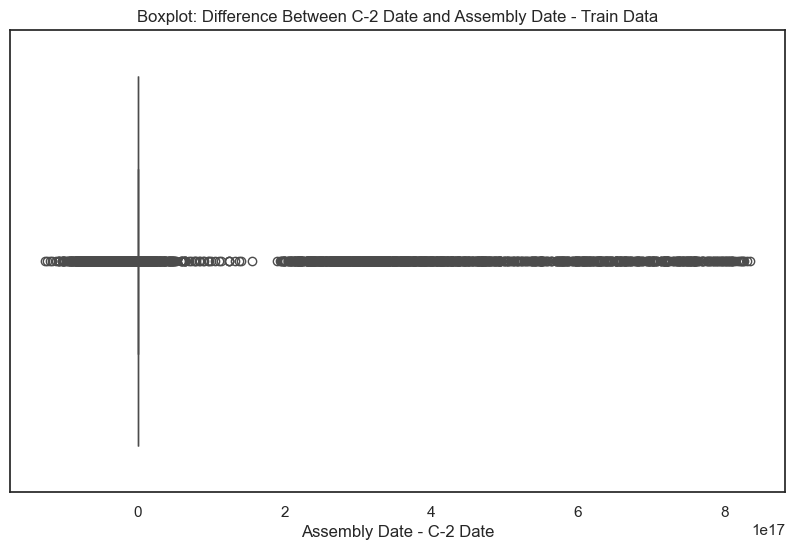

In [378]:
# Boxplot to see outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_eda['C-2 to Assembly'])
plt.title('Boxplot: Difference Between C-2 Date and Assembly Date - Train Data')
plt.xlabel('Assembly Date - C-2 Date')
plt.show()

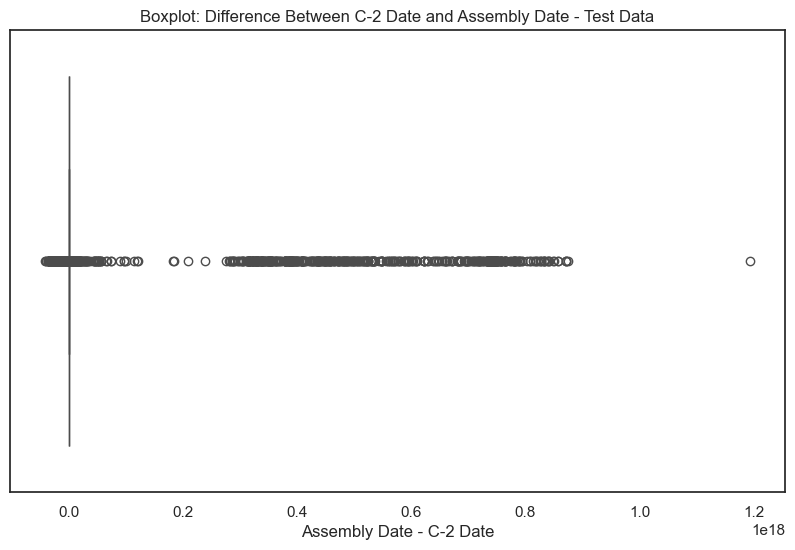

In [379]:
# Boxplot to see outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_test_eda['C-2 to Assembly'])
plt.title('Boxplot: Difference Between C-2 Date and Assembly Date - Test Data')
plt.xlabel('Assembly Date - C-2 Date')
plt.show()

<hr>
<div class="alert alert-block alert-info" style="font-size:12px">
    
# Key Notes: Relationships between date features

* We assume the order of dates should be: Accident Date/C-2 Date, Assembly Date, First Hearing Date. Accident Date must come first as this is the start of the workers' compensation process. The order of C-2 Date vs Assembly Date is ambiguous, as it is not specified that the Employer Report must be received before the report is assembeld. We are certain that First Hearing Date should be the last date of the process. We can see from the brief analysis above that not all dates fall in this order.
    - There appear to be a large segment of Accident Dates that occur before C-2 and Assembly (we see these as negative values when subtracting Accident Date from C-2 or Assembly Date).
    - There are a large portion of Assembly Dates that occur before C-2 Date, reaffirming our idea that these dates may not have an inherent order.
 
We will re-examine these relationships after preprocessing to see if the issues have been solved. 

</a>

<hr>
<div class="alert alert-block alert-info" style="font-size:14px" id="num_feats">
    
# 1.3.2 Examining relationships between numerical features
    
</a>

For the sake of visualizations, we will drop NA values on our EDA dataframe

In [383]:
# Drop rows where all values are NaN except in 'Assembly Date' column
df_eda.dropna(how='all', subset=[col for col in df_eda.columns if col != 'Assembly Date'], inplace=True)

In [384]:
#converting Medical Fee Region to numerical so we can plot it with numerical features
df_eda['Medical Fee Region'].replace('UK',np.nan,inplace=True)
df_eda['Medical Fee Region'].replace('I',1,inplace=True)
df_eda['Medical Fee Region'].replace('II',2,inplace=True)
df_eda['Medical Fee Region'].replace('III',3,inplace=True)
df_eda['Medical Fee Region'].replace('IV',4,inplace=True)

In [385]:
df_eda['Claim Injury Type'].isna().sum()

0

In [386]:
#Transforming our target variable into a numerical code so we can plot it with numerical featurees
df_eda['Claim Injury Type'] = df_eda['Claim Injury Type'].map({ '1. CANCELLED': 1, '2. NON-COMP': 2,
                                                                 '3. MED ONLY': 3, '4. TEMPORARY': 4,
                                                                '5. PPD SCH LOSS': 5,'6. PPD NSL': 6,
                                                                '7. PTD': 7,'8. DEATH': 8}).astype(int)

In [387]:
#selecting only numerical features to examine correlations
numerical_feats = df_eda[['Accident Date',
                    'Age at Injury',
                    'Assembly Date',
                    'Attorney/Representative',
                    'Average Weekly Wage',
                    'Birth Year',
                    'C-2 Date',
                    'C-3 Date',
                    'COVID-19 Indicator',
                    'First Hearing Date',
                    'IME-4 Count',
                    'Agreement Reached',
                    'Number of Dependents',
                    'Claim Injury Type']]

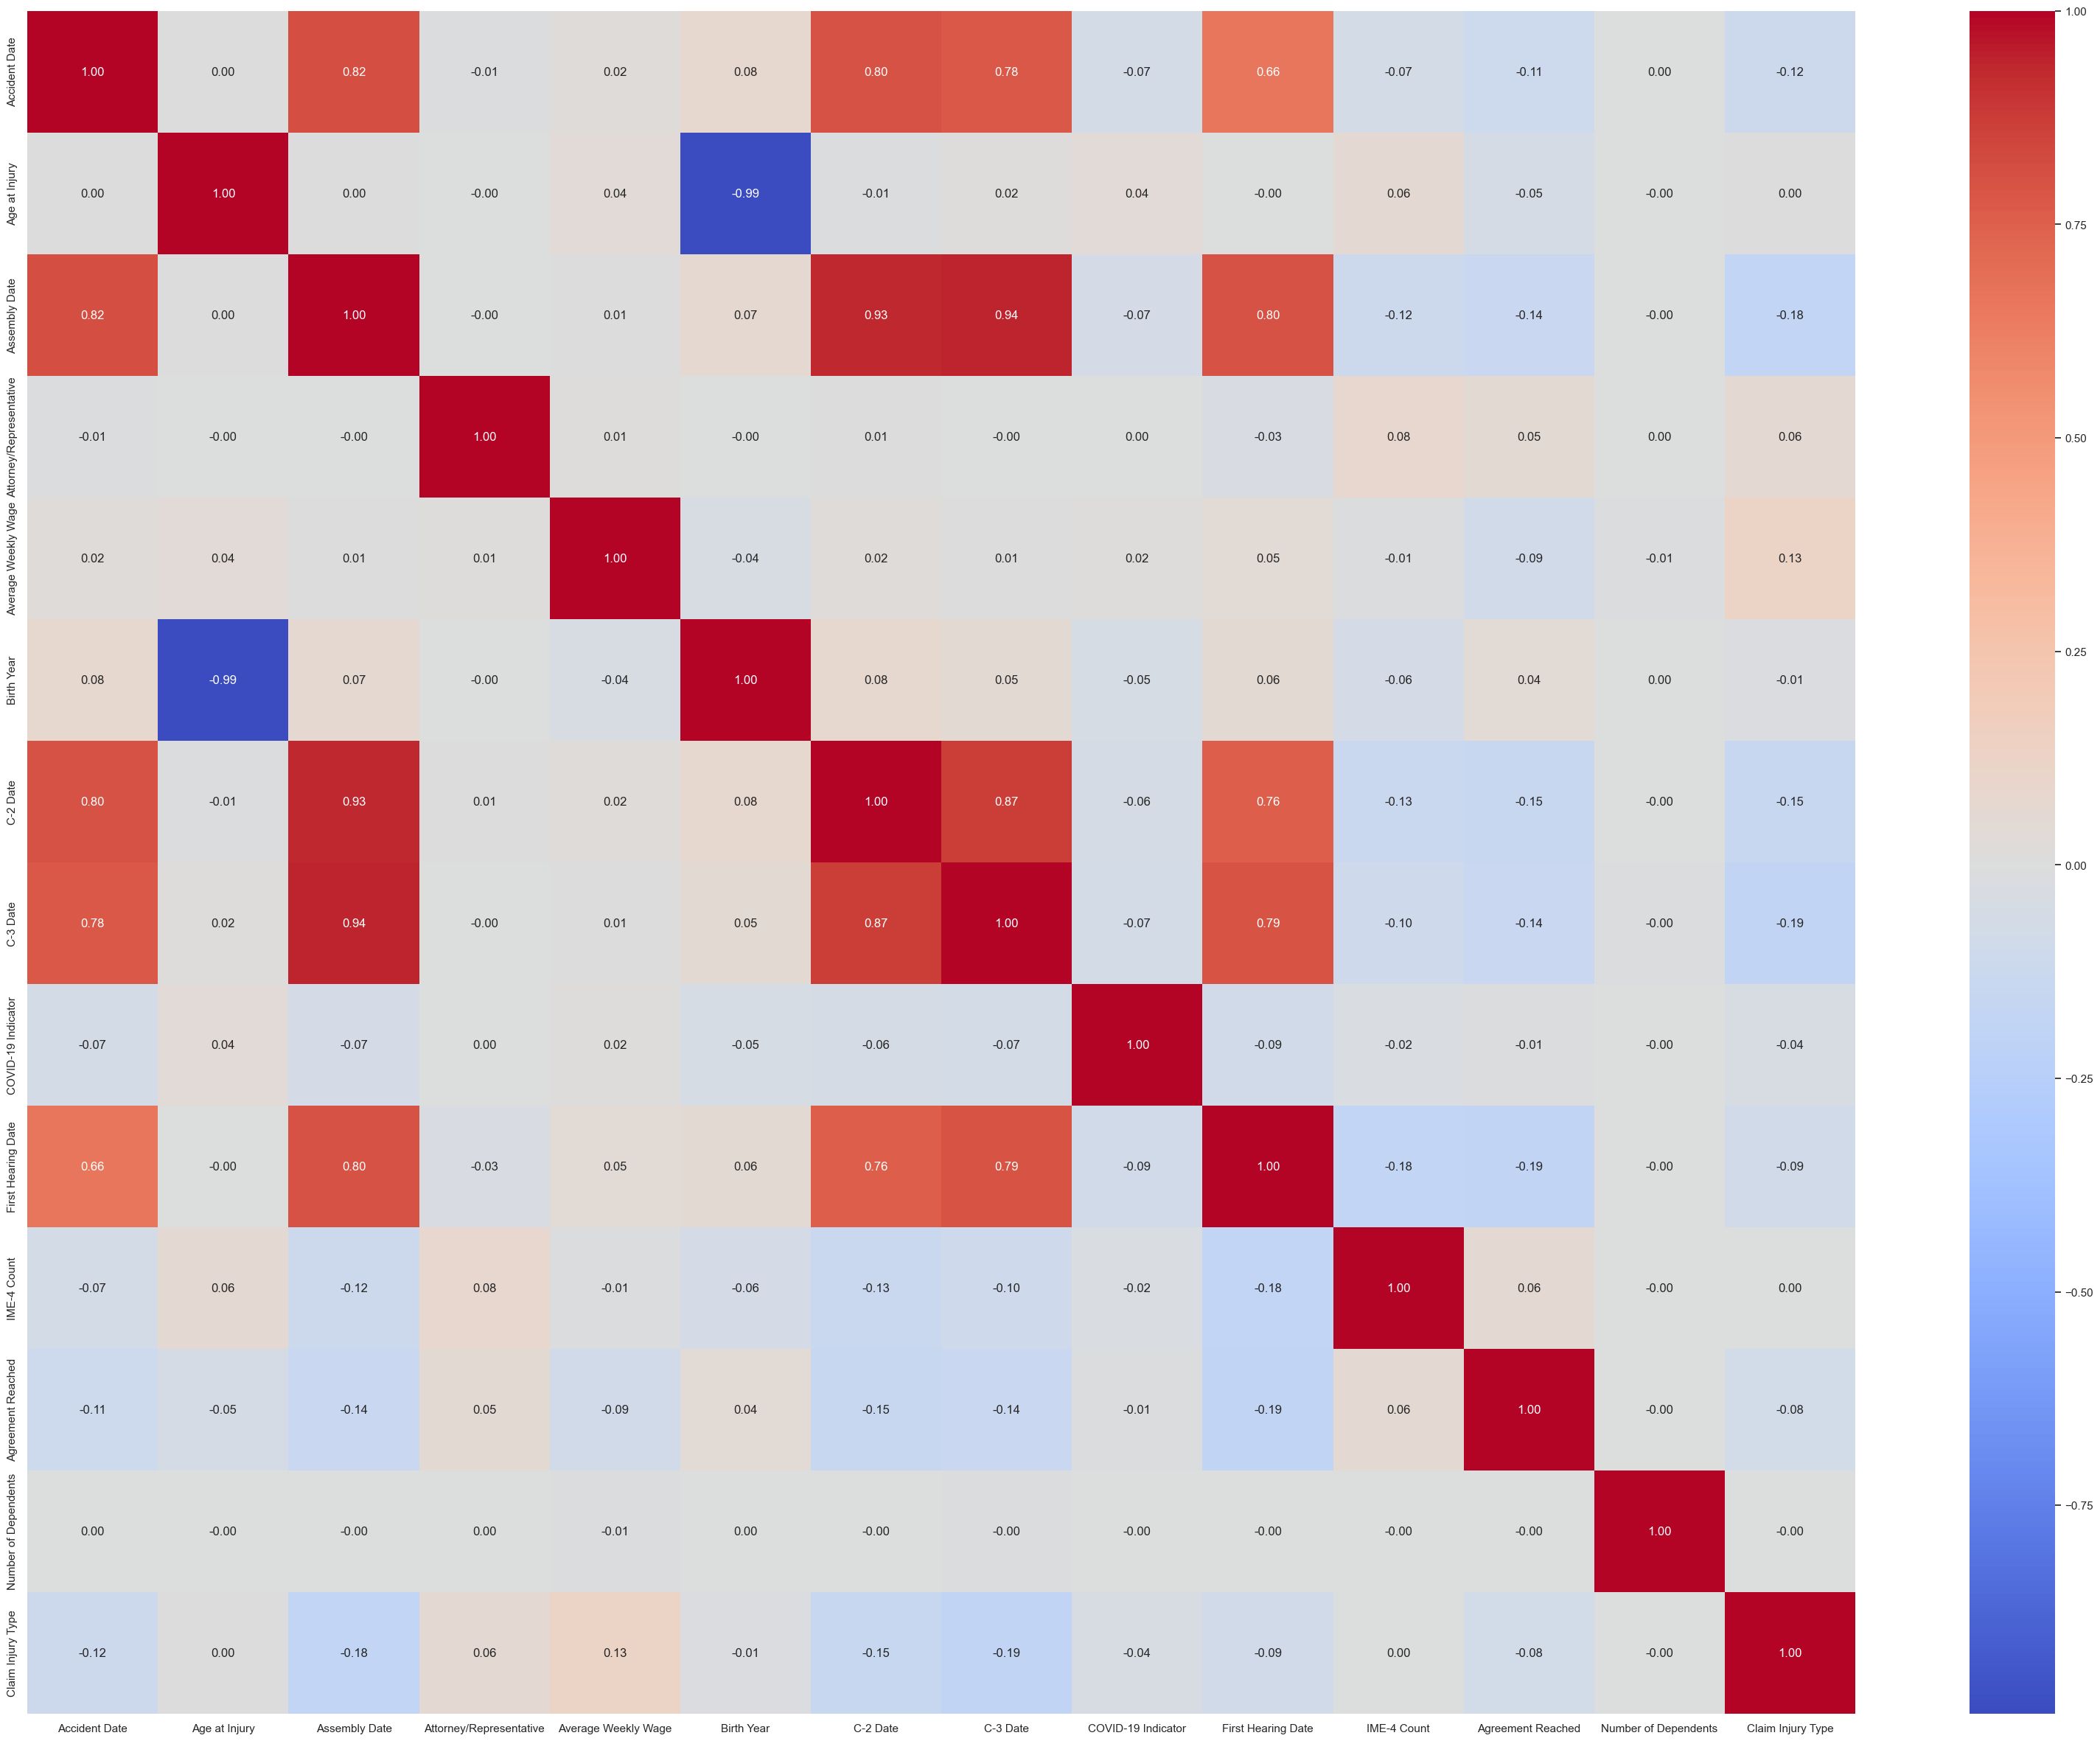

In [388]:
correlation = numerical_feats
correlation = correlation.dropna()

correlation = correlation.corr()
plt.figure(figsize=(40, 30))
sns.heatmap(correlation, cmap='coolwarm', annot=True, fmt=".2f")
plt.show()

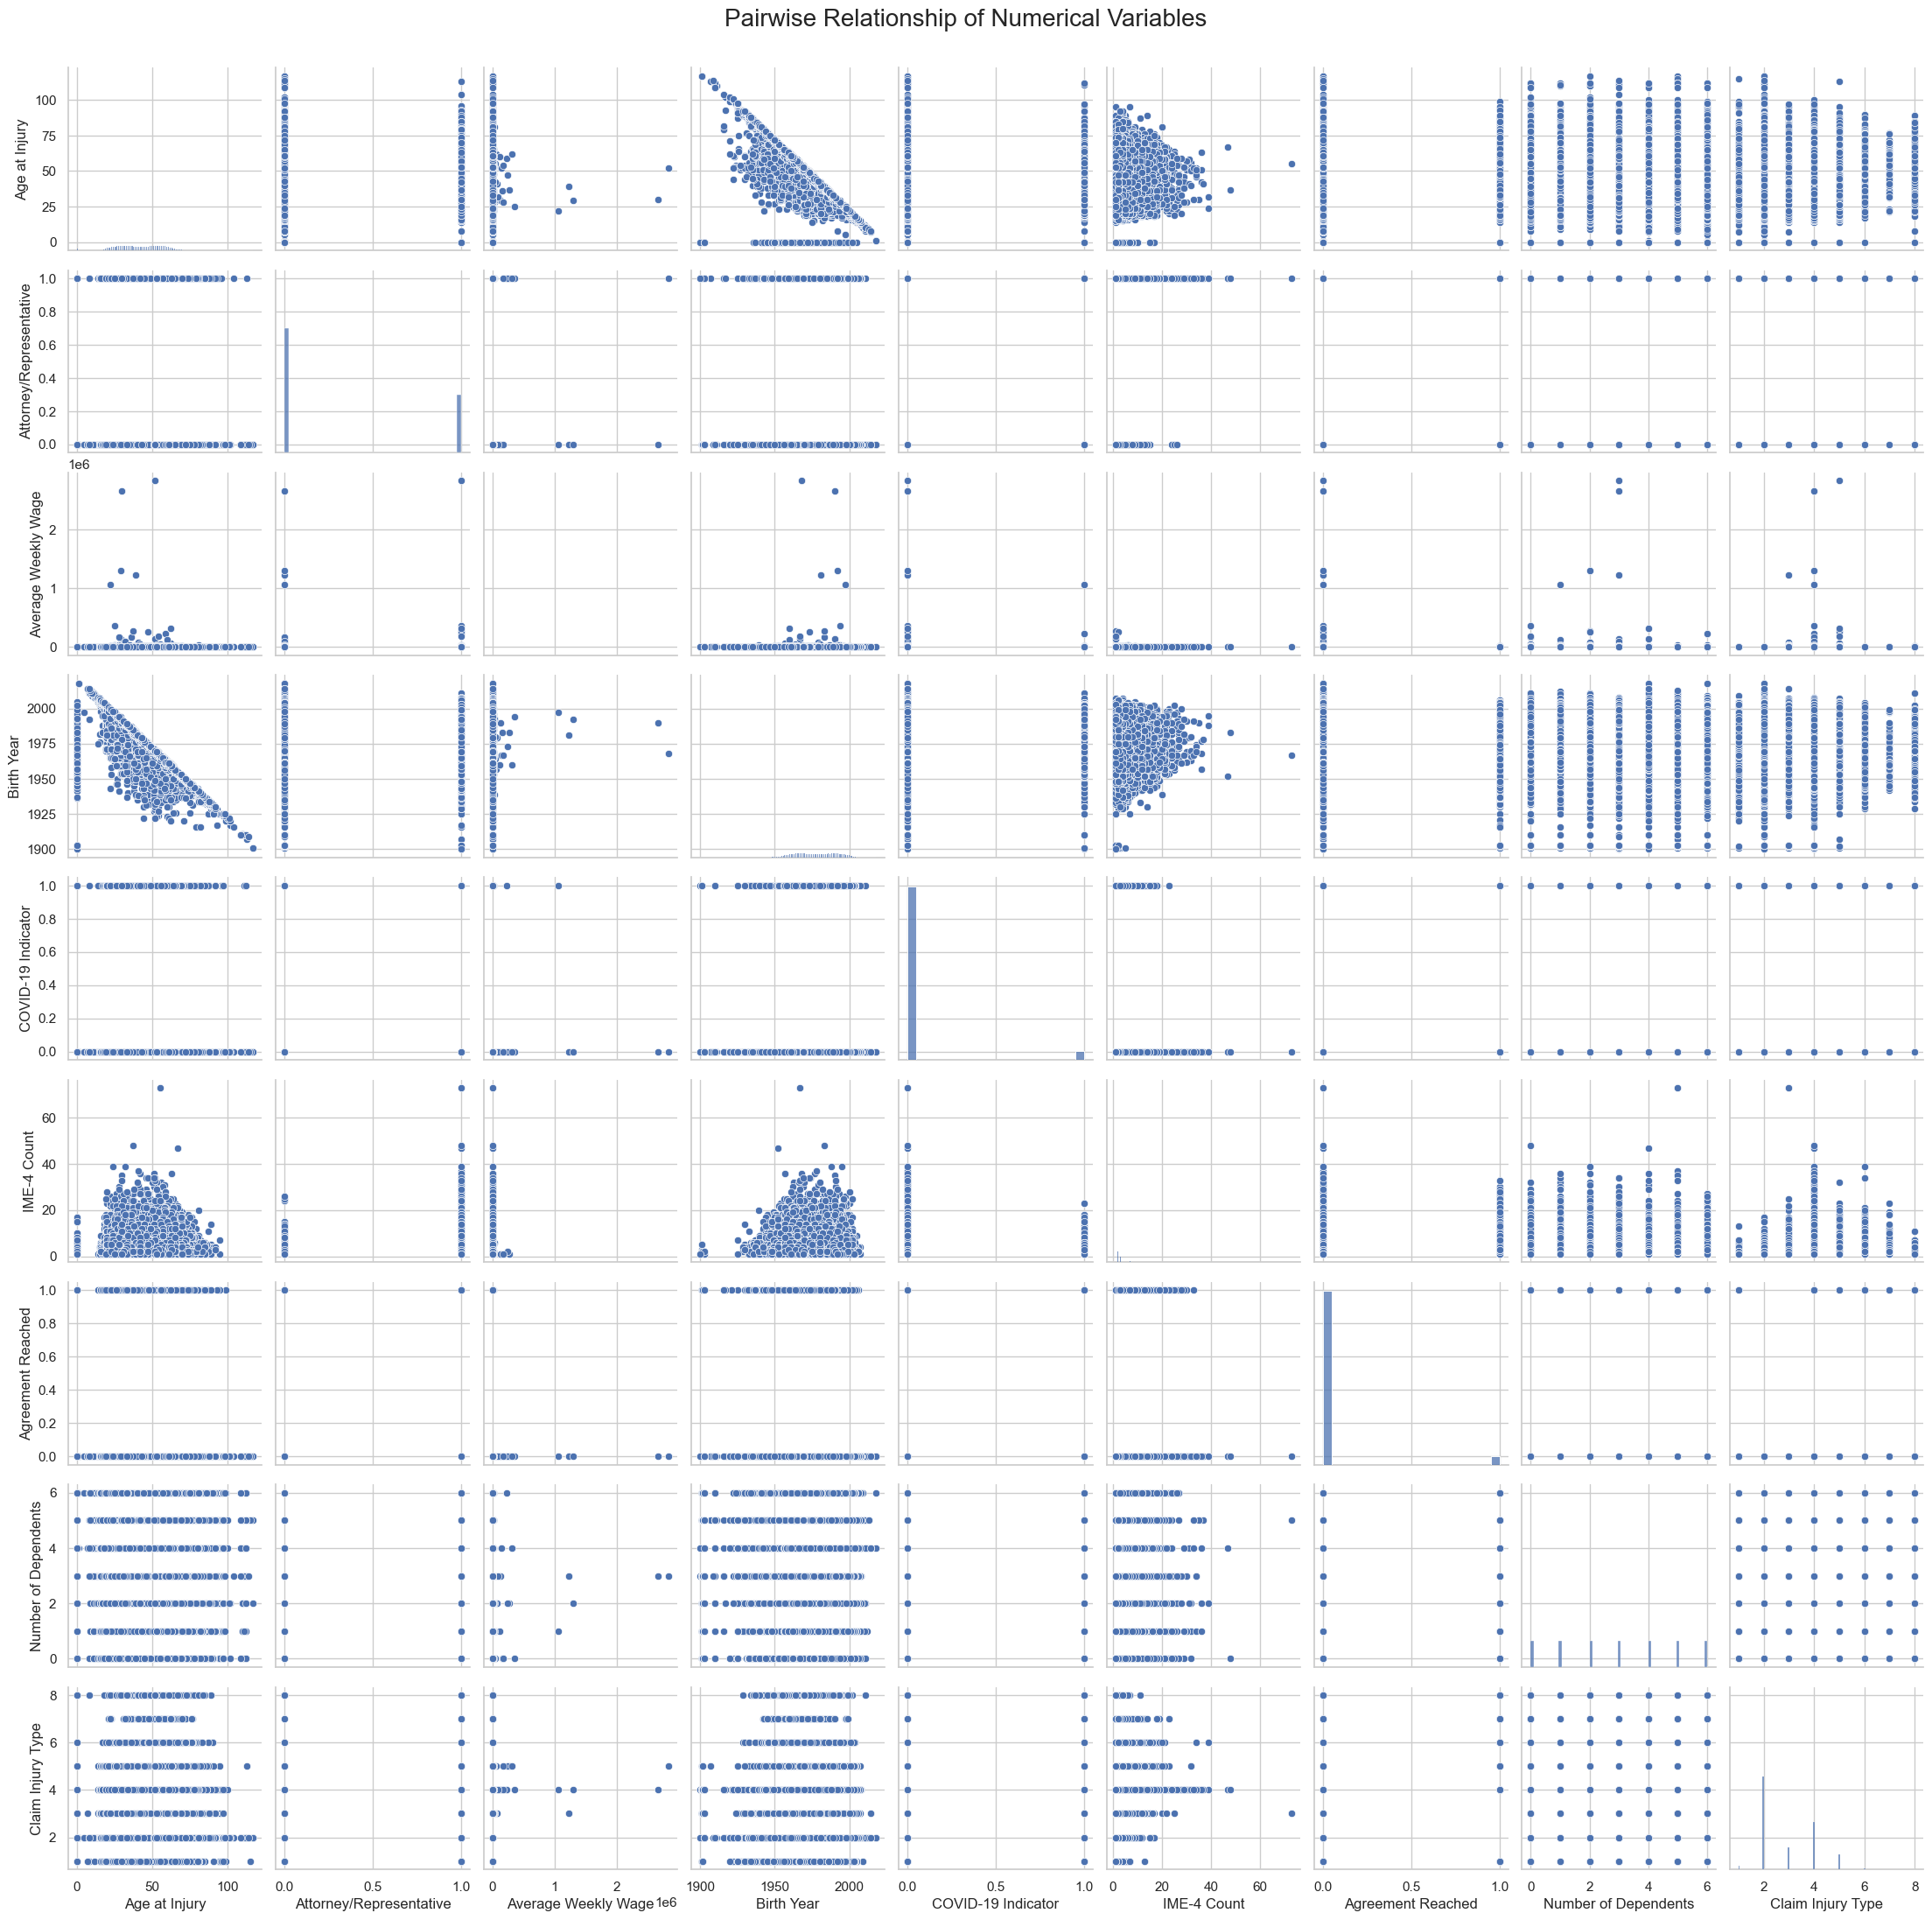

In [389]:
custom_palette = sns.color_palette("viridis", as_cmap=True)(np.linspace(0, 0.3, 100))

sns.set(style="whitegrid")
pairplot = sns.pairplot(numerical_feats, diag_kind="hist",
                        palette=custom_palette, plot_kws={'cmap': 'viridis'})
plt.subplots_adjust(top=0.95)
plt.suptitle("Pairwise Relationship of Numerical Variables", fontsize=20)

plt.show()

<hr>
<div class="alert alert-block alert-info" style="font-size:12px">
    
# Key Notes: Relationships between numerical features

* From the plots above, we can see that strong correlations exist between multiple paris of features:
    - Birth Year and Age at Injury
    - Assembly Date and C-2 Date
    - Assembly Date and C-3 Date
    - Assembly Date and First Hearing Date
    - C-2 Date and C-3 Date
* The correlations between the date features make sense, as the dates of each step in the claims process happen sequentially and thus will be related with one another, as discusssed in the section above.
* We see no high correlations between any particular feature and our target variable, Claim Injury Type.
* From the pairwise plots, we can identify a few groups of outliers that will need to be dealt with during preprocessing.
    - Birth Year and Age at Injury both appear to have a clump of extreme low outliers, with Birth Year around 1900 and Age at Injury around 0. These values don't make sense given the years that the data was collected, so we will assume these values to be erroneous and will deal with them during preprocessing. Because these features are both related to the age of the claimant, we can also assume that the outliers in Birth Year are the same data points as the outliers in Age at Injury.
* Most of the outliers that appear on the pairwise plot are not multivariate outliers but are univariate outliers - they appeared in our individual feature analysis and we are already aware of them.

</a>

<hr>
<div class="alert alert-block alert-info" style="font-size:14px" id="conclusion">
    
# 1.4 EDA Conclusion
    
</a>

<hr>
<div class="alert alert-block alert-info" style="font-size:12px">
    
# Main problems to address:
## Missing values
- There is a large segment of missing data in the training dataset. We will drop these empty rows in preprocessing.
- Many features will still have missing values after dropping these empty rows. We will impute as many values as we can through calculation using other features. Any that are left will be filled with the mean or median, depending on the distribution of the data.
- Categorical features with missing values may be filled with an 'unknown' category or imputed with the mode.
## Outliers
- Many of our numerical features have extreme outliers. Our likely approach will be to use winsorization to bring these values to a less extreme value, without losing the other valuable data in the other columns.
- Some categorical features have outlier categories with very few values. For some features, we will create broader categories that will cover these smaller categories.

## Strange Values
- Some features (namely date features) have values that don't make sense in context. We will examine these features again after preprocessing to see if the problems persist.
</a>